# MLLC
* FRAME THE PROBLEM
* DATA GATHERING
* DATA PREPROCESSING
* EDA
* FEATURE SELECTION
* MODEL SELECTION
* MODEL TRAINING

## FRAME THE PROBLEM
* PREDICT WHETHER THE CAR INSURANCE WILL CLAIM OR NOT.

# DATA GATHERING
* WE HAVE USE A CSV FILE. SO WE DONT NEED TO GATHER DATA.

In [1]:
# IMPORT LIBRIES
# DATA MANIPULATION
import pandas as pd 
import numpy as np
# IMPORT PLOTTING LIBRIES
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('car_insurance_claim.csv')
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [4]:
# shape of data
print(f"shape of data : {data.shape}")

shape of data : (10302, 27)


In [5]:
data.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS GENDER      EDUCATION     OCCUPATION  TRAVTIME  \
0        $0    z_No      M            PhD   Professional        14   
1  $257,252    z_No      M  z_High School  z_Blue Collar        22   
2        $0    z_No      M      Bachelors        Manager        26   
3  $124,191     Yes    z_F  z_High School       Clerical         5   
4  $306,251     Yes      M   <High School  z_Blue Collar        32   

      CAR_USE BLUEBOOK  TIF CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0     Private  $14,230   11  Minivan     yes   $4,461         2      No   
1  Commercial  $14,940    1  Minivan     yes       $0         0      No   
2     Private  $21,970    1      Van     yes       $0         0      No   
3     Private   $4,010    4    z_SUV      no  $38,690         2      No   
4     Private  $15,440    7  Minivan     yes       $0         0      No   

   MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG           URBANICITY  
0        3      $0     18.0           0  Highly Urban/ Urban  
1        0      $0      1.0           0  Highly Urban/ Urban  
2        2      $0     10.0           0  Highly Urban/ Urban  
3        3      $0     10.0           0  Highly Urban/ Urban  
4        0      $0      6.0           0  Highly Urban/ Urban

In [6]:
print(f"features in data : {data.columns}")

features in data : Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [8]:
# DROP ID AND BIRTH COLUMNS
data.drop(columns=['ID','BIRTH'],inplace=True)

# Data Cleaning

In [9]:
# MAKE A SECOND COPY OF DATA
data_copy = data.copy()

In [10]:
# CHECK FOR DUPLICATES
print(f"NUMBER OF DUPLICATED ROWS : {data_copy.duplicated().sum()}")
# DROP DUPLICATED ROWS
data_copy.drop_duplicates(inplace=True)

NUMBER OF DUPLICATED ROWS : 1


In [11]:
# CHECK NULL VALUES
data_copy.isnull().sum()

KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

* SOME COLUMNS CONTAIN CURRENCY SYMBOLS SO WE REMOVE CURRENCY SYMBOLS.

In [12]:
# CURRENCY COLUMNS
curr_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
# DEFINE FUNCTIONS
def currency_corr(col):
  return data_copy[col].str.replace("$","").str.replace(",","").astype('float')
# APPLY CHANGES
for col in curr_cols:
  data_copy[col] = currency_corr(col)

* SOME COLUMNS CONTAIN z_ PREFIX SO WE NEED TO REMOVE IT

In [13]:
# STR COLUMNS
str_cols = ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY']
# DEFINE FUNCTION
def Z_prefix_remover(col):
  return data_copy[col].str.replace("z_","")
# APPLY CHANGES
for col in str_cols:
  data_copy[col] = Z_prefix_remover(col)

In [14]:
# CATEGORIES IN EACH COLUMN.
for col in str_cols:
  print(f"{col} unique values : {data_copy[col].unique()}")

PARENT1 unique values : ['No' 'Yes']
MSTATUS unique values : ['No' 'Yes']
GENDER unique values : ['M' 'F']
EDUCATION unique values : ['PhD' 'High School' 'Bachelors' '<High School' 'Masters']
OCCUPATION unique values : ['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student']
CAR_USE unique values : ['Private' 'Commercial']
CAR_TYPE unique values : ['Minivan' 'Van' 'SUV' 'Sports Car' 'Panel Truck' 'Pickup']
RED_CAR unique values : ['yes' 'no']
REVOKED unique values : ['No' 'Yes']
URBANICITY unique values : ['Highly Urban/ Urban' 'Highly Rural/ Rural']


* EDUCATION HAVE TWO DIFFERENT CATEGORIES 'High School' and '<High School' WHICH REPRESENT A HIGH SCHOOL.SO WE NEED TO FIX IT.

In [15]:
# REMOVE < SYMBOL 
data_copy['EDUCATION'] = data_copy['EDUCATION'].str.replace("<","")

In [16]:
data_copy.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL MSTATUS GENDER  \
0         0  60.0         0  11.0  67349.0      No       0.0      No      M   
1         0  43.0         0  11.0  91449.0      No  257252.0      No      M   
2         0  48.0         0  11.0  52881.0      No       0.0      No      M   
3         0  35.0         1  10.0  16039.0      No  124191.0     Yes      F   
4         0  51.0         0  14.0      NaN      No  306251.0     Yes      M   

     EDUCATION    OCCUPATION  TRAVTIME     CAR_USE  BLUEBOOK  TIF CAR_TYPE  \
0          PhD  Professional        14     Private   14230.0   11  Minivan   
1  High School   Blue Collar        22  Commercial   14940.0    1  Minivan   
2    Bachelors       Manager        26     Private   21970.0    1      Van   
3  High School      Clerical         5     Private    4010.0    4      SUV   
4  High School   Blue Collar        32     Private   15440.0    7  Minivan   

  RED_CAR  OLDCLAIM  CLM_FREQ REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  \
0     yes    4461.0         2      No        3      0.0     18.0           0   
1     yes       0.0         0      No        0      0.0      1.0           0   
2     yes       0.0         0      No        2      0.0     10.0           0   
3      no   38690.0         2      No        3      0.0     10.0           0   
4     yes       0.0         0      No        0      0.0      6.0           0   

            URBANICITY  
0  Highly Urban/ Urban  
1  Highly Urban/ Urban  
2  Highly Urban/ Urban  
3  Highly Urban/ Urban  
4  Highly Urban/ Urban

# EDA
* FOR A DETAIL EDA WE USE DIFFERENT NOTEBOOK.
* HERE WE JUST SHOW THE DISTIBUTION OF DATA.

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


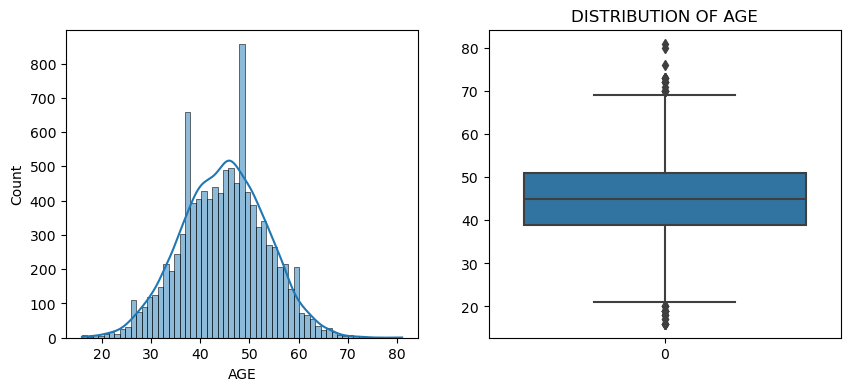

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


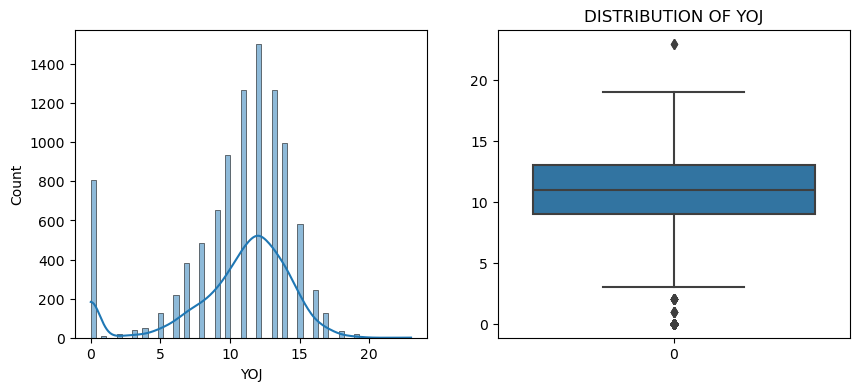

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


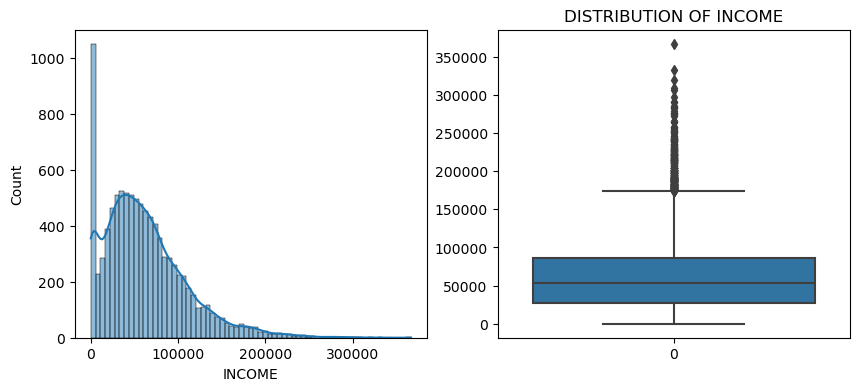

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


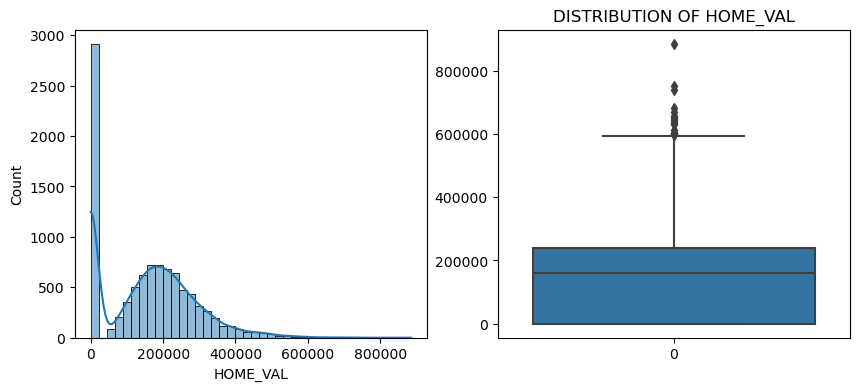

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


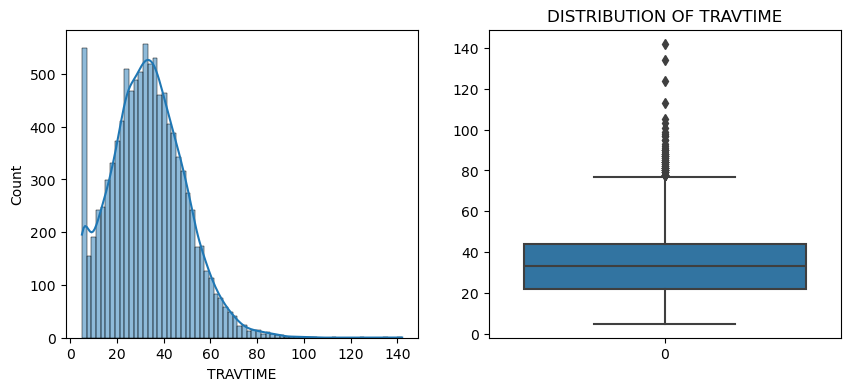

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


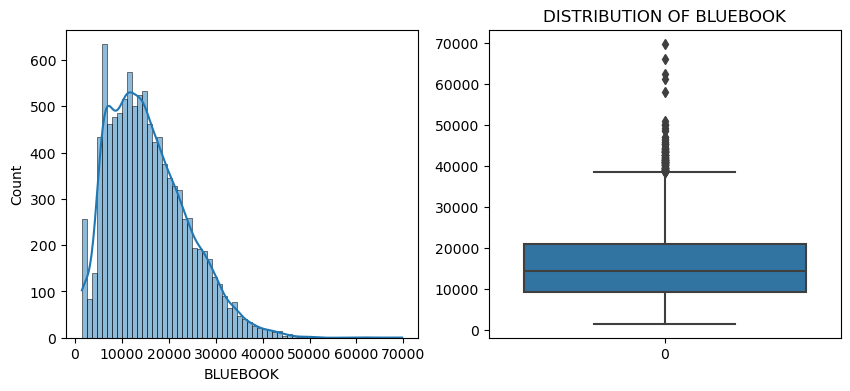

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


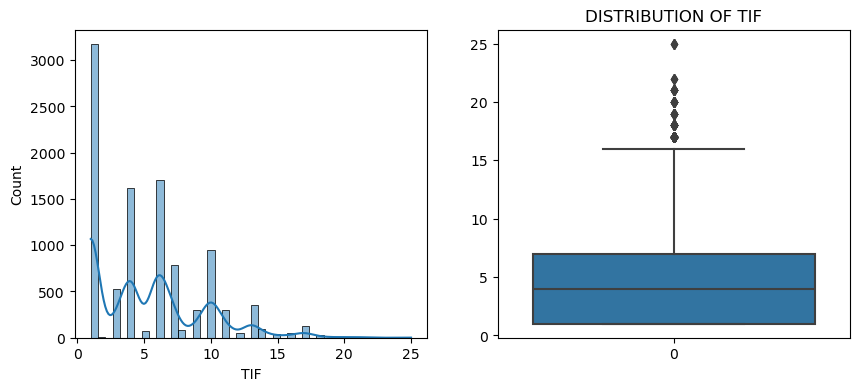

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


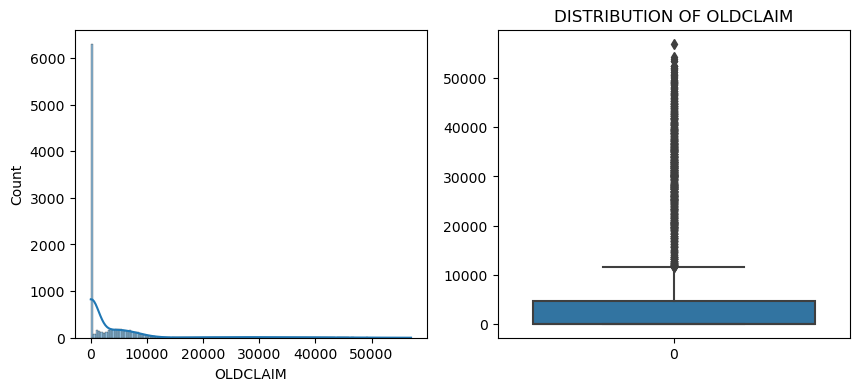

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


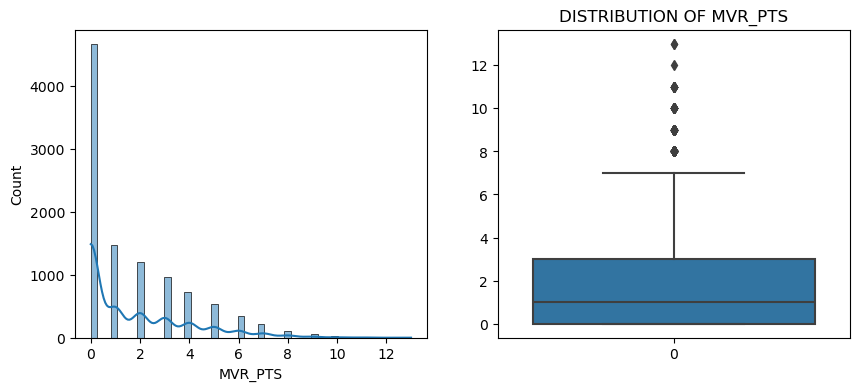

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


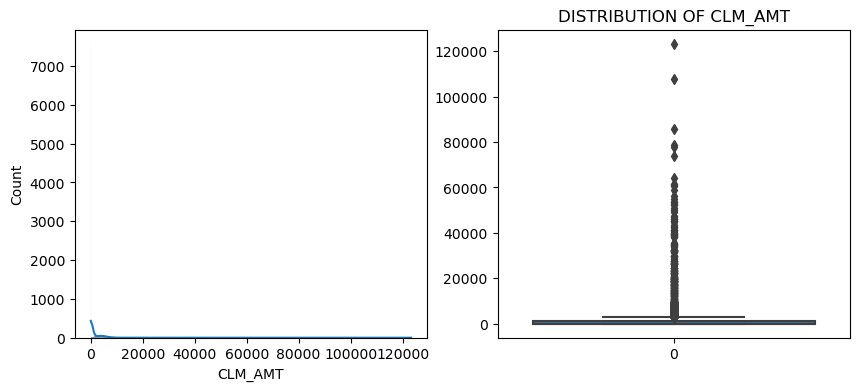

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


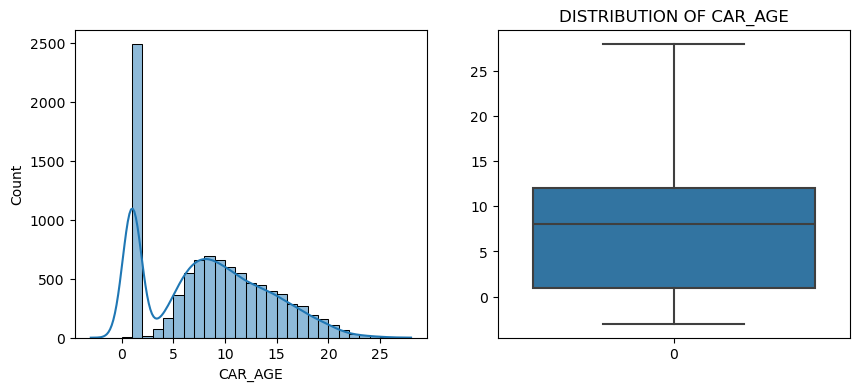

In [17]:
# DISTRIBUTION OF NUMERICAL COLS
cat = data_copy.nunique()
num_cols = data_copy.nunique()[cat>10].index

for cols in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plt.title(f"DISTRIBUTION OF {cols}")
    sns.histplot(data_copy[cols],ax=axes[0],kde=True)
    sns.boxplot(data_copy[cols].values,ax=axes[1])
    
    plt.show()

In [18]:
# DESCRIPTIVE STATISTICS OF NUMERICAL COLS
data_copy[num_cols].describe()

AGE          YOJ         INCOME       HOME_VAL      TRAVTIME  \
count  10294.000000  9753.000000    9731.000000    9726.000000  10301.000000   
mean      44.837964    10.473700   61568.835680  154513.740284     33.416853   
std        8.606671     4.108999   47458.566563  129191.840215     15.870398   
min       16.000000     0.000000       0.000000       0.000000      5.000000   
25%       39.000000     9.000000   27583.000000       0.000000     22.000000   
50%       45.000000    11.000000   53526.000000  160629.000000     33.000000   
75%       51.000000    13.000000   86139.500000  238251.250000     44.000000   
max       81.000000    23.000000  367030.000000  885282.000000    142.000000   

           BLUEBOOK           TIF      OLDCLAIM       MVR_PTS        CLM_AMT  \
count  10301.000000  10301.000000  10301.000000  10301.000000   10301.000000   
mean   15660.015532      5.329580   4034.369479      1.710319    1511.413164   
std     8429.169220      4.110773   8733.476588      2.159054    4725.455807   
min     1500.000000      1.000000      0.000000      0.000000       0.000000   
25%     9200.000000      1.000000      0.000000      0.000000       0.000000   
50%    14400.000000      4.000000      0.000000      1.000000       0.000000   
75%    20890.000000      7.000000   4648.000000      3.000000    1145.000000   
max    69740.000000     25.000000  57037.000000     13.000000  123247.000000   

           CAR_AGE  
count  9662.000000  
mean      8.298903  
std       5.714263  
min      -3.000000  
25%       1.000000  
50%       8.000000  
75%      12.000000  
max      28.000000

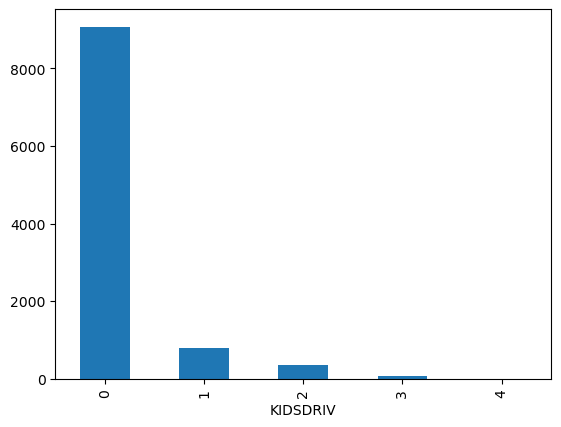

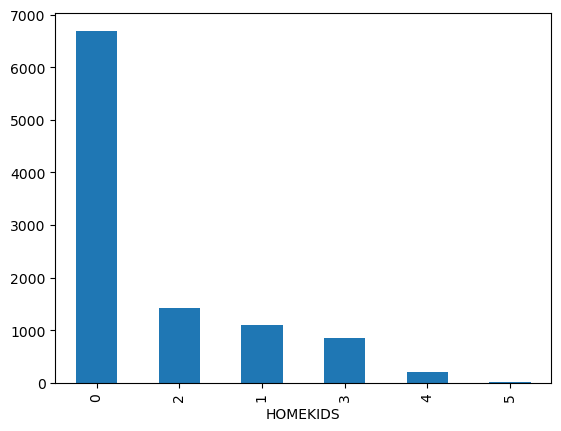

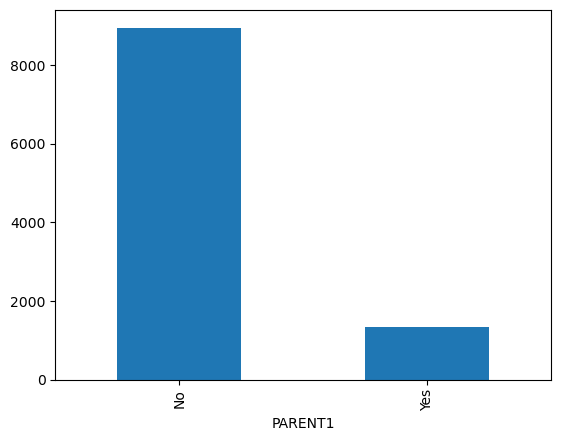

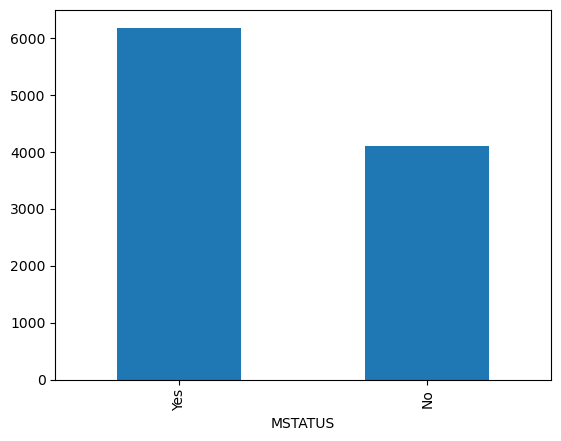

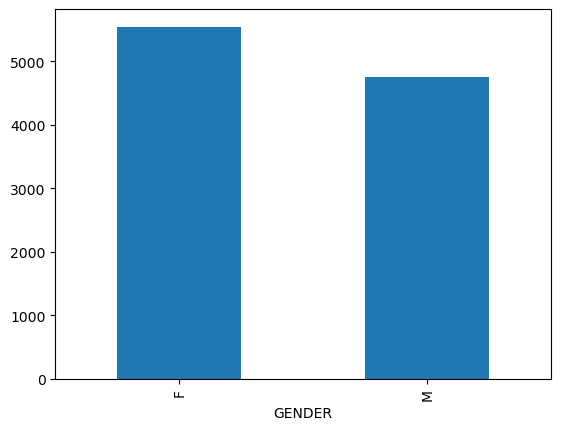

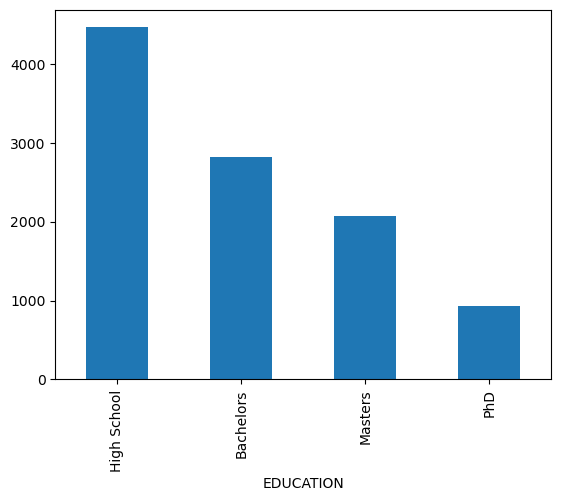

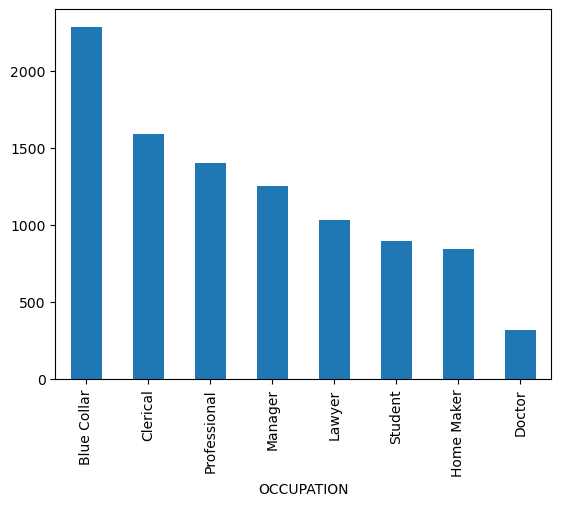

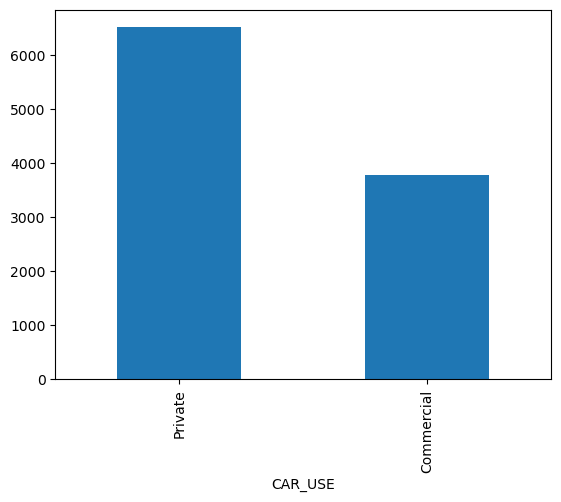

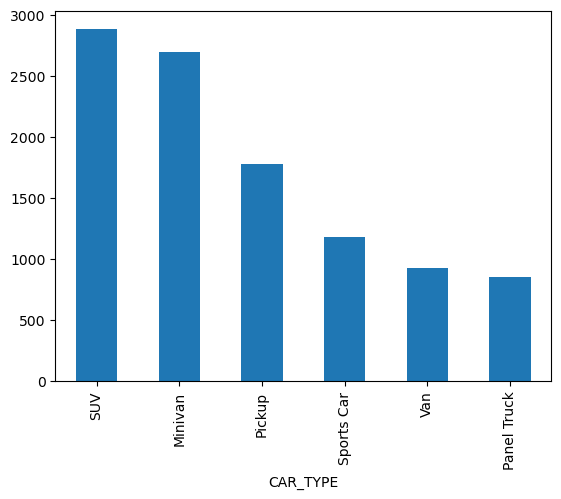

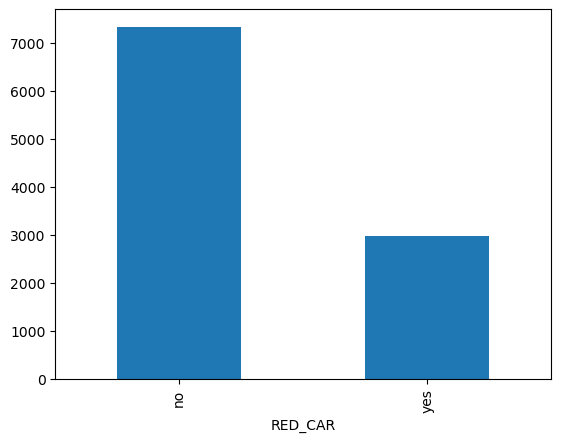

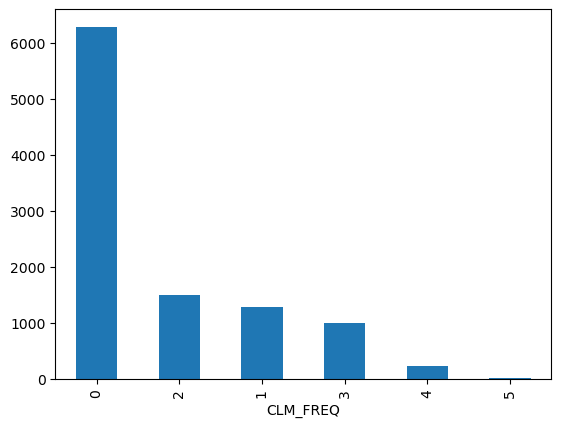

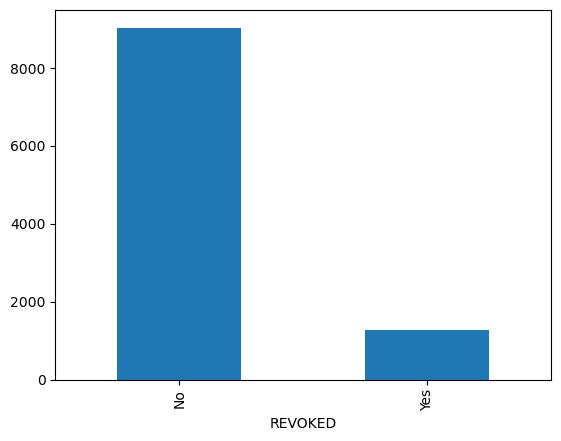

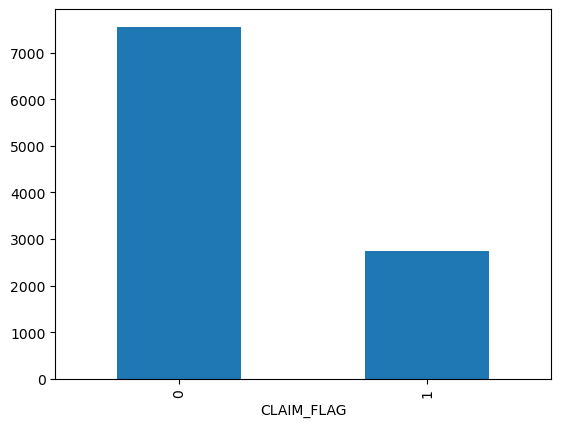

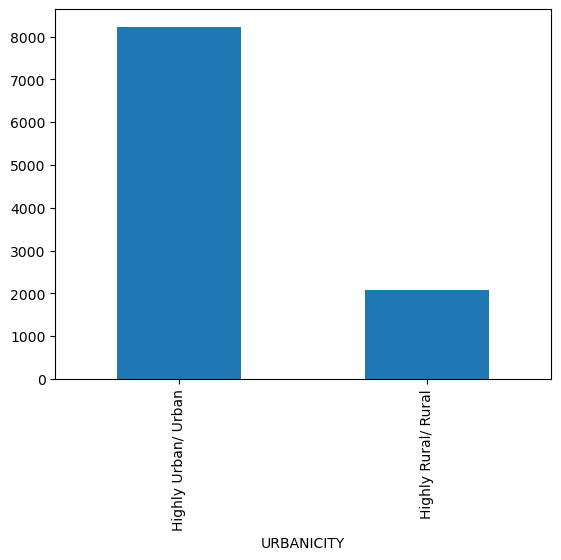

In [19]:
# DISTIBUTION OF CATEGORICAL COLS
cat = data_copy.nunique()
cat_cols = data_copy.nunique()[cat<10].index
for i in cat_cols:
    data_copy[i].value_counts().plot(kind='bar')
    plt.show()

# MISSING VALUE IMPUTATIONS

In [20]:
# NULL VALUES IN EACH COLUMNS
data_copy.isnull().sum()

KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

## HANDLE NULL VALUES OF YOJ COLUMNS

In [21]:
# total null values
data_copy['YOJ'].isnull().sum()

548

In [22]:
data_copy[data_copy['YOJ'].isnull()]

KIDSDRIV   AGE  HOMEKIDS  YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
5             0  50.0         0  NaN  114986.0      No  243925.0     Yes   
7             0  54.0         0  NaN   18755.0      No       NaN     Yes   
10            1  37.0         2  NaN  107961.0      No  333680.0     Yes   
17            0  35.0         2  NaN   21204.0     Yes       0.0      No   
55            0  53.0         0  NaN  107259.0      No  343700.0     Yes   
59            0  42.0         0  NaN   52988.0      No  176275.0     Yes   
68            0  48.0         0  NaN       NaN      No  252896.0     Yes   
69            1  44.0         2  NaN   24060.0     Yes       0.0      No   
89            0  35.0         0  NaN   29371.0      No       0.0      No   
96            0  54.0         0  NaN   71007.0      No  240833.0     Yes   
103           0  55.0         0  NaN   84964.0      No  227091.0     Yes   
150           0  30.0         2  NaN   26226.0      No  165178.0     Yes   
151           0  44.0         1  NaN   67278.0      No  220556.0     Yes   
173           0  49.0         0  NaN   38326.0      No  133010.0     Yes   
230           0  45.0         3  NaN    1158.0      No       0.0     Yes   
252           0  45.0         0  NaN   19909.0      No  130331.0     Yes   
253           0  36.0         0  NaN    4885.0      No   99107.0     Yes   
265           0  45.0         2  NaN   89479.0      No  239934.0     Yes   
288           0  47.0         0  NaN   21282.0      No       0.0     Yes   
336           0  54.0         0  NaN   30388.0      No       0.0      No   
346           0  44.0         1  NaN       0.0      No   70461.0     Yes   
398           0  46.0         0  NaN   31177.0      No  150102.0      No   
432           0  58.0         0  NaN   37528.0      No  185996.0     Yes   
434           0  54.0         0  NaN   62215.0      No  244460.0     Yes   
437           0  48.0         0  NaN       0.0      No       0.0     Yes   
444           1  38.0         1  NaN  122492.0     Yes       NaN      No   
471           0  34.0         3  NaN   88760.0     Yes       0.0      No   
479           0  57.0         0  NaN  159517.0      No  456583.0      No   
539           0  40.0         1  NaN   63400.0      No  242530.0     Yes   
554           0  47.0         0  NaN   44963.0      No  160317.0     Yes   
575           0  47.0         0  NaN   92543.0      No  236446.0     Yes   
656           0  22.0         0  NaN   36821.0      No  193948.0      No   
664           0  51.0         0  NaN   40862.0      No       0.0      No   
722           0  57.0         0  NaN  104257.0      No       NaN     Yes   
755           0  56.0         0  NaN   84186.0      No  266968.0     Yes   
776           0  42.0         3  NaN   43444.0     Yes  190220.0      No   
799           1  42.0         2  NaN   35101.0      No  150376.0     Yes   
835           0  58.0         0  NaN    7452.0      No       0.0      No   
849           0  49.0         0  NaN   39934.0      No  178681.0     Yes   
899           0  55.0         0  NaN   34466.0      No  152288.0      No   
913           0  46.0         0  NaN       0.0      No   99200.0     Yes   
925           0  33.0         1  NaN  112943.0      No  307155.0     Yes   
969           0  44.0         1  NaN   48088.0      No  131782.0     Yes   
1011          0  24.0         4  NaN       0.0     Yes       0.0      No   
1013          0  45.0         0  NaN   78796.0      No  236707.0     Yes   
1070          0  54.0         0  NaN   70008.0      No       0.0      No   
1079          0  46.0         1  NaN   69350.0      No  254858.0     Yes   
1098          0  45.0         0  NaN       0.0      No       0.0      No   
1103          0  42.0         0  NaN       NaN      No  286147.0     Yes   
1159          0  55.0         0  NaN   83090.0      No  202465.0     Yes   
1161          1  42.0         1  NaN   49120.0     Yes  197752.0      No   
1165          0  47.0         0  NaN   64183.0      No 

In [23]:
# FILL VALUES WHERE INCOME IS 0 AS 0
ind = data_copy[(data_copy['YOJ'].isnull() )& (data_copy['INCOME']==0)].index
data_copy.loc[ind,'YOJ'] = 0 

In [24]:
# REMOVE ROWS WHERE INCOME IS ALSO NULL
ind =  data_copy[( data_copy['YOJ'].isnull() )& ( data_copy['INCOME'].isnull())].index
data_copy.drop(index=ind,inplace=True)

In [25]:
# NOW NULL VALUES IN YOJ
data_copy['YOJ'].isnull().sum()

468

In [26]:
data_copy.groupby('OCCUPATION')['YOJ'].mean()

OCCUPATION
Blue Collar     11.404402
Clerical        11.446053
Doctor          11.295455
Home Maker       5.706601
Lawyer          11.467975
Manager         11.307047
Professional    11.346271
Student          5.891705
Name: YOJ, dtype: float64

In [27]:
# fill null values as 5 where occupation is student and home maker
ind = data_copy[(data_copy['YOJ'].isnull() )& ((data_copy['OCCUPATION']=='Student')| (data_copy['OCCUPATION']=='Home Maker'))].index
data_copy.loc[ind,'YOJ'] =  5

In [28]:
# and fill other null values as 11
data_copy['YOJ'].fillna(11,inplace=True)

In [29]:
# NOW NULL VALUES IN YOJ
data_copy['YOJ'].isnull().sum()

0

# HANDLE NULL VALUES OF INCOME COLUMNS

In [30]:
# TOTAL NULL VALUES IN INCOME
data_copy['INCOME'].isnull().sum()

535

In [31]:
# fill null value where yoj is 0 
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['YOJ'] == 0)].index
data_copy.loc[ind,'INCOME'] = 0

In [32]:
data_copy[data_copy['INCOME'].isnull()]

KIDSDRIV   AGE  HOMEKIDS   YOJ  INCOME PARENT1  HOME_VAL MSTATUS  \
4             0  51.0         0  14.0     NaN      No  306251.0     Yes   
29            0  46.0         0  14.0     NaN      No  207519.0     Yes   
62            1  37.0         2  13.0     NaN     Yes       0.0      No   
74            0  35.0         2  12.0     NaN     Yes       0.0      No   
77            0  49.0         0   9.0     NaN      No       0.0      No   
80            0  46.0         0  14.0     NaN      No  397661.0      No   
88            1  37.0         2  12.0     NaN      No  205211.0     Yes   
111           0  46.0         0   7.0     NaN      No       NaN      No   
129           1  38.0         1   7.0     NaN      No       0.0     Yes   
131           0  47.0         0  14.0     NaN      No  276241.0     Yes   
162           0  50.0         0  14.0     NaN      No  147191.0     Yes   
183           0  53.0         0  12.0     NaN      No       0.0      No   
190           0  37.0         0  11.0     NaN      No       NaN      No   
235           0  43.0         0  12.0     NaN      No  179229.0      No   
236           0  43.0         0  11.0     NaN      No  209570.0     Yes   
263           0  57.0         0   8.0     NaN      No  261901.0     Yes   
293           2  41.0         2   8.0     NaN      No       0.0     Yes   
308           0  57.0         0  12.0     NaN      No       0.0      No   
327           0  37.0         0  14.0     NaN      No  141069.0      No   
331           0  48.0         0  10.0     NaN      No       0.0      No   
362           2  39.0         2  11.0     NaN     Yes       0.0      No   
381           0  60.0         0  15.0     NaN      No  330229.0     Yes   
517           0  59.0         0  14.0     NaN      No  268617.0     Yes   
538           0  41.0         3  11.0     NaN      No  159061.0     Yes   
544           1  56.0         2  17.0     NaN      No  315504.0     Yes   
571           0  39.0         0   6.0     NaN      No       0.0      No   
577           0  44.0         0  12.0     NaN      No       0.0      No   
584           0  38.0         2  14.0     NaN      No  152554.0     Yes   
586           0  46.0         0   8.0     NaN      No  162243.0     Yes   
599           0  45.0         0  11.0     NaN      No  276390.0     Yes   
639           0  46.0         0  13.0     NaN      No  140734.0     Yes   
651           0  32.0         3   8.0     NaN     Yes  193566.0      No   
661           0  50.0         0  11.0     NaN      No  481028.0      No   
663           0  42.0         0  10.0     NaN      No   51401.0     Yes   
670           0  27.0         0   8.0     NaN      No       0.0      No   
692           0  33.0         3   7.0     NaN      No  147326.0     Yes   
696           0  55.0         0  13.0     NaN      No  315515.0      No   
705           0  60.0         0  11.0     NaN      No  290875.0      No   
721           0  49.0         0   8.0     NaN      No       0.0      No   
730           0  53.0         0  13.0     NaN      No  499433.0     Yes   
733           0  43.0         0  10.0     NaN      No       0.0      No   
745           2  37.0         2   5.0     NaN      No  235987.0     Yes   
751           0  56.0         0   6.0     NaN      No  242441.0     Yes   
762           0  33.0         0  11.0     NaN      No  122916.0      No   
788           0  55.0         0  15.0     NaN      No  147545.0     Yes   
819           0  47.0         0  10.0     NaN      No       0.0      No   
822           0  55.0         0  12.0     NaN      No  118928.0     Yes   
827           0  44.0         0  12.0     NaN      No  228990.0      No   
831           0  53.0         0  13.0     NaN      No  185521.0     Yes   
856           0  53.0         0  17.0     NaN      No  344629.0     Yes   
860           0  38.0         0  12.0     NaN      No  122423.0     Yes   
911           0  32.0         2   7.0     NaN     Yes  466804.0      No   
963           0  43.0         4 

In [33]:
temp = data_copy.groupby('OCCUPATION')['INCOME'].mean()
temp

OCCUPATION
Blue Collar      58892.847575
Clerical         33667.893475
Doctor          127149.829032
Home Maker       11995.848335
Lawyer           88336.594512
Manager          88067.341157
Professional     75959.006782
Student           6080.465116
Name: INCOME, dtype: float64

In [34]:
# fill null values with median value of home maker
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Home Maker')].index
data_copy.loc[ind,'INCOME'] = temp['Home Maker']

In [35]:
# fill null values with median value of student
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Student')].index
data_copy.loc[ind,'INCOME'] = temp['Student']

In [36]:
# blue collar
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Blue Collar')].index
data_copy.loc[ind,'INCOME'] = temp['Blue Collar']
# clerical
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Clerical')].index
data_copy.loc[ind,'INCOME'] = temp['Clerical']
# Doctor
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Doctor')].index
data_copy.loc[ind,'INCOME'] = temp['Doctor']
# Lawyer
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Lawyer')].index
data_copy.loc[ind,'INCOME'] = temp['Lawyer']
# manager
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Manager')].index
data_copy.loc[ind,'INCOME'] = temp['Manager']
# professional
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'] == 'Professional')].index
data_copy.loc[ind,'INCOME'] = temp['Professional']

In [37]:
# drop rows where occupation and income is null
ind = data_copy[(data_copy['INCOME'].isnull()) & (data_copy['OCCUPATION'].isnull())].index
data_copy.drop(index=ind,inplace=True)

In [38]:
temp = data_copy.dropna()

# HANDLING OCCUPATION NULL VALUES 

In [39]:
data_copy[data_copy['OCCUPATION'].isnull()]

KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
16            0  53.0         0  11.0  130795.0      No       0.0      No   
40            0  41.0         0   7.0   92842.0      No  286113.0      No   
45            0  43.0         2  17.0  145353.0      No  418785.0     Yes   
81            0  45.0         0  11.0   61931.0      No  213530.0     Yes   
82            0  48.0         0   9.0   61509.0      No  195438.0     Yes   
124           0  60.0         0   9.0  125893.0      No       0.0      No   
128           0  56.0         2  14.0  192089.0      No  471701.0     Yes   
146           0  41.0         0  12.0  110386.0      No  335488.0     Yes   
149           0  47.0         0  12.0  104271.0      No  265153.0     Yes   
154           0  33.0         1  12.0  111427.0      No  321483.0     Yes   
156           0  44.0         0  14.0   44790.0      No  205463.0     Yes   
209           0  55.0         0  16.0  163158.0      No  431809.0     Yes   
222           0  44.0         0   4.0  146267.0      No  357184.0     Yes   
234           0  36.0         3  11.0   49703.0     Yes  253132.0      No   
238           0  40.0         0   7.0   95405.0      No       0.0      No   
249           0  48.0         0  11.0  140112.0      No  336063.0      No   
255           0  60.0         0  13.0   89511.0      No  224350.0     Yes   
292           1  42.0         1   3.0   69290.0     Yes       0.0      No   
299           0  50.0         0  10.0  219024.0      No       0.0      No   
317           0  54.0         0  12.0   52078.0      No  194227.0     Yes   
323           0  55.0         0  15.0   75249.0      No       0.0      No   
328           0  56.0         0  16.0  109521.0      No  321674.0     Yes   
337           0  42.0         0  12.0   85752.0      No  285727.0     Yes   
345           0  42.0         0   9.0   64705.0      No       0.0      No   
372           0  46.0         0  13.0  266027.0      No       0.0      No   
390           0  46.0         0   8.0  140766.0      No  375813.0      No   
410           0  31.0         1  11.0  110404.0      No  278647.0     Yes   
429           0  32.0         1  12.0   76985.0     Yes       0.0      No   
432           0  58.0         0  11.0   37528.0      No  185996.0     Yes   
457           0  43.0         1  11.0  176021.0      No  446011.0     Yes   
463           0  46.0         0   7.0  106409.0      No       0.0      No   
473           0  45.0         1   8.0   45105.0      No  181896.0     Yes   
477           0  43.0         0  13.0  238856.0      No       NaN     Yes   
504           0  41.0         0   6.0   86227.0      No  237057.0      No   
510           2  39.0         3  17.0  173533.0      No  445428.0     Yes   
575           0  47.0         0  11.0   92543.0      No  236446.0     Yes   
589           0  31.0         0   3.0   57017.0      No  202880.0      No   
607           0  44.0         0  10.0  146338.0      No       0.0      No   
609           0  55.0         0   8.0  245498.0      No       0.0      No   
628           0  44.0         0  12.0   92673.0      No  294311.0     Yes   
636           1  42.0         3  13.0   58797.0     Yes       0.0      No   
645           0  52.0         0  14.0  207687.0      No  510742.0     Yes   
656           0  22.0         0  11.0   36821.0      No  193948.0      No   
657           0  53.0         0  13.0  108744.0      No  333039.0     Yes   
685           0  36.0         0  12.0  204373.0      No       NaN     Yes   
689           0  55.0         0  10.0   39405.0      No  161357.0     Yes   
695           0  24.0         1  12.0   94566.0     Yes  239142.0      No   
719           0  30.0         3  11.0   75891.0      No  222952.0     Yes   
771           0  53.0         0  11.0   97706.0      No       0.0      No   
807           0  28.0         1  11.0   70029.0      No  227430.0     Yes   
828           0  53.0         0  12.0  167661.0      No  433494.0      No   
833

In [40]:
data_copy.groupby(['OCCUPATION','EDUCATION'])['BLUEBOOK'].count().reset_index()

OCCUPATION    EDUCATION  BLUEBOOK
0    Blue Collar    Bachelors       714
1    Blue Collar  High School      1562
2    Blue Collar      Masters         3
3       Clerical    Bachelors       259
4       Clerical  High School      1327
5       Clerical          PhD         1
6         Doctor          PhD       321
7     Home Maker    Bachelors       242
8     Home Maker  High School       419
9     Home Maker      Masters       105
10    Home Maker          PhD        75
11        Lawyer      Masters       937
12        Lawyer          PhD        89
13       Manager    Bachelors       527
14       Manager  High School       167
15       Manager      Masters       377
16       Manager          PhD       185
17  Professional    Bachelors       894
18  Professional  High School       256
19  Professional      Masters       228
20  Professional          PhD        19
21       Student    Bachelors       174
22       Student  High School       721

In [41]:
crosstab_df  = pd.crosstab(data_copy['OCCUPATION'],data_copy['EDUCATION'])
crosstab_df

EDUCATION     Bachelors  High School  Masters  PhD
OCCUPATION                                        
Blue Collar         714         1562        3    0
Clerical            259         1327        0    1
Doctor                0            0        0  321
Home Maker          242          419      105   75
Lawyer                0            0      937   89
Manager             527          167      377  185
Professional        894          256      228   19
Student             174          721        0    0

In [42]:
crosstab_df.idxmax()

EDUCATION
Bachelors      Professional
High School     Blue Collar
Masters              Lawyer
PhD                  Doctor
dtype: object

In [43]:
# fill null values
ind = data_copy[(data_copy['OCCUPATION'].isnull()) & (data_copy['EDUCATION']=='Masters')].index
data_copy.loc[ind,'OCCUPATION'] = 'Lawyer'

In [44]:
ind = data_copy[(data_copy['OCCUPATION'].isnull()) & (data_copy['EDUCATION']=='PhD')].index
data_copy.loc[ind,'OCCUPATION'] = 'Lawyer'

In [45]:
data_copy.isnull().sum()

KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ             0
INCOME          0
PARENT1         0
HOME_VAL      567
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION      0
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       635
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [46]:
# NOW THE SHAPE OF DATA
data_copy.shape

(10234, 25)

In [47]:
# DROP ALL REMAINING VALUES
data_copy.dropna(inplace=True)

In [48]:
# NOW THE SHAPE OF DATA
data_copy.shape

(9067, 25)

In [49]:
data_copy.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

# OUTLIERS TREATMENT

# outlier based on claim amount

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLM_AMT', ylabel='Count'>

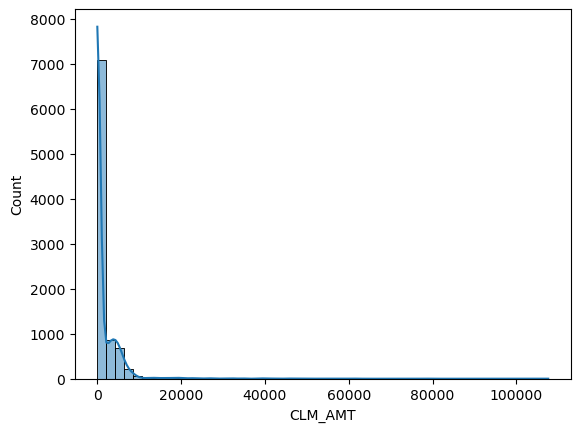

In [50]:
sns.histplot(data_copy['CLM_AMT'],bins=50,kde=True)

<Axes: >

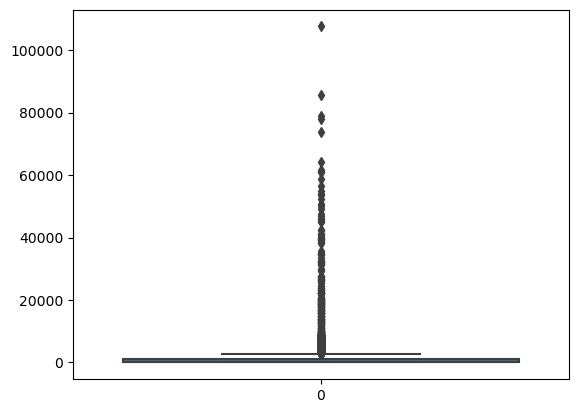

In [51]:
sns.boxplot(data_copy['CLM_AMT'])

* when clm_amt is not 0

In [52]:
non_zero_df =  data_copy[data_copy['CLM_AMT']!=0]

In [53]:
non_zero_df.shape

(2414, 25)

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLM_AMT', ylabel='Count'>

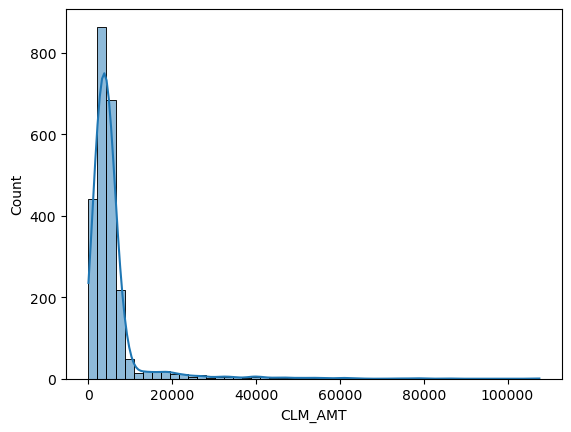

In [54]:
sns.histplot(non_zero_df['CLM_AMT'],bins=50,kde=True)

<Axes: >

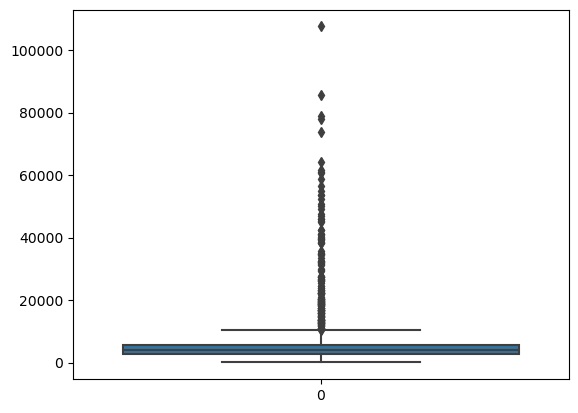

In [55]:
sns.boxplot(non_zero_df['CLM_AMT'].values)

In [56]:
non_zero_df['CLM_AMT'].describe()

count      2414.000000
mean       5589.795360
std        7504.714994
min          30.000000
25%        2635.000000
50%        4107.500000
75%        5691.250000
max      107586.000000
Name: CLM_AMT, dtype: float64

In [57]:
# IDENTIFY OUTLIERS
q1 = non_zero_df['CLM_AMT'].quantile(0.25)
q3 = non_zero_df['CLM_AMT'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5

outliers = non_zero_df[(non_zero_df['CLM_AMT']<lower_bound) | (non_zero_df['CLM_AMT']>upper_bound)]
num_outliers  = outliers.shape[0]
stats = outliers['CLM_AMT'].describe()

num_outliers,stats

(162,
 count       162.000000
 mean      27333.234568
 std       16690.787965
 min       10453.000000
 25%       15852.250000
 50%       20711.500000
 75%       34555.500000
 max      107586.000000
 Name: CLM_AMT, dtype: float64)

In [58]:
outliers['CLM_AMT'].quantile(0.9)

49947.700000000004

C:\Users\Yogesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLM_AMT', ylabel='Count'>

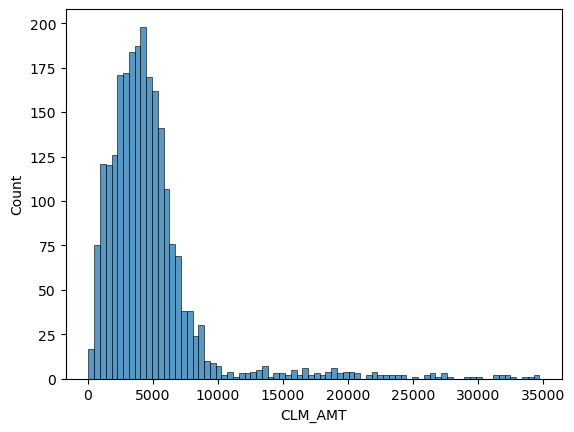

In [59]:
sns.histplot(data_copy[(data_copy['CLM_AMT']<35000) & (data_copy['CLM_AMT']>0)]['CLM_AMT'])

* we keep upper range as 35000 and lower range as 500

In [60]:
ind = data_copy[(data_copy['CLM_AMT']>0) & (data_copy['CLM_AMT']<500)].index
ind

Index([  388,   605,  1211,  1702,  1842,  2005,  2040,  2146,  2404,  2605,
        4506,  4528,  4929,  6562,  8353,  9335, 10164, 10264],
      dtype='int64')

In [61]:
data_copy.drop(index=ind,inplace=True) 

In [62]:
data_copy = data_copy[data_copy['CLM_AMT']<35000]

In [63]:
data_copy.shape

(9010, 25)

In [64]:
data_copy.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ        INCOME PARENT1  HOME_VAL MSTATUS  \
0         0  60.0         0  11.0  67349.000000      No       0.0      No   
1         0  43.0         0  11.0  91449.000000      No  257252.0      No   
2         0  48.0         0  11.0  52881.000000      No       0.0      No   
3         0  35.0         1  10.0  16039.000000      No  124191.0     Yes   
4         0  51.0         0  14.0  58892.847575      No  306251.0     Yes   

  GENDER    EDUCATION    OCCUPATION  TRAVTIME     CAR_USE  BLUEBOOK  TIF  \
0      M          PhD  Professional        14     Private   14230.0   11   
1      M  High School   Blue Collar        22  Commercial   14940.0    1   
2      M    Bachelors       Manager        26     Private   21970.0    1   
3      F  High School      Clerical         5     Private    4010.0    4   
4      M  High School   Blue Collar        32     Private   15440.0    7   

  CAR_TYPE RED_CAR  OLDCLAIM  CLM_FREQ REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  \
0  Minivan     yes    4461.0         2      No        3      0.0     18.0   
1  Minivan     yes       0.0         0      No        0      0.0      1.0   
2      Van     yes       0.0         0      No        2      0.0     10.0   
3      SUV      no   38690.0         2      No        3      0.0     10.0   
4  Minivan     yes       0.0         0      No        0      0.0      6.0   

   CLAIM_FLAG           URBANICITY  
0           0  Highly Urban/ Urban  
1           0  Highly Urban/ Urban  
2           0  Highly Urban/ Urban  
3           0  Highly Urban/ Urban  
4           0  Highly Urban/ Urban

* MORE DETAIL OUTLIER DETECTION IN A SEPERATE NOTEBOOK.

# FEATURE ENGINEERING

* feature engineering : here we create a new column financial_status  based on income home val , education , occupation where we have three categories lower_class, middle_class , high_class

In [65]:
temp_df = data_copy[['INCOME','HOME_VAL','EDUCATION','OCCUPATION']]
temp_df.head()

INCOME  HOME_VAL    EDUCATION    OCCUPATION
0  67349.000000       0.0          PhD  Professional
1  91449.000000  257252.0  High School   Blue Collar
2  52881.000000       0.0    Bachelors       Manager
3  16039.000000  124191.0  High School      Clerical
4  58892.847575  306251.0  High School   Blue Collar

In [66]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

### DECIDE NUMBER OF CATEGORIES USING KMEANS CLUSTERING

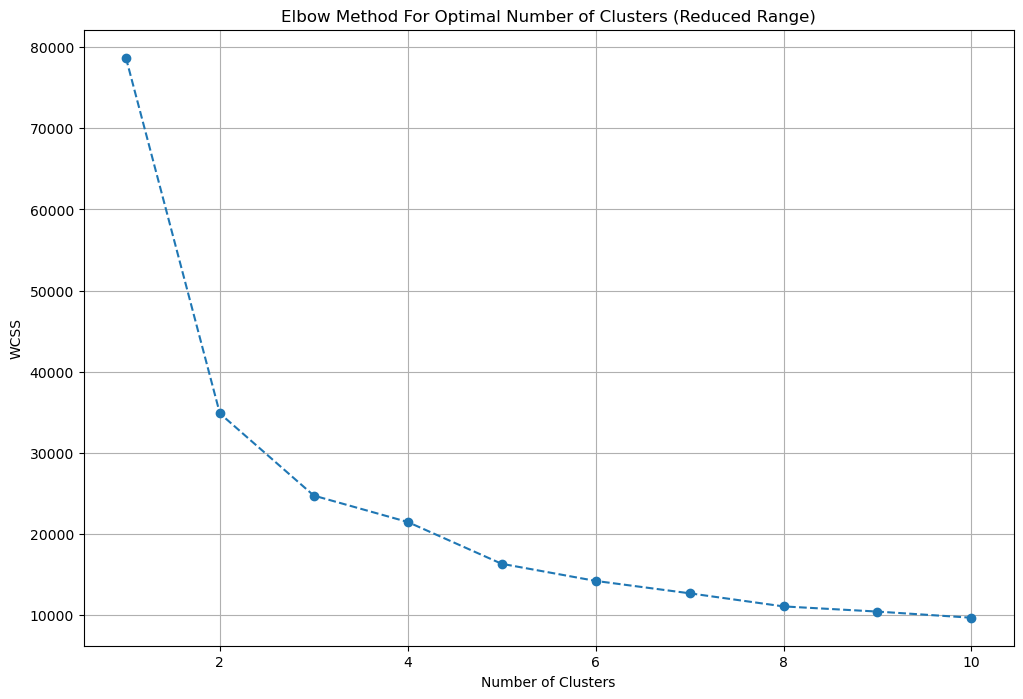

In [67]:
# # Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),['INCOME','HOME_VAL']),
    ('encoder',OrdinalEncoder(),['EDUCATION','OCCUPATION'])
],
    remainder='passthrough')

wcss_reduced = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('cluster',kmeans)
    ])
    pipeline.fit(temp_df)
    wcss_reduced.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [68]:
# NOW CREATE THE COLUMN
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
# CREATE THE PIPELINE
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('clustering',kmeans)])
y_pred = pipeline.fit_predict(temp_df)
# CREATE COLUMN
data_copy['financial_status'] = y_pred
status_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
data_copy['financial_status'] = data_copy['financial_status'].map(status_mapping)

# FEATURE SELECTION

# ENCODE THE CATEGORICAL COLUMNS


In [69]:
# MAKE ANOTHER COPY OF DATASET AND USE THEM FOR FEATURE SELECTION
df3 = data_copy.copy()

In [70]:
# EXTRACT CATEGORICAL COLUMNS
cat_cols = df3.select_dtypes(include=['object']).columns
cat_cols

Index(['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE',
       'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY', 'financial_status'],
      dtype='object')

In [71]:
# APPLY ENCODING TO CATEGORICAL COLUMNS
from sklearn.preprocessing import OrdinalEncoder
for col in cat_cols:
    oe = OrdinalEncoder()
    df3[col] = oe.fit_transform(df3[[col]])

In [72]:
# DROP CLASSIFICATION OUTPUT COLUMNS
df3.drop(columns=['CLAIM_FLAG'],inplace=True)

In [73]:
# SPILTING THE DATASET INTO TRAINING AND TESTING SET
x_label = df3.drop(columns=['CLM_AMT'])
y_label = df3['CLM_AMT']
x_label.shape,y_label.shape

((9010, 24), (9010,))

# Technique 1 - Correlation Analysis


<Axes: >

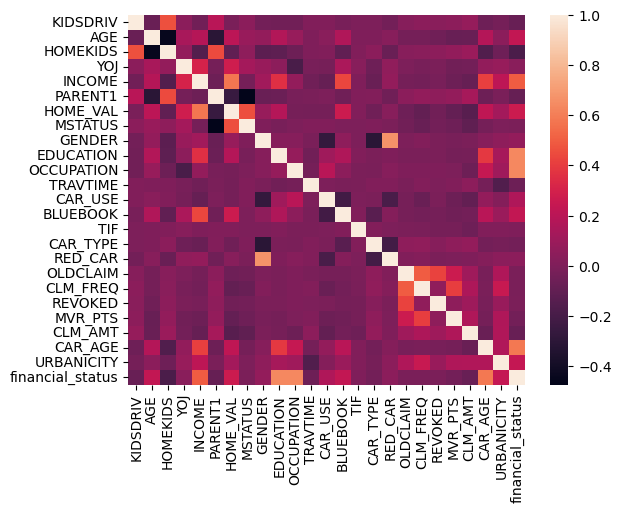

In [74]:
sns.heatmap(df3.corr())

In [75]:
fi_df1 = df3.corr()['CLM_AMT'].reset_index().rename(columns={'index':'feature','CLM_AMT':'corr_coef'}).sort_values(by='corr_coef',ascending=False)
fi_df1

feature  corr_coef
21           CLM_AMT   1.000000
23        URBANICITY   0.164933
20           MVR_PTS   0.161027
18          CLM_FREQ   0.156577
5            PARENT1   0.130313
17          OLDCLAIM   0.112768
19           REVOKED   0.105998
2           HOMEKIDS   0.090052
0           KIDSDRIV   0.076365
15          CAR_TYPE   0.067934
11          TRAVTIME   0.045649
16           RED_CAR   0.002622
8             GENDER  -0.011214
9          EDUCATION  -0.030836
13          BLUEBOOK  -0.040978
3                YOJ  -0.041428
14               TIF  -0.057843
10        OCCUPATION  -0.060718
22           CAR_AGE  -0.072404
1                AGE  -0.072834
24  financial_status  -0.080786
4             INCOME  -0.085452
12           CAR_USE  -0.098534
7            MSTATUS  -0.110920
6           HOME_VAL  -0.137771

# Technique 2 - Random Forest Feature Importance


In [76]:
from sklearn.ensemble import RandomForestRegressor

# TRAIN THE RANDOM FOREST REGRESSOR ON DATA
rf = RandomForestRegressor()
rf.fit(x_label,y_label)
# EXTRACT FEATURE IMPORTANCE SCORE 
fi_df2 = pd.DataFrame({'feature':x_label.columns,
             'imp_score':rf.feature_importances_}
            ).sort_values(by='imp_score',ascending=False)
fi_df2

feature  imp_score
13          BLUEBOOK   0.118798
17          OLDCLAIM   0.100038
11          TRAVTIME   0.095886
4             INCOME   0.093230
1                AGE   0.089516
6           HOME_VAL   0.075914
20           MVR_PTS   0.052052
21           CAR_AGE   0.050836
3                YOJ   0.046863
14               TIF   0.043104
10        OCCUPATION   0.032457
15          CAR_TYPE   0.031023
2           HOMEKIDS   0.020903
9          EDUCATION   0.019493
0           KIDSDRIV   0.019202
22        URBANICITY   0.016954
18          CLM_FREQ   0.015828
12           CAR_USE   0.014550
5            PARENT1   0.012826
19           REVOKED   0.012281
23  financial_status   0.011376
7            MSTATUS   0.010214
16           RED_CAR   0.008959
8             GENDER   0.007697

# Technique 3 - Gradient Boosting Feature importances


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_label,y_label)

fi_df3 = pd.DataFrame({'feature':x_label.columns,
             'imp_score':gbr.feature_importances_}).sort_values(by='imp_score',ascending=False)
fi_df3

feature  imp_score
17          OLDCLAIM   0.190389
22        URBANICITY   0.105085
13          BLUEBOOK   0.090856
1                AGE   0.085498
6           HOME_VAL   0.081809
4             INCOME   0.058070
10        OCCUPATION   0.051612
20           MVR_PTS   0.045795
5            PARENT1   0.041870
11          TRAVTIME   0.033221
0           KIDSDRIV   0.030925
15          CAR_TYPE   0.029108
12           CAR_USE   0.027051
19           REVOKED   0.026140
23  financial_status   0.021811
7            MSTATUS   0.018762
14               TIF   0.016730
3                YOJ   0.011518
2           HOMEKIDS   0.011484
9          EDUCATION   0.008819
21           CAR_AGE   0.007832
18          CLM_FREQ   0.003305
8             GENDER   0.001897
16           RED_CAR   0.000412

# Technique 4 - Permutation Importance


In [78]:
# IMPORT PERMUTATION IMPORTANCE
from sklearn.inspection import permutation_importance

# TRAIN RANDOM FOREST MODEL
rf = RandomForestRegressor()
rf.fit(x_label,y_label)

# CALCULATE PERMUTATION IMPORTANCE
perm_importance = permutation_importance(rf,x_label,y_label,n_repeats=10, random_state=42)

# CREATE DATAFRAME
fi_df4 = pd.DataFrame({'feature':x_label.columns,
             'imp_score':perm_importance.importances_mean}).sort_values(by='imp_score',ascending=False)
fi_df4

feature  imp_score
17          OLDCLAIM   0.477658
6           HOME_VAL   0.275280
11          TRAVTIME   0.219274
4             INCOME   0.210358
13          BLUEBOOK   0.185692
20           MVR_PTS   0.184787
1                AGE   0.181007
22        URBANICITY   0.178949
10        OCCUPATION   0.158956
5            PARENT1   0.108136
12           CAR_USE   0.103543
21           CAR_AGE   0.080948
14               TIF   0.075125
3                YOJ   0.073685
15          CAR_TYPE   0.072128
19           REVOKED   0.065284
0           KIDSDRIV   0.061119
2           HOMEKIDS   0.039935
23  financial_status   0.034018
7            MSTATUS   0.033546
9          EDUCATION   0.022804
18          CLM_FREQ   0.019574
16           RED_CAR   0.011496
8             GENDER   0.008462

# Technique 5 - LASSO


In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

feature  lasso_coeff
22        URBANICITY   558.663754
20           MVR_PTS   239.134294
19           REVOKED   210.609741
11          TRAVTIME   202.093457
5            PARENT1   171.375888
15          CAR_TYPE   153.240601
0           KIDSDRIV   145.240615
18          CLM_FREQ   145.165746
2           HOMEKIDS    78.893585
9          EDUCATION    65.233622
16           RED_CAR    23.317310
1                AGE    17.313528
23  financial_status   -14.830860
17          OLDCLAIM   -22.450704
13          BLUEBOOK   -25.291818
8             GENDER   -26.498543
3                YOJ   -53.044263
21           CAR_AGE  -110.568840
7            MSTATUS  -143.260290
10        OCCUPATION  -143.713769
4             INCOME  -151.415074
14               TIF  -162.056340
6           HOME_VAL  -195.807885
12           CAR_USE  -278.862280

* RESULTS OF LASS MIGHT BE NOT RELIABLE BECAUSE WE USE ORDINAL ENCODING

# Technique 6 - RFE


In [80]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

feature  rfe_score
13          BLUEBOOK   0.119723
17          OLDCLAIM   0.097346
11          TRAVTIME   0.097109
4             INCOME   0.090512
1                AGE   0.090065
6           HOME_VAL   0.075349
20           MVR_PTS   0.054146
21           CAR_AGE   0.051282
3                YOJ   0.051089
14               TIF   0.039837
10        OCCUPATION   0.031401
15          CAR_TYPE   0.031183
2           HOMEKIDS   0.021359
0           KIDSDRIV   0.018833
9          EDUCATION   0.018828
22        URBANICITY   0.016920
18          CLM_FREQ   0.015227
5            PARENT1   0.014532
12           CAR_USE   0.013311
19           REVOKED   0.012763
23  financial_status   0.011712
16           RED_CAR   0.010048
7            MSTATUS   0.009761
8             GENDER   0.007665

# Technique 7 - SHAP


In [81]:
! pip install shap

In [82]:
# # IMPORT SHAP
# import shap

# # COMPUTE THE SHAP VALUES USING THE TRAIN RANDOM FOREST MODEL.
# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(x_label,y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(x_label)

# # SUM ALL THE ABSOLUTE SHAPE VALUES ACROSS ALL THE SAMPLES TO GET AN OVERALL MEASURE OF FEATURE IMPORTANCE
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_sum

In [83]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').set_index('feature')
final_fi_df

corr_coef  imp_score_x  imp_score_y  imp_score  lasso_coeff  \
feature                                                                         
URBANICITY         0.164933     0.016954     0.105085   0.178949   558.663754   
MVR_PTS            0.161027     0.052052     0.045795   0.184787   239.134294   
CLM_FREQ           0.156577     0.015828     0.003305   0.019574   145.165746   
PARENT1            0.130313     0.012826     0.041870   0.108136   171.375888   
OLDCLAIM           0.112768     0.100038     0.190389   0.477658   -22.450704   
REVOKED            0.105998     0.012281     0.026140   0.065284   210.609741   
HOMEKIDS           0.090052     0.020903     0.011484   0.039935    78.893585   
KIDSDRIV           0.076365     0.019202     0.030925   0.061119   145.240615   
CAR_TYPE           0.067934     0.031023     0.029108   0.072128   153.240601   
TRAVTIME           0.045649     0.095886     0.033221   0.219274   202.093457   
RED_CAR            0.002622     0.008959     0.000412   0.011496    23.317310   
GENDER            -0.011214     0.007697     0.001897   0.008462   -26.498543   
EDUCATION         -0.030836     0.019493     0.008819   0.022804    65.233622   
BLUEBOOK          -0.040978     0.118798     0.090856   0.185692   -25.291818   
YOJ               -0.041428     0.046863     0.011518   0.073685   -53.044263   
TIF               -0.057843     0.043104     0.016730   0.075125  -162.056340   
OCCUPATION        -0.060718     0.032457     0.051612   0.158956  -143.713769   
CAR_AGE           -0.072404     0.050836     0.007832   0.080948  -110.568840   
AGE               -0.072834     0.089516     0.085498   0.181007    17.313528   
financial_status  -0.080786     0.011376     0.021811   0.034018   -14.830860   
INCOME            -0.085452     0.093230     0.058070   0.210358  -151.415074   
CAR_USE           -0.098534     0.014550     0.027051   0.103543  -278.862280   
MSTATUS           -0.110920     0.010214     0.018762   0.033546  -143.260290   
HOME_VAL          -0.137771     0.075914     0.081809   0.275280  -195.807885   

                  rfe_score  
feature                      
URBANICITY         0.016920  
MVR_PTS            0.054146  
CLM_FREQ           0.015227  
PARENT1            0.014532  
OLDCLAIM           0.097346  
REVOKED            0.012763  
HOMEKIDS           0.021359  
KIDSDRIV           0.018833  
CAR_TYPE           0.031183  
TRAVTIME           0.097109  
RED_CAR            0.010048  
GENDER             0.007665  
EDUCATION          0.018828  
BLUEBOOK           0.119723  
YOJ                0.051089  
TIF                0.039837  
OCCUPATION         0.031401  
CAR_AGE            0.051282  
AGE                0.090065  
financial_status   0.011712  
INCOME             0.090512  
CAR_USE            0.013311  
MSTATUS            0.009761  
HOME_VAL           0.075349

In [84]:
# NORMALIZE THE SCORE
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

corr_coef  imp_score_x  imp_score_y  imp_score  lasso_coeff  \
feature                                                                         
URBANICITY         0.776081     0.016954     0.105085   0.062097     0.818577   
MVR_PTS            0.757699     0.052052     0.045795   0.064123     0.350389   
CLM_FREQ           0.736762     0.015828     0.003305   0.006792     0.212703   
PARENT1            0.613178     0.012826     0.041870   0.037524     0.251107   
OLDCLAIM           0.530620     0.100038     0.190389   0.165752    -0.032896   
REVOKED            0.498765     0.012281     0.026140   0.022654     0.308594   
HOMEKIDS           0.423731     0.020903     0.011484   0.013858     0.115598   
KIDSDRIV           0.359330     0.019202     0.030925   0.021209     0.212813   
CAR_TYPE           0.319658     0.031023     0.029108   0.025029     0.224534   
TRAVTIME           0.214796     0.095886     0.033221   0.076090     0.296116   
RED_CAR            0.012337     0.008959     0.000412   0.003989     0.034165   
GENDER            -0.052766     0.007697     0.001897   0.002936    -0.038827   
EDUCATION         -0.145098     0.019493     0.008819   0.007913     0.095583   
BLUEBOOK          -0.192816     0.118798     0.090856   0.064437    -0.037059   
YOJ               -0.194935     0.046863     0.011518   0.025569    -0.077723   
TIF               -0.272174     0.043104     0.016730   0.026069    -0.237452   
OCCUPATION        -0.285702     0.032457     0.051612   0.055159    -0.210575   
CAR_AGE           -0.340689     0.050836     0.007832   0.028090    -0.162010   
AGE               -0.342715     0.089516     0.085498   0.062811     0.025368   
financial_status  -0.380133     0.011376     0.021811   0.011805    -0.021731   
INCOME            -0.402088     0.093230     0.058070   0.072996    -0.221860   
CAR_USE           -0.463643     0.014550     0.027051   0.035930    -0.408601   
MSTATUS           -0.521924     0.010214     0.018762   0.011641    -0.209911   
HOME_VAL          -0.648272     0.075914     0.081809   0.095525    -0.286906   

                  rfe_score  
feature                      
URBANICITY         0.016920  
MVR_PTS            0.054146  
CLM_FREQ           0.015227  
PARENT1            0.014532  
OLDCLAIM           0.097346  
REVOKED            0.012763  
HOMEKIDS           0.021359  
KIDSDRIV           0.018833  
CAR_TYPE           0.031183  
TRAVTIME           0.097109  
RED_CAR            0.010048  
GENDER             0.007665  
EDUCATION          0.018828  
BLUEBOOK           0.119723  
YOJ                0.051089  
TIF                0.039837  
OCCUPATION         0.031401  
CAR_AGE            0.051282  
AGE                0.090065  
financial_status   0.011712  
INCOME             0.090512  
CAR_USE            0.013311  
MSTATUS            0.009761  
HOME_VAL           0.075349

In [85]:
final_fi_df[['corr_coef','imp_score_x','imp_score_y','imp_score','lasso_coeff','rfe_score']].mean(axis=1).sort_values(ascending=False)


feature
URBANICITY          0.299286
MVR_PTS             0.220701
OLDCLAIM            0.175208
CLM_FREQ            0.165103
PARENT1             0.161840
REVOKED             0.146866
TRAVTIME            0.135536
KIDSDRIV            0.110385
CAR_TYPE            0.110089
HOMEKIDS            0.101155
BLUEBOOK            0.027323
RED_CAR             0.011652
AGE                 0.001757
EDUCATION           0.000923
GENDER             -0.011900
YOJ                -0.022936
INCOME             -0.051523
OCCUPATION         -0.054274
financial_status   -0.057527
CAR_AGE            -0.060777
TIF                -0.063981
HOME_VAL           -0.101097
MSTATUS            -0.113576
CAR_USE            -0.130234
dtype: float64

In [86]:
# DROP COLUMNS
# MSTATUS,CAR_USE,GENDER,RED_CAR,KIDSDRIV

In [87]:
data_copy.drop(columns=['MSTATUS','CAR_USE','GENDER','RED_CAR','KIDSDRIV'],inplace=True)
data_copy.shape

(9010, 21)

In [88]:
# EXPORT THE DATASET
data_copy.to_csv('rdy_data.csv',index=False)

In [3]:
# IMPORT THE DATASET
data_copy = pd.read_csv('rdy_data.csv')

In [3]:
data_copy.head()

AGE  HOMEKIDS   YOJ        INCOME PARENT1  HOME_VAL    EDUCATION  \
0  60.0         0  11.0  67349.000000      No       0.0          PhD   
1  43.0         0  11.0  91449.000000      No  257252.0  High School   
2  48.0         0  11.0  52881.000000      No       0.0    Bachelors   
3  35.0         1  10.0  16039.000000      No  124191.0  High School   
4  51.0         0  14.0  58892.847575      No  306251.0  High School   

     OCCUPATION  TRAVTIME  BLUEBOOK  ...  CAR_TYPE OLDCLAIM  CLM_FREQ  \
0  Professional        14   14230.0  ...   Minivan   4461.0         2   
1   Blue Collar        22   14940.0  ...   Minivan      0.0         0   
2       Manager        26   21970.0  ...       Van      0.0         0   
3      Clerical         5    4010.0  ...       SUV  38690.0         2   
4   Blue Collar        32   15440.0  ...   Minivan      0.0         0   

   REVOKED MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG           URBANICITY  \
0       No       3      0.0     18.0           0  Highly Urban/ Urban   
1       No       0      0.0      1.0           0  Highly Urban/ Urban   
2       No       2      0.0     10.0           0  Highly Urban/ Urban   
3       No       3      0.0     10.0           0  Highly Urban/ Urban   
4       No       0      0.0      6.0           0  Highly Urban/ Urban   

  financial_status  
0              Low  
1             High  
2              Low  
3             High  
4             High  

[5 rows x 21 columns]

# MODEL SELECTION

In [4]:
cat_cols = data_copy.select_dtypes(include=['object']).columns
cat_cols

Index(['PARENT1', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'REVOKED',
       'URBANICITY', 'financial_status'],
      dtype='object')

In [5]:
data_copy[cat_cols].nunique()
ord_end_cols = ['','','']

In [6]:
data_copy.select_dtypes(include=['number']).columns
std_scale_columns = ['INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','OLDCLAIM']
minmaxscale_columns = ['AGE','YOJ','TIF']

In [7]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer

In [8]:
# MAKE ANOTHER COPY OF DATA FOR MODEL SELECTION
df4 = data_copy.copy()
# DROP CLAIM FLAG AS OUR OUTPUT COLUMN .
df4.drop(columns=['CLM_AMT'],inplace=True)
df4.head()

AGE  HOMEKIDS   YOJ        INCOME PARENT1  HOME_VAL    EDUCATION  \
0  60.0         0  11.0  67349.000000      No       0.0          PhD   
1  43.0         0  11.0  91449.000000      No  257252.0  High School   
2  48.0         0  11.0  52881.000000      No       0.0    Bachelors   
3  35.0         1  10.0  16039.000000      No  124191.0  High School   
4  51.0         0  14.0  58892.847575      No  306251.0  High School   

     OCCUPATION  TRAVTIME  BLUEBOOK  TIF CAR_TYPE  OLDCLAIM  CLM_FREQ REVOKED  \
0  Professional        14   14230.0   11  Minivan    4461.0         2      No   
1   Blue Collar        22   14940.0    1  Minivan       0.0         0      No   
2       Manager        26   21970.0    1      Van       0.0         0      No   
3      Clerical         5    4010.0    4      SUV   38690.0         2      No   
4   Blue Collar        32   15440.0    7  Minivan       0.0         0      No   

   MVR_PTS  CAR_AGE  CLAIM_FLAG           URBANICITY financial_status  
0        3     18.0           0  Highly Urban/ Urban              Low  
1        0      1.0           0  Highly Urban/ Urban             High  
2        2     10.0           0  Highly Urban/ Urban              Low  
3        3     10.0           0  Highly Urban/ Urban             High  
4        0      6.0           0  Highly Urban/ Urban             High

In [9]:
# CREATING TRAINING TESTING DATASET
x_label = df4.drop(columns=['CLAIM_FLAG'])
y_label = df4['CLAIM_FLAG']
x_train,x_test,y_train,y_test = train_test_split(x_label,y_label,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7208, 19), (1802, 19), (7208,), (1802,))

### ORDINAL ENCODER

In [11]:
# CREATE A COLUMNTRANSFORMER
ct = ColumnTransformer(transformers=[
    ('ordinalencoding',OrdinalEncoder(),cat_cols),
    ('std_scaling',MinMaxScaler(),std_scale_columns),
    ('mmscaling',MinMaxScaler(),minmaxscale_columns)
],remainder='passthrough')

In [12]:
# CREATE A PIPELINE
pipeline = Pipeline([
    ('column_transform',ct),
    ('model training',LogisticRegression(solver='liblinear'))
])

In [13]:
# KFOLD CROSS VALIDATION
kfold = KFold(n_splits=10,shuffle=True)
score = cross_val_score(pipeline,x_label,y_label,cv=kfold,scoring='accuracy')

In [14]:
score.mean(),score.std()

(0.7796892341842396, 0.010295575941293503)

In [15]:
# DEFINE FUNCTION FOR CHECK SCORE 
def score_checker(model_name,model):

   # CREATE A PIPELINE
    pipeline = Pipeline([
    ('column_transform',ct),
    ('model training',model)
    ]) 
    # KFOLD CROSS VALIDATION
    kfold = KFold(n_splits=10,shuffle=True)
    score = cross_val_score(pipeline,x_label,y_label,cv=kfold,scoring='accuracy') 
    
    return score.mean()
    

In [101]:
model_dict = {
    'linear_reg':LogisticRegression(solver='liblinear'),
    'svr':SVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreeClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'xgboost':XGBClassifier(),
    'catboost':CatBoostClassifier()
}

In [102]:
output = {}
for model_name,model in model_dict.items():
    output[model_name] = score_checker(model_name,model)
print(output)

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages

Learning rate set to 0.02518
0:	learn: 0.6803011	total: 114ms	remaining: 1m 53s
1:	learn: 0.6690409	total: 121ms	remaining: 1m
2:	learn: 0.6572699	total: 127ms	remaining: 42.2s
3:	learn: 0.6496249	total: 133ms	remaining: 33.1s
4:	learn: 0.6414351	total: 139ms	remaining: 27.7s
5:	learn: 0.6324857	total: 146ms	remaining: 24.2s
6:	learn: 0.6244554	total: 152ms	remaining: 21.6s
7:	learn: 0.6157290	total: 159ms	remaining: 19.7s
8:	learn: 0.6078752	total: 165ms	remaining: 18.1s
9:	learn: 0.6002861	total: 171ms	remaining: 16.9s
10:	learn: 0.5934502	total: 177ms	remaining: 16s
11:	learn: 0.5882424	total: 186ms	remaining: 15.3s
12:	learn: 0.5826586	total: 193ms	remaining: 14.6s
13:	learn: 0.5765238	total: 199ms	remaining: 14s
14:	learn: 0.5718125	total: 205ms	remaining: 13.5s
15:	learn: 0.5675255	total: 211ms	remaining: 13s
16:	learn: 0.5631555	total: 217ms	remaining: 12.5s
17:	learn: 0.5581529	total: 223ms	remaining: 12.2s
18:	learn: 0.5527775	total: 229ms	remaining: 11.8s
19:	learn: 0.5490157

In [124]:
# MODELS OUTPUT WITH ORDINAL ENCODING
output = pd.DataFrame(output.items(),columns=['algo','acc_score'])
output

algo  acc_score
0         linear_reg   0.784684
1                svr   0.765039
2      decision tree   0.695339
3      random forest   0.774473
4        extra trees   0.692342
5  gradient boosting   0.787902
6           adaboost   0.776582
7            xgboost        NaN
8           catboost   0.790899

## ORDINAL + ONEHOTENCODING + BINARYENCODING


In [10]:

x_label[cat_cols].nunique()
ohe_cols = ['OCCUPATION','CAR_TYPE']
bin_cols = ['PARENT1','REVOKED','URBANICITY']
ordinal_cols = ['EDUCATION','financial_status']

In [11]:
# DEFINE COLUMN TRANSFORMER
ct2 = ColumnTransformer(transformers=[
    ('bin_cols_encoding',OrdinalEncoder(),['PARENT1','REVOKED','URBANICITY','EDUCATION','financial_status']),
    ('ohe_encoding',OneHotEncoder(drop='first'),['OCCUPATION','CAR_TYPE']),
   ('ordinal_encoding',OrdinalEncoder(categories=[['High School','Bachelors','Masters','PhD'],['Low','Medium','High']]),['EDUCATION','financial_status']),
    ('std_scaling',StandardScaler(),std_scale_columns),
    ('mmscaling',MinMaxScaler(),minmaxscale_columns)
    ],remainder='passthrough')


In [106]:
new = ColumnTransformer(transformers=[
    ('bin_cols_encoding',LabelEncoder(),['PARENT1']),
    ('ohe_encoding',OneHotEncoder(drop='first'),ohe_cols),
   ('ordinal_encoding',OrdinalEncoder(categories=[['High School','Bachelors','Masters','PhD'],['Low','Medium','High']]),ordinal_cols),
    ('std_scaling',StandardScaler(),std_scale_columns),
    ('mmscaling',MinMaxScaler(),minmaxscale_columns)
    ],remainder='passthrough')

In [113]:
# CREATE A PIPELINE
pipeline = Pipeline([
    ('column_transform',ct2),
    ('model training',LogisticRegression(solver='liblinear'))
])
# KFOLD CROSS VALIDATION
kfold = KFold(n_splits=10,shuffle=True)
score = cross_val_score(pipeline,x_label,y_label,cv=kfold,scoring='accuracy')
score.mean(),score.std()

(0.7847946725860155, 0.01937968881435138)

In [115]:
# DEFINE FUNCTION FOR CHECK SCORE 
def score_checker(model_name,model):

   # CREATE A PIPELINE
    pipeline = Pipeline([
    ('column_transform',ct2),
    ('model training',model)
    ]) 
    # KFOLD CROSS VALIDATION
    kfold = KFold(n_splits=10,shuffle=True)
    score = cross_val_score(pipeline,x_label,y_label,cv=kfold,scoring='accuracy') 
    
    return score.mean()

In [116]:
model_dict = {
    'linear_reg':LogisticRegression(solver='liblinear'),
    'svr':SVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreeClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'xgboost':XGBClassifier(),
    'catboost':CatBoostClassifier()
}

In [127]:
output = {}
for model_name,model in model_dict.items():
    output[model_name] = score_checker(model_name,model)


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages

Learning rate set to 0.02518
0:	learn: 0.6806354	total: 7.55ms	remaining: 7.54s
1:	learn: 0.6686391	total: 15.3ms	remaining: 7.66s
2:	learn: 0.6568760	total: 22.3ms	remaining: 7.4s
3:	learn: 0.6464295	total: 29.3ms	remaining: 7.29s
4:	learn: 0.6358888	total: 36.4ms	remaining: 7.25s
5:	learn: 0.6263780	total: 43.2ms	remaining: 7.16s
6:	learn: 0.6175327	total: 50ms	remaining: 7.09s
7:	learn: 0.6092256	total: 56.6ms	remaining: 7.02s
8:	learn: 0.6028581	total: 63.3ms	remaining: 6.97s
9:	learn: 0.5955399	total: 70ms	remaining: 6.93s
10:	learn: 0.5883597	total: 77ms	remaining: 6.92s
11:	learn: 0.5832746	total: 83.4ms	remaining: 6.87s
12:	learn: 0.5764249	total: 90.3ms	remaining: 6.86s
13:	learn: 0.5719377	total: 97ms	remaining: 6.83s
14:	learn: 0.5676803	total: 104ms	remaining: 6.81s
15:	learn: 0.5625980	total: 110ms	remaining: 6.77s
16:	learn: 0.5576576	total: 117ms	remaining: 6.75s
17:	learn: 0.5538673	total: 124ms	remaining: 6.74s
18:	learn: 0.5489013	total: 130ms	remaining: 6.71s
19:	lea

In [129]:
# MODEL PERFORMANCE WITH ORDINAL AND OHE AND BINARYENCODING
pd.DataFrame(output.items(),columns=['algo','acc_score'])
#output

algo  acc_score
0         linear_reg   0.784795
1                svr   0.765372
2      decision tree   0.699889
3      random forest   0.779134
4        extra trees   0.697891
5  gradient boosting   0.785017
6           adaboost   0.775805
7            xgboost        NaN
8           catboost   0.789345

In [141]:
data_copy.head()

AGE  HOMEKIDS   YOJ        INCOME PARENT1  HOME_VAL    EDUCATION  \
0  60.0         0  11.0  67349.000000      No       0.0          PhD   
1  43.0         0  11.0  91449.000000      No  257252.0  High School   
2  48.0         0  11.0  52881.000000      No       0.0    Bachelors   
3  35.0         1  10.0  16039.000000      No  124191.0  High School   
4  51.0         0  14.0  58892.847575      No  306251.0  High School   

     OCCUPATION  TRAVTIME  BLUEBOOK  TIF CAR_TYPE  OLDCLAIM  CLM_FREQ REVOKED  \
0  Professional        14   14230.0   11  Minivan    4461.0         2      No   
1   Blue Collar        22   14940.0    1  Minivan       0.0         0      No   
2       Manager        26   21970.0    1      Van       0.0         0      No   
3      Clerical         5    4010.0    4      SUV   38690.0         2      No   
4   Blue Collar        32   15440.0    7  Minivan       0.0         0      No   

   MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG           URBANICITY financial_status  
0        3      0.0     18.0           0  Highly Urban/ Urban              Low  
1        0      0.0      1.0           0  Highly Urban/ Urban             High  
2        2      0.0     10.0           0  Highly Urban/ Urban              Low  
3        3      0.0     10.0           0  Highly Urban/ Urban             High  
4        0      0.0      6.0           0  Highly Urban/ Urban             High

In [13]:
x_label  = ct2.fit_transform(data_copy.drop(columns=['CLM_AMT','CLAIM_FLAG']))
y_label = data_copy['CLAIM_FLAG']
y_label = y_label.ravel()


## HYPERPARAMETER TUNNING
* WE USE OPTUNA FOR HYPERPARAMETER TUNNING

In [19]:
import optuna
# DEFINE THE OBJECTIVE FUNCTION
def objective(trial):
    # CHOOSE THE ALGORITHM TO CHOOSE
    classifier = trial.suggest_categorical('classifier',['CatBoostClassifier','GradientBoostingClassifier'])
    # TUNE GRADIENTBOOSTINGCLASSIFIER PARAMETERS
    if classifier=='GradientBoostingClassifier':
        # SUGGEST VALUES FOR THE HYPERPARAMETERS
        n_estimators = trial.suggest_int('n_estimators',50,200)
        max_depth = trial.suggest_int('max_depth',2,15)
        min_impurity_decrease = trial.suggest_float('min_impurity_decrease',0.0,0.9)
        criterion = trial.suggest_categorical('criterion',['friedman_mse','squared_error'])
        # CREATE THE RANDOM FOREST CLASSIFIER WITH SUGGESTED PARAMETERS
        model = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,min_impurity_decrease=min_impurity_decrease,random_state=42)

    # TUNE CATBOOSTCLASSIFIER
    elif classifier == 'CatBoostClassifier':
        # SUGGEST VALUES FOR THE HYPERPARAMETERS
        iterations = trial.suggest_int('iterations',50,200)
       #learning_rate = trial.suggest_int('learning_rate',0.1,0.9)
        depth = trial.suggest_int('depth',2,15)
        l2_leaf_reg = trial.suggest_int('l2_leaf_reg',1,10)
        #eval_metric = trial.suggest_categorical('eval_metric',['Accuracy'])
        early_stopping_rounds = trial.suggest_int('early_stopping_rounds',10,60)

        # CREATE THE CATBOOSTCLASSIFIER WITH SUGGESTED PARAMETERS
        model = CatBoostClassifier(iterations=iterations,depth=depth,l2_leaf_reg=l2_leaf_reg,
                        early_stopping_rounds=early_stopping_rounds)
    
        
    # PERFORM 3-FOLD CROSS-VALIDATION AND CALCULATE ACCURACY
    score = cross_val_score(model,x_label,y_label,cv=3,scoring='accuracy').mean()
    # RETURN ACCURACY_SCORE FOR OPTUNA TO MAXIMIZE
    return score
    

In [20]:
# CREATE A STUDY OBJECT AND OPTIMIZE THE OBJECTIVE  FUNCTION
study = optuna.create_study(direction='maximize') # WE AIM TO MAXIMIZE THE ACCURACY SCORE
study.optimize(objective,n_trials=50) # RUN 50 TRIALS TO FIND THE BEST PARAMETERS

[I 2025-03-06 08:44:34,914] A new study created in memory with name: no-name-43af1fb9-4f8b-4238-aad7-7b9f3522cf44


0:	learn: 0.6735477	total: 619ms	remaining: 1m 32s
1:	learn: 0.6553624	total: 1.02s	remaining: 1m 15s
2:	learn: 0.6410751	total: 1.04s	remaining: 51.4s
3:	learn: 0.6258866	total: 1.41s	remaining: 51.8s
4:	learn: 0.6107474	total: 1.59s	remaining: 46.4s
5:	learn: 0.5975952	total: 1.77s	remaining: 42.9s
6:	learn: 0.5857359	total: 1.92s	remaining: 39.6s
7:	learn: 0.5740591	total: 2.19s	remaining: 39.1s
8:	learn: 0.5622692	total: 2.51s	remaining: 39.5s
9:	learn: 0.5514880	total: 2.79s	remaining: 39.4s
10:	learn: 0.5417419	total: 3.04s	remaining: 38.7s
11:	learn: 0.5324346	total: 3.31s	remaining: 38.4s
12:	learn: 0.5233439	total: 3.58s	remaining: 38s
13:	learn: 0.5149476	total: 3.85s	remaining: 37.7s
14:	learn: 0.5051981	total: 4.12s	remaining: 37.3s
15:	learn: 0.4980882	total: 4.38s	remaining: 37s
16:	learn: 0.4893987	total: 4.64s	remaining: 36.6s
17:	learn: 0.4816784	total: 4.92s	remaining: 36.4s
18:	learn: 0.4764909	total: 5.19s	remaining: 36.1s
19:	learn: 0.4716446	total: 5.45s	remaining

[I 2025-03-06 08:46:34,053] Trial 0 finished with value: 0.7786893532565969 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 151, 'depth': 12, 'l2_leaf_reg': 2, 'early_stopping_rounds': 58}. Best is trial 0 with value: 0.7786893532565969.
[I 2025-03-06 08:46:43,222] Trial 1 finished with value: 0.7678136702770524 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 72, 'max_depth': 10, 'min_impurity_decrease': 0.276486613366985, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7786893532565969.
[I 2025-03-06 08:46:53,977] Trial 2 finished with value: 0.7590455852772763 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 62, 'max_depth': 13, 'min_impurity_decrease': 0.14059744818821196, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7786893532565969.


0:	learn: 0.6811769	total: 3.98ms	remaining: 601ms
1:	learn: 0.6700399	total: 8.34ms	remaining: 625ms
2:	learn: 0.6616726	total: 11.8ms	remaining: 584ms
3:	learn: 0.6532481	total: 15.3ms	remaining: 565ms
4:	learn: 0.6437548	total: 19.2ms	remaining: 564ms
5:	learn: 0.6358704	total: 23.1ms	remaining: 561ms
6:	learn: 0.6291185	total: 26.4ms	remaining: 547ms
7:	learn: 0.6232306	total: 30ms	remaining: 541ms
8:	learn: 0.6167443	total: 33.4ms	remaining: 531ms
9:	learn: 0.6106201	total: 37.2ms	remaining: 528ms
10:	learn: 0.6053110	total: 40.5ms	remaining: 519ms
11:	learn: 0.6003917	total: 43.7ms	remaining: 510ms
12:	learn: 0.5961661	total: 47.1ms	remaining: 503ms
13:	learn: 0.5918176	total: 50.6ms	remaining: 499ms
14:	learn: 0.5864838	total: 54.6ms	remaining: 499ms
15:	learn: 0.5829153	total: 58.3ms	remaining: 495ms
16:	learn: 0.5776911	total: 62ms	remaining: 492ms
17:	learn: 0.5728211	total: 65.8ms	remaining: 489ms
18:	learn: 0.5682075	total: 69.8ms	remaining: 488ms
19:	learn: 0.5651412	total

[I 2025-03-06 08:46:56,213] Trial 3 finished with value: 0.7688121909160525 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 152, 'depth': 2, 'l2_leaf_reg': 10, 'early_stopping_rounds': 15}. Best is trial 0 with value: 0.7786893532565969.


127:	learn: 0.4769140	total: 404ms	remaining: 75.7ms
128:	learn: 0.4767057	total: 407ms	remaining: 72.5ms
129:	learn: 0.4763177	total: 410ms	remaining: 69.4ms
130:	learn: 0.4761054	total: 413ms	remaining: 66.2ms
131:	learn: 0.4759138	total: 416ms	remaining: 63.1ms
132:	learn: 0.4757609	total: 419ms	remaining: 59.9ms
133:	learn: 0.4755679	total: 422ms	remaining: 56.7ms
134:	learn: 0.4751737	total: 425ms	remaining: 53.6ms
135:	learn: 0.4747549	total: 429ms	remaining: 50.5ms
136:	learn: 0.4746132	total: 465ms	remaining: 50.9ms
137:	learn: 0.4744628	total: 471ms	remaining: 47.8ms
138:	learn: 0.4742597	total: 476ms	remaining: 44.5ms
139:	learn: 0.4740221	total: 484ms	remaining: 41.5ms
140:	learn: 0.4738785	total: 489ms	remaining: 38.2ms
141:	learn: 0.4736827	total: 495ms	remaining: 34.8ms
142:	learn: 0.4734506	total: 498ms	remaining: 31.3ms
143:	learn: 0.4731112	total: 502ms	remaining: 27.9ms
144:	learn: 0.4729344	total: 505ms	remaining: 24.4ms
145:	learn: 0.4727577	total: 508ms	remaining: 

[I 2025-03-06 08:47:05,721] Trial 4 finished with value: 0.7673698915376678 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 163, 'max_depth': 13, 'min_impurity_decrease': 0.6007340147121225, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7786893532565969.
[I 2025-03-06 08:47:27,600] Trial 5 finished with value: 0.7738071959110574 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 173, 'max_depth': 8, 'min_impurity_decrease': 0.037142263083813555, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7786893532565969.
[I 2025-03-06 08:47:37,150] Trial 6 finished with value: 0.7605992912251235 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 127, 'max_depth': 15, 'min_impurity_decrease': 0.39116572216388645, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.7786893532565969.
[I 2025-03-06 08:47:48,425] Trial 7 finished with value: 0.7781354981754448 and parameters: {'classifier

0:	learn: 0.6782119	total: 8.54ms	remaining: 1.61s
1:	learn: 0.6650503	total: 16.1ms	remaining: 1.51s
2:	learn: 0.6514957	total: 23.8ms	remaining: 1.48s
3:	learn: 0.6393696	total: 31.3ms	remaining: 1.46s
4:	learn: 0.6275769	total: 38.7ms	remaining: 1.43s
5:	learn: 0.6195537	total: 46ms	remaining: 1.41s
6:	learn: 0.6093959	total: 53.5ms	remaining: 1.4s
7:	learn: 0.5993226	total: 60.7ms	remaining: 1.38s
8:	learn: 0.5901385	total: 67.7ms	remaining: 1.36s
9:	learn: 0.5848229	total: 72ms	remaining: 1.3s
10:	learn: 0.5764056	total: 78.7ms	remaining: 1.28s
11:	learn: 0.5694183	total: 85.8ms	remaining: 1.27s
12:	learn: 0.5636023	total: 93ms	remaining: 1.27s
13:	learn: 0.5585474	total: 100ms	remaining: 1.26s
14:	learn: 0.5518222	total: 107ms	remaining: 1.25s
15:	learn: 0.5471218	total: 114ms	remaining: 1.24s
16:	learn: 0.5417090	total: 121ms	remaining: 1.23s
17:	learn: 0.5367480	total: 128ms	remaining: 1.22s
18:	learn: 0.5321128	total: 135ms	remaining: 1.22s
19:	learn: 0.5283545	total: 142ms	re

[I 2025-03-06 08:47:53,033] Trial 8 finished with value: 0.7875685861704503 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 190, 'depth': 7, 'l2_leaf_reg': 7, 'early_stopping_rounds': 57}. Best is trial 8 with value: 0.7875685861704503.


175:	learn: 0.3938639	total: 1.23s	remaining: 97.6ms
176:	learn: 0.3934921	total: 1.23s	remaining: 90.6ms
177:	learn: 0.3931634	total: 1.24s	remaining: 83.6ms
178:	learn: 0.3927538	total: 1.25s	remaining: 76.6ms
179:	learn: 0.3923144	total: 1.25s	remaining: 69.6ms
180:	learn: 0.3919050	total: 1.26s	remaining: 62.6ms
181:	learn: 0.3916663	total: 1.26s	remaining: 55.6ms
182:	learn: 0.3912473	total: 1.27s	remaining: 48.7ms
183:	learn: 0.3910057	total: 1.28s	remaining: 41.7ms
184:	learn: 0.3907094	total: 1.28s	remaining: 34.7ms
185:	learn: 0.3904800	total: 1.29s	remaining: 27.8ms
186:	learn: 0.3902857	total: 1.3s	remaining: 20.8ms
187:	learn: 0.3901093	total: 1.3s	remaining: 13.9ms
188:	learn: 0.3897280	total: 1.31s	remaining: 6.93ms
189:	learn: 0.3894163	total: 1.31s	remaining: 0us


[I 2025-03-06 08:48:05,004] Trial 9 finished with value: 0.7669257432905902 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 192, 'max_depth': 12, 'min_impurity_decrease': 0.3474616593752787, 'criterion': 'friedman_mse'}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6782386	total: 6.67ms	remaining: 334ms
1:	learn: 0.6641102	total: 12.8ms	remaining: 314ms
2:	learn: 0.6505848	total: 20.7ms	remaining: 331ms
3:	learn: 0.6385056	total: 26.5ms	remaining: 311ms
4:	learn: 0.6273175	total: 32.6ms	remaining: 300ms
5:	learn: 0.6162155	total: 38.7ms	remaining: 290ms
6:	learn: 0.6067472	total: 44.6ms	remaining: 280ms
7:	learn: 0.5975255	total: 51ms	remaining: 274ms
8:	learn: 0.5904550	total: 56.9ms	remaining: 266ms
9:	learn: 0.5828715	total: 62.9ms	remaining: 258ms
10:	learn: 0.5754452	total: 68.8ms	remaining: 250ms
11:	learn: 0.5687292	total: 74.8ms	remaining: 243ms
12:	learn: 0.5637490	total: 80.7ms	remaining: 236ms
13:	learn: 0.5587523	total: 86.4ms	remaining: 228ms
14:	learn: 0.5543452	total: 92.4ms	remaining: 222ms
15:	learn: 0.5486484	total: 98.2ms	remaining: 215ms
16:	learn: 0.5435769	total: 104ms	remaining: 208ms
17:	learn: 0.5393787	total: 110ms	remaining: 201ms
18:	learn: 0.5343736	total: 115ms	remaining: 194ms
19:	learn: 0.5309255	total:

[I 2025-03-06 08:48:06,592] Trial 10 finished with value: 0.7712534543426687 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 51, 'depth': 6, 'l2_leaf_reg': 8, 'early_stopping_rounds': 60}. Best is trial 8 with value: 0.7875685861704503.


35:	learn: 0.4913867	total: 218ms	remaining: 90.9ms
36:	learn: 0.4896244	total: 224ms	remaining: 84.9ms
37:	learn: 0.4881941	total: 230ms	remaining: 78.8ms
38:	learn: 0.4866852	total: 236ms	remaining: 72.7ms
39:	learn: 0.4846217	total: 242ms	remaining: 66.6ms
40:	learn: 0.4829011	total: 248ms	remaining: 60.5ms
41:	learn: 0.4813327	total: 254ms	remaining: 54.5ms
42:	learn: 0.4800165	total: 260ms	remaining: 48.4ms
43:	learn: 0.4784604	total: 266ms	remaining: 42.3ms
44:	learn: 0.4769987	total: 271ms	remaining: 36.2ms
45:	learn: 0.4758851	total: 277ms	remaining: 30.1ms
46:	learn: 0.4748472	total: 282ms	remaining: 24ms
47:	learn: 0.4738247	total: 288ms	remaining: 18ms
48:	learn: 0.4729740	total: 293ms	remaining: 12ms
49:	learn: 0.4720030	total: 299ms	remaining: 5.97ms
50:	learn: 0.4706491	total: 304ms	remaining: 0us
0:	learn: 0.6692460	total: 567ms	remaining: 1m 52s
1:	learn: 0.6468808	total: 1.15s	remaining: 1m 54s
2:	learn: 0.6270442	total: 1.66s	remaining: 1m 48s
3:	learn: 0.6075480	tota

[I 2025-03-06 08:53:41,795] Trial 11 finished with value: 0.7756933479303653 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 200, 'depth': 13, 'l2_leaf_reg': 1, 'early_stopping_rounds': 59}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6760411	total: 116ms	remaining: 20.3s
1:	learn: 0.6595820	total: 239ms	remaining: 20.8s
2:	learn: 0.6454237	total: 367ms	remaining: 21.1s
3:	learn: 0.6316377	total: 491ms	remaining: 21.1s
4:	learn: 0.6181660	total: 617ms	remaining: 21.1s
5:	learn: 0.6066223	total: 738ms	remaining: 20.9s
6:	learn: 0.5944188	total: 858ms	remaining: 20.7s
7:	learn: 0.5845370	total: 990ms	remaining: 20.8s
8:	learn: 0.5741171	total: 1.13s	remaining: 20.9s
9:	learn: 0.5638516	total: 1.25s	remaining: 20.8s
10:	learn: 0.5545005	total: 1.38s	remaining: 20.7s
11:	learn: 0.5476984	total: 1.5s	remaining: 20.4s
12:	learn: 0.5397236	total: 1.63s	remaining: 20.4s
13:	learn: 0.5334602	total: 1.75s	remaining: 20.3s
14:	learn: 0.5276998	total: 1.88s	remaining: 20.2s
15:	learn: 0.5208238	total: 2s	remaining: 20s
16:	learn: 0.5144178	total: 2.12s	remaining: 19.9s
17:	learn: 0.5075055	total: 2.25s	remaining: 19.7s
18:	learn: 0.5022492	total: 2.38s	remaining: 19.7s
19:	learn: 0.4984096	total: 2.51s	remaining: 19

[I 2025-03-06 08:54:48,421] Trial 12 finished with value: 0.7819080608694456 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 176, 'depth': 11, 'l2_leaf_reg': 4, 'early_stopping_rounds': 46}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6772357	total: 11.2ms	remaining: 2.21s
1:	learn: 0.6616548	total: 21.3ms	remaining: 2.09s
2:	learn: 0.6483711	total: 31.8ms	remaining: 2.07s
3:	learn: 0.6349634	total: 41.3ms	remaining: 2s
4:	learn: 0.6230735	total: 51.4ms	remaining: 1.99s
5:	learn: 0.6123470	total: 61.3ms	remaining: 1.96s
6:	learn: 0.6045413	total: 70.8ms	remaining: 1.93s
7:	learn: 0.5946677	total: 80.5ms	remaining: 1.91s
8:	learn: 0.5880473	total: 89.9ms	remaining: 1.89s
9:	learn: 0.5798198	total: 99.9ms	remaining: 1.88s
10:	learn: 0.5720015	total: 109ms	remaining: 1.86s
11:	learn: 0.5644286	total: 119ms	remaining: 1.84s
12:	learn: 0.5567949	total: 129ms	remaining: 1.83s
13:	learn: 0.5501378	total: 138ms	remaining: 1.81s
14:	learn: 0.5449601	total: 147ms	remaining: 1.79s
15:	learn: 0.5403357	total: 156ms	remaining: 1.78s
16:	learn: 0.5347386	total: 170ms	remaining: 1.81s
17:	learn: 0.5291281	total: 179ms	remaining: 1.79s
18:	learn: 0.5250282	total: 186ms	remaining: 1.75s
19:	learn: 0.5207335	total: 195ms	

[I 2025-03-06 08:54:54,375] Trial 13 finished with value: 0.7841278783356014 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 198, 'depth': 8, 'l2_leaf_reg': 5, 'early_stopping_rounds': 40}. Best is trial 8 with value: 0.7875685861704503.


188:	learn: 0.3592519	total: 1.68s	remaining: 79.8ms
189:	learn: 0.3588389	total: 1.69s	remaining: 71ms
190:	learn: 0.3585587	total: 1.69s	remaining: 62.1ms
191:	learn: 0.3581474	total: 1.7s	remaining: 53.2ms
192:	learn: 0.3577841	total: 1.71s	remaining: 44.3ms
193:	learn: 0.3572277	total: 1.72s	remaining: 35.5ms
194:	learn: 0.3566718	total: 1.73s	remaining: 26.7ms
195:	learn: 0.3563449	total: 1.74s	remaining: 17.8ms
196:	learn: 0.3559953	total: 1.75s	remaining: 8.88ms
197:	learn: 0.3555801	total: 1.76s	remaining: 0us
0:	learn: 0.6781092	total: 9.13ms	remaining: 1.79s
1:	learn: 0.6649251	total: 18.3ms	remaining: 1.78s
2:	learn: 0.6513334	total: 26.6ms	remaining: 1.72s
3:	learn: 0.6391753	total: 34.8ms	remaining: 1.68s
4:	learn: 0.6273352	total: 41.5ms	remaining: 1.59s
5:	learn: 0.6192994	total: 49ms	remaining: 1.56s
6:	learn: 0.6091210	total: 56.8ms	remaining: 1.54s
7:	learn: 0.5989812	total: 64.1ms	remaining: 1.51s
8:	learn: 0.5897884	total: 71.6ms	remaining: 1.5s
9:	learn: 0.5844815	

[I 2025-03-06 08:54:59,217] Trial 14 finished with value: 0.7871246226772192 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 197, 'depth': 7, 'l2_leaf_reg': 6, 'early_stopping_rounds': 31}. Best is trial 8 with value: 0.7875685861704503.


189:	learn: 0.3876460	total: 1.27s	remaining: 46.8ms
190:	learn: 0.3874264	total: 1.28s	remaining: 40.1ms
191:	learn: 0.3870526	total: 1.28s	remaining: 33.5ms
192:	learn: 0.3867210	total: 1.29s	remaining: 26.8ms
193:	learn: 0.3863936	total: 1.3s	remaining: 20.1ms
194:	learn: 0.3859520	total: 1.3s	remaining: 13.4ms
195:	learn: 0.3857138	total: 1.31s	remaining: 6.7ms
196:	learn: 0.3853924	total: 1.32s	remaining: 0us
0:	learn: 0.6789516	total: 5.99ms	remaining: 659ms
1:	learn: 0.6649862	total: 11.2ms	remaining: 610ms
2:	learn: 0.6512328	total: 16.4ms	remaining: 590ms
3:	learn: 0.6417640	total: 21.7ms	remaining: 580ms
4:	learn: 0.6328398	total: 26.8ms	remaining: 568ms
5:	learn: 0.6257298	total: 30.7ms	remaining: 537ms
6:	learn: 0.6161818	total: 36ms	remaining: 535ms
7:	learn: 0.6068767	total: 41.2ms	remaining: 531ms
8:	learn: 0.5976925	total: 46.6ms	remaining: 528ms
9:	learn: 0.5917643	total: 51.6ms	remaining: 521ms
10:	learn: 0.5841101	total: 56.7ms	remaining: 516ms
11:	learn: 0.5771359	t

[I 2025-03-06 08:55:01,507] Trial 15 finished with value: 0.7792444277131362 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 111, 'depth': 5, 'l2_leaf_reg': 7, 'early_stopping_rounds': 23}. Best is trial 8 with value: 0.7875685861704503.


86:	learn: 0.4551447	total: 415ms	remaining: 115ms
87:	learn: 0.4545994	total: 420ms	remaining: 110ms
88:	learn: 0.4542706	total: 425ms	remaining: 105ms
89:	learn: 0.4538109	total: 430ms	remaining: 100ms
90:	learn: 0.4535243	total: 435ms	remaining: 95.5ms
91:	learn: 0.4530063	total: 440ms	remaining: 90.8ms
92:	learn: 0.4525861	total: 445ms	remaining: 86.1ms
93:	learn: 0.4520237	total: 450ms	remaining: 81.3ms
94:	learn: 0.4513718	total: 455ms	remaining: 76.6ms
95:	learn: 0.4510093	total: 459ms	remaining: 71.8ms
96:	learn: 0.4507453	total: 464ms	remaining: 67ms
97:	learn: 0.4503964	total: 468ms	remaining: 62.1ms
98:	learn: 0.4500594	total: 473ms	remaining: 57.4ms
99:	learn: 0.4495616	total: 478ms	remaining: 52.6ms
100:	learn: 0.4491836	total: 483ms	remaining: 47.8ms
101:	learn: 0.4486751	total: 488ms	remaining: 43.1ms
102:	learn: 0.4484295	total: 493ms	remaining: 38.3ms
103:	learn: 0.4480400	total: 498ms	remaining: 33.5ms
104:	learn: 0.4477624	total: 502ms	remaining: 28.7ms
105:	learn: 0

[I 2025-03-06 08:55:05,128] Trial 16 finished with value: 0.7833508406078312 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 107, 'depth': 8, 'l2_leaf_reg': 7, 'early_stopping_rounds': 30}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6790074	total: 5.49ms	remaining: 905ms
1:	learn: 0.6650873	total: 11.7ms	remaining: 961ms
2:	learn: 0.6513635	total: 16.6ms	remaining: 902ms
3:	learn: 0.6418930	total: 21.4ms	remaining: 867ms
4:	learn: 0.6329700	total: 27.3ms	remaining: 878ms
5:	learn: 0.6258554	total: 31.1ms	remaining: 828ms
6:	learn: 0.6163103	total: 35.9ms	remaining: 815ms
7:	learn: 0.6070178	total: 41.1ms	remaining: 811ms
8:	learn: 0.5979051	total: 46.3ms	remaining: 807ms
9:	learn: 0.5919701	total: 51ms	remaining: 796ms
10:	learn: 0.5843155	total: 56.2ms	remaining: 792ms
11:	learn: 0.5773414	total: 61.4ms	remaining: 788ms
12:	learn: 0.5720613	total: 66.3ms	remaining: 781ms
13:	learn: 0.5655728	total: 71.4ms	remaining: 775ms
14:	learn: 0.5592959	total: 76.4ms	remaining: 769ms
15:	learn: 0.5551361	total: 81.7ms	remaining: 766ms
16:	learn: 0.5498544	total: 86.5ms	remaining: 758ms
17:	learn: 0.5464230	total: 91.7ms	remaining: 754ms
18:	learn: 0.5423638	total: 96.5ms	remaining: 747ms
19:	learn: 0.5387882	tot

[I 2025-03-06 08:55:08,264] Trial 17 finished with value: 0.7851266945807559 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 166, 'depth': 5, 'l2_leaf_reg': 9, 'early_stopping_rounds': 47}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6768329	total: 55.5ms	remaining: 10.2s
1:	learn: 0.6608705	total: 109ms	remaining: 9.98s
2:	learn: 0.6458836	total: 167ms	remaining: 10.1s
3:	learn: 0.6324895	total: 219ms	remaining: 9.9s
4:	learn: 0.6201789	total: 276ms	remaining: 9.92s
5:	learn: 0.6118207	total: 334ms	remaining: 9.97s
6:	learn: 0.6012267	total: 389ms	remaining: 9.9s
7:	learn: 0.5907283	total: 445ms	remaining: 9.84s
8:	learn: 0.5805887	total: 502ms	remaining: 9.82s
9:	learn: 0.5711372	total: 553ms	remaining: 9.67s
10:	learn: 0.5631092	total: 608ms	remaining: 9.62s
11:	learn: 0.5553632	total: 663ms	remaining: 9.55s
12:	learn: 0.5478125	total: 719ms	remaining: 9.52s
13:	learn: 0.5404108	total: 781ms	remaining: 9.54s
14:	learn: 0.5337028	total: 839ms	remaining: 9.51s
15:	learn: 0.5273596	total: 895ms	remaining: 9.46s
16:	learn: 0.5209041	total: 951ms	remaining: 9.4s
17:	learn: 0.5153799	total: 1.01s	remaining: 9.35s
18:	learn: 0.5095850	total: 1.06s	remaining: 9.29s
19:	learn: 0.5046787	total: 1.11s	remaining

[I 2025-03-06 08:55:39,393] Trial 18 finished with value: 0.7852377316425252 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 185, 'depth': 10, 'l2_leaf_reg': 6, 'early_stopping_rounds': 31}. Best is trial 8 with value: 0.7875685861704503.


184:	learn: 0.3024403	total: 10.2s	remaining: 0us
0:	learn: 0.6800629	total: 4.59ms	remaining: 620ms
1:	learn: 0.6694263	total: 8.88ms	remaining: 595ms
2:	learn: 0.6569813	total: 13.1ms	remaining: 579ms
3:	learn: 0.6478883	total: 17.2ms	remaining: 567ms
4:	learn: 0.6401480	total: 21.4ms	remaining: 560ms
5:	learn: 0.6308605	total: 25.6ms	remaining: 554ms
6:	learn: 0.6234057	total: 29.6ms	remaining: 545ms
7:	learn: 0.6146679	total: 33.8ms	remaining: 541ms
8:	learn: 0.6086607	total: 37.7ms	remaining: 531ms
9:	learn: 0.6013172	total: 41.7ms	remaining: 526ms
10:	learn: 0.5954665	total: 45.8ms	remaining: 521ms
11:	learn: 0.5885215	total: 49.9ms	remaining: 516ms
12:	learn: 0.5836552	total: 53.8ms	remaining: 509ms
13:	learn: 0.5779466	total: 58.3ms	remaining: 508ms
14:	learn: 0.5738162	total: 62.4ms	remaining: 503ms
15:	learn: 0.5703425	total: 65.9ms	remaining: 495ms
16:	learn: 0.5668706	total: 69.9ms	remaining: 490ms
17:	learn: 0.5632236	total: 73.9ms	remaining: 484ms
18:	learn: 0.5586733	tot

[I 2025-03-06 08:55:41,622] Trial 19 finished with value: 0.7755824217209039 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 136, 'depth': 3, 'l2_leaf_reg': 4, 'early_stopping_rounds': 22}. Best is trial 8 with value: 0.7875685861704503.


108:	learn: 0.4681843	total: 401ms	remaining: 99.3ms
109:	learn: 0.4678070	total: 404ms	remaining: 95.6ms
110:	learn: 0.4675614	total: 408ms	remaining: 92ms
111:	learn: 0.4672221	total: 412ms	remaining: 88.3ms
112:	learn: 0.4668931	total: 417ms	remaining: 84.8ms
113:	learn: 0.4667334	total: 420ms	remaining: 81.1ms
114:	learn: 0.4663560	total: 424ms	remaining: 77.5ms
115:	learn: 0.4661056	total: 428ms	remaining: 73.7ms
116:	learn: 0.4658483	total: 431ms	remaining: 70ms
117:	learn: 0.4653940	total: 435ms	remaining: 66.3ms
118:	learn: 0.4651462	total: 439ms	remaining: 62.7ms
119:	learn: 0.4648453	total: 443ms	remaining: 59ms
120:	learn: 0.4644806	total: 446ms	remaining: 55.3ms
121:	learn: 0.4642317	total: 450ms	remaining: 51.6ms
122:	learn: 0.4639366	total: 453ms	remaining: 47.9ms
123:	learn: 0.4636077	total: 457ms	remaining: 44.2ms
124:	learn: 0.4633604	total: 460ms	remaining: 40.5ms
125:	learn: 0.4630284	total: 463ms	remaining: 36.8ms
126:	learn: 0.4626752	total: 467ms	remaining: 33.1ms

[I 2025-03-06 08:55:43,708] Trial 20 finished with value: 0.7744725684139798 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 67, 'depth': 7, 'l2_leaf_reg': 6, 'early_stopping_rounds': 39}. Best is trial 8 with value: 0.7875685861704503.


60:	learn: 0.4506681	total: 417ms	remaining: 41ms
61:	learn: 0.4498689	total: 424ms	remaining: 34.2ms
62:	learn: 0.4487948	total: 431ms	remaining: 27.4ms
63:	learn: 0.4475946	total: 438ms	remaining: 20.5ms
64:	learn: 0.4467874	total: 445ms	remaining: 13.7ms
65:	learn: 0.4461429	total: 451ms	remaining: 6.84ms
66:	learn: 0.4453152	total: 458ms	remaining: 0us
0:	learn: 0.6770676	total: 122ms	remaining: 22.1s
1:	learn: 0.6609813	total: 232ms	remaining: 20.9s
2:	learn: 0.6470238	total: 353ms	remaining: 21.1s
3:	learn: 0.6336037	total: 476ms	remaining: 21.2s
4:	learn: 0.6225852	total: 483ms	remaining: 17.1s
5:	learn: 0.6098758	total: 608ms	remaining: 17.8s
6:	learn: 0.5984863	total: 728ms	remaining: 18.2s
7:	learn: 0.5880819	total: 850ms	remaining: 18.5s
8:	learn: 0.5799337	total: 861ms	remaining: 16.6s
9:	learn: 0.5704826	total: 977ms	remaining: 16.8s
10:	learn: 0.5617516	total: 1.1s	remaining: 17.2s
11:	learn: 0.5549380	total: 1.23s	remaining: 17.4s
12:	learn: 0.5471677	total: 1.43s	remain

[I 2025-03-06 08:56:51,638] Trial 21 finished with value: 0.7817974302661387 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 182, 'depth': 11, 'l2_leaf_reg': 6, 'early_stopping_rounds': 30}. Best is trial 8 with value: 0.7875685861704503.


181:	learn: 0.2724693	total: 22.6s	remaining: 0us
0:	learn: 0.6774798	total: 61.9ms	remaining: 11.3s
1:	learn: 0.6619499	total: 115ms	remaining: 10.5s
2:	learn: 0.6473204	total: 168ms	remaining: 10.1s
3:	learn: 0.6341088	total: 219ms	remaining: 9.83s
4:	learn: 0.6222795	total: 271ms	remaining: 9.72s
5:	learn: 0.6139270	total: 326ms	remaining: 9.66s
6:	learn: 0.6038068	total: 376ms	remaining: 9.5s
7:	learn: 0.5934994	total: 426ms	remaining: 9.37s
8:	learn: 0.5836835	total: 478ms	remaining: 9.3s
9:	learn: 0.5746801	total: 536ms	remaining: 9.32s
10:	learn: 0.5664319	total: 641ms	remaining: 10.1s
11:	learn: 0.5588705	total: 706ms	remaining: 10.1s
12:	learn: 0.5515473	total: 762ms	remaining: 10s
13:	learn: 0.5443012	total: 816ms	remaining: 9.91s
14:	learn: 0.5377262	total: 871ms	remaining: 9.81s
15:	learn: 0.5316379	total: 927ms	remaining: 9.73s
16:	learn: 0.5253641	total: 982ms	remaining: 9.64s
17:	learn: 0.5201415	total: 1.03s	remaining: 9.55s
18:	learn: 0.5145190	total: 1.09s	remaining: 

[I 2025-03-06 08:57:22,618] Trial 22 finished with value: 0.783351062312447 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 184, 'depth': 10, 'l2_leaf_reg': 8, 'early_stopping_rounds': 30}. Best is trial 8 with value: 0.7875685861704503.


182:	learn: 0.3169764	total: 10.4s	remaining: 56.8ms
183:	learn: 0.3164994	total: 10.5s	remaining: 0us
0:	learn: 0.6765940	total: 15.7ms	remaining: 3.12s
1:	learn: 0.6604633	total: 29.9ms	remaining: 2.96s
2:	learn: 0.6497250	total: 44.4ms	remaining: 2.92s
3:	learn: 0.6360587	total: 58ms	remaining: 2.84s
4:	learn: 0.6233511	total: 72.7ms	remaining: 2.83s
5:	learn: 0.6118379	total: 87.3ms	remaining: 2.82s
6:	learn: 0.6006438	total: 102ms	remaining: 2.8s
7:	learn: 0.5904783	total: 115ms	remaining: 2.77s
8:	learn: 0.5809058	total: 129ms	remaining: 2.73s
9:	learn: 0.5723686	total: 143ms	remaining: 2.71s
10:	learn: 0.5642241	total: 156ms	remaining: 2.68s
11:	learn: 0.5567149	total: 169ms	remaining: 2.65s
12:	learn: 0.5498209	total: 182ms	remaining: 2.62s
13:	learn: 0.5428083	total: 196ms	remaining: 2.6s
14:	learn: 0.5375163	total: 209ms	remaining: 2.58s
15:	learn: 0.5315890	total: 223ms	remaining: 2.56s
16:	learn: 0.5255245	total: 237ms	remaining: 2.55s
17:	learn: 0.5218970	total: 251ms	rema

[I 2025-03-06 08:57:31,623] Trial 23 finished with value: 0.7841279891879092 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 200, 'depth': 9, 'l2_leaf_reg': 5, 'early_stopping_rounds': 36}. Best is trial 8 with value: 0.7875685861704503.


198:	learn: 0.3204729	total: 2.76s	remaining: 13.9ms
199:	learn: 0.3200162	total: 2.77s	remaining: 0us
0:	learn: 0.6802390	total: 1.46s	remaining: 3m 57s
1:	learn: 0.6643135	total: 1.53s	remaining: 2m 3s
2:	learn: 0.6496855	total: 3.18s	remaining: 2m 50s
3:	learn: 0.6375260	total: 5.06s	remaining: 3m 22s
4:	learn: 0.6254456	total: 6.94s	remaining: 3m 40s
5:	learn: 0.6127506	total: 9.32s	remaining: 4m 5s
6:	learn: 0.6010272	total: 11.7s	remaining: 4m 22s
7:	learn: 0.5902160	total: 14.1s	remaining: 4m 34s
8:	learn: 0.5791160	total: 16.5s	remaining: 4m 43s
9:	learn: 0.5686304	total: 18.4s	remaining: 4m 43s
10:	learn: 0.5608838	total: 18.4s	remaining: 4m 16s
11:	learn: 0.5518489	total: 20.8s	remaining: 4m 23s
12:	learn: 0.5449378	total: 20.8s	remaining: 4m 2s
13:	learn: 0.5369261	total: 23.2s	remaining: 4m 8s
14:	learn: 0.5294907	total: 25.6s	remaining: 4m 14s
15:	learn: 0.5217038	total: 28s	remaining: 4m 18s
16:	learn: 0.5147251	total: 30.4s	remaining: 4m 22s
17:	learn: 0.5079166	total: 3

[I 2025-03-06 09:15:46,319] Trial 24 finished with value: 0.7753606062527502 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 164, 'depth': 15, 'l2_leaf_reg': 7, 'early_stopping_rounds': 49}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6780505	total: 7.15ms	remaining: 1.27s
1:	learn: 0.6638548	total: 14.2ms	remaining: 1.26s
2:	learn: 0.6500942	total: 21.3ms	remaining: 1.25s
3:	learn: 0.6377572	total: 27.2ms	remaining: 1.19s
4:	learn: 0.6265415	total: 33.9ms	remaining: 1.18s
5:	learn: 0.6154569	total: 40.5ms	remaining: 1.17s
6:	learn: 0.6057168	total: 46.8ms	remaining: 1.15s
7:	learn: 0.5965418	total: 54.1ms	remaining: 1.16s
8:	learn: 0.5895080	total: 60.1ms	remaining: 1.14s
9:	learn: 0.5818754	total: 66ms	remaining: 1.11s
10:	learn: 0.5741358	total: 72.3ms	remaining: 1.1s
11:	learn: 0.5674171	total: 78.6ms	remaining: 1.09s
12:	learn: 0.5624287	total: 84.8ms	remaining: 1.08s
13:	learn: 0.5575676	total: 90.7ms	remaining: 1.07s
14:	learn: 0.5530951	total: 96.7ms	remaining: 1.06s
15:	learn: 0.5474156	total: 103ms	remaining: 1.05s
16:	learn: 0.5423002	total: 109ms	remaining: 1.03s
17:	learn: 0.5381193	total: 114ms	remaining: 1.02s
18:	learn: 0.5329520	total: 121ms	remaining: 1.02s
19:	learn: 0.5295990	total: 1

[I 2025-03-06 09:15:50,248] Trial 25 finished with value: 0.7862369912969114 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 179, 'depth': 6, 'l2_leaf_reg': 4, 'early_stopping_rounds': 22}. Best is trial 8 with value: 0.7875685861704503.


162:	learn: 0.4132558	total: 1.01s	remaining: 98.9ms
163:	learn: 0.4129727	total: 1.01s	remaining: 92.7ms
164:	learn: 0.4128023	total: 1.02s	remaining: 86.5ms
165:	learn: 0.4124012	total: 1.02s	remaining: 80.3ms
166:	learn: 0.4121469	total: 1.03s	remaining: 74ms
167:	learn: 0.4119207	total: 1.04s	remaining: 67.8ms
168:	learn: 0.4116177	total: 1.04s	remaining: 61.6ms
169:	learn: 0.4113110	total: 1.05s	remaining: 55.4ms
170:	learn: 0.4110238	total: 1.05s	remaining: 49.3ms
171:	learn: 0.4107464	total: 1.06s	remaining: 43.1ms
172:	learn: 0.4104967	total: 1.06s	remaining: 36.9ms
173:	learn: 0.4101991	total: 1.07s	remaining: 30.7ms
174:	learn: 0.4098952	total: 1.07s	remaining: 24.6ms
175:	learn: 0.4097542	total: 1.08s	remaining: 18.4ms
176:	learn: 0.4095490	total: 1.08s	remaining: 12.3ms
177:	learn: 0.4092920	total: 1.09s	remaining: 6.12ms
178:	learn: 0.4090173	total: 1.09s	remaining: 0us
0:	learn: 0.6796243	total: 4.79ms	remaining: 791ms
1:	learn: 0.6675574	total: 9.38ms	remaining: 769ms
2:

[I 2025-03-06 09:15:53,003] Trial 26 finished with value: 0.7834624319311403 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 166, 'depth': 4, 'l2_leaf_reg': 3, 'early_stopping_rounds': 22}. Best is trial 8 with value: 0.7875685861704503.


143:	learn: 0.4468399	total: 596ms	remaining: 91ms
144:	learn: 0.4466358	total: 600ms	remaining: 86.9ms
145:	learn: 0.4463277	total: 604ms	remaining: 82.8ms
146:	learn: 0.4461856	total: 608ms	remaining: 78.6ms
147:	learn: 0.4459656	total: 613ms	remaining: 74.5ms
148:	learn: 0.4458157	total: 616ms	remaining: 70.3ms
149:	learn: 0.4454937	total: 620ms	remaining: 66.2ms
150:	learn: 0.4453167	total: 625ms	remaining: 62.1ms
151:	learn: 0.4451909	total: 629ms	remaining: 57.9ms
152:	learn: 0.4450016	total: 633ms	remaining: 53.8ms
153:	learn: 0.4448599	total: 638ms	remaining: 49.7ms
154:	learn: 0.4446852	total: 641ms	remaining: 45.5ms
155:	learn: 0.4443842	total: 645ms	remaining: 41.4ms
156:	learn: 0.4442098	total: 649ms	remaining: 37.2ms
157:	learn: 0.4439943	total: 653ms	remaining: 33.1ms
158:	learn: 0.4438619	total: 658ms	remaining: 28.9ms
159:	learn: 0.4436950	total: 661ms	remaining: 24.8ms
160:	learn: 0.4434934	total: 665ms	remaining: 20.7ms
161:	learn: 0.4432079	total: 670ms	remaining: 16

[I 2025-03-06 09:15:56,027] Trial 27 finished with value: 0.7835732103375245 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 139, 'depth': 6, 'l2_leaf_reg': 3, 'early_stopping_rounds': 12}. Best is trial 8 with value: 0.7875685861704503.


114:	learn: 0.4279814	total: 634ms	remaining: 132ms
115:	learn: 0.4274511	total: 639ms	remaining: 127ms
116:	learn: 0.4270472	total: 645ms	remaining: 121ms
117:	learn: 0.4266577	total: 650ms	remaining: 116ms
118:	learn: 0.4263317	total: 656ms	remaining: 110ms
119:	learn: 0.4260463	total: 661ms	remaining: 105ms
120:	learn: 0.4257660	total: 667ms	remaining: 99.2ms
121:	learn: 0.4251532	total: 673ms	remaining: 93.7ms
122:	learn: 0.4247564	total: 679ms	remaining: 88.3ms
123:	learn: 0.4243663	total: 685ms	remaining: 82.9ms
124:	learn: 0.4239661	total: 691ms	remaining: 77.4ms
125:	learn: 0.4235981	total: 698ms	remaining: 72ms
126:	learn: 0.4232057	total: 703ms	remaining: 66.4ms
127:	learn: 0.4228730	total: 709ms	remaining: 60.9ms
128:	learn: 0.4224681	total: 715ms	remaining: 55.4ms
129:	learn: 0.4219159	total: 720ms	remaining: 49.9ms
130:	learn: 0.4214844	total: 726ms	remaining: 44.3ms
131:	learn: 0.4212394	total: 731ms	remaining: 38.8ms
132:	learn: 0.4208619	total: 737ms	remaining: 33.2ms
1

[I 2025-03-06 09:16:00,596] Trial 28 finished with value: 0.7870136964677577 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 186, 'depth': 7, 'l2_leaf_reg': 4, 'early_stopping_rounds': 19}. Best is trial 8 with value: 0.7875685861704503.


177:	learn: 0.3877371	total: 1.22s	remaining: 55ms
178:	learn: 0.3872198	total: 1.23s	remaining: 48.1ms
179:	learn: 0.3870319	total: 1.24s	remaining: 41.3ms
180:	learn: 0.3865739	total: 1.24s	remaining: 34.4ms
181:	learn: 0.3863353	total: 1.25s	remaining: 27.5ms
182:	learn: 0.3860241	total: 1.26s	remaining: 20.6ms
183:	learn: 0.3857731	total: 1.27s	remaining: 13.8ms
184:	learn: 0.3852096	total: 1.27s	remaining: 6.88ms
185:	learn: 0.3850380	total: 1.28s	remaining: 0us
0:	learn: 0.6783107	total: 8.07ms	remaining: 678ms
1:	learn: 0.6651697	total: 16ms	remaining: 663ms
2:	learn: 0.6516533	total: 23.4ms	remaining: 639ms
3:	learn: 0.6395561	total: 30.2ms	remaining: 611ms
4:	learn: 0.6278091	total: 37.3ms	remaining: 596ms
5:	learn: 0.6197871	total: 44.5ms	remaining: 586ms
6:	learn: 0.6096491	total: 51.4ms	remaining: 573ms
7:	learn: 0.5996396	total: 58.5ms	remaining: 563ms
8:	learn: 0.5904627	total: 65.3ms	remaining: 551ms
9:	learn: 0.5851378	total: 69.6ms	remaining: 522ms
10:	learn: 0.5767360

[I 2025-03-06 09:16:03,025] Trial 29 finished with value: 0.7782457223202895 and parameters: {'classifier': 'CatBoostClassifier', 'iterations': 85, 'depth': 7, 'l2_leaf_reg': 8, 'early_stopping_rounds': 53}. Best is trial 8 with value: 0.7875685861704503.


0:	learn: 0.6765940	total: 16.2ms	remaining: 3.01s
1:	learn: 0.6604633	total: 32.1ms	remaining: 2.97s
2:	learn: 0.6497250	total: 47.2ms	remaining: 2.89s
3:	learn: 0.6360587	total: 61.4ms	remaining: 2.81s
4:	learn: 0.6233511	total: 76.7ms	remaining: 2.79s
5:	learn: 0.6118379	total: 91.3ms	remaining: 2.75s
6:	learn: 0.6006438	total: 106ms	remaining: 2.73s
7:	learn: 0.5904783	total: 121ms	remaining: 2.72s
8:	learn: 0.5809058	total: 136ms	remaining: 2.69s
9:	learn: 0.5723686	total: 152ms	remaining: 2.69s
10:	learn: 0.5642241	total: 171ms	remaining: 2.74s
11:	learn: 0.5567149	total: 186ms	remaining: 2.71s
12:	learn: 0.5498209	total: 201ms	remaining: 2.69s
13:	learn: 0.5428083	total: 217ms	remaining: 2.68s
14:	learn: 0.5375163	total: 231ms	remaining: 2.65s
15:	learn: 0.5315890	total: 247ms	remaining: 2.64s
16:	learn: 0.5255245	total: 261ms	remaining: 2.61s
17:	learn: 0.5218970	total: 274ms	remaining: 2.57s
18:	learn: 0.5161654	total: 291ms	remaining: 2.57s
19:	learn: 0.5113165	total: 304ms	r

[W 2025-03-06 09:16:06,499] Trial 30 failed with parameters: {'classifier': 'CatBoostClassifier', 'iterations': 187, 'depth': 9, 'l2_leaf_reg': 5, 'early_stopping_rounds': 10} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17580\3626242267.py", line 32, in objective
    score = cross_val_score(model,x_label,y_label,cv=3,scoring='accuracy').mean()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 684, in cross_val_score
    cv_res

30:	learn: 0.4723877	total: 434ms	remaining: 2.19s
31:	learn: 0.4697160	total: 446ms	remaining: 2.16s
32:	learn: 0.4674519	total: 459ms	remaining: 2.14s
33:	learn: 0.4647386	total: 471ms	remaining: 2.12s
34:	learn: 0.4619515	total: 485ms	remaining: 2.1s


KeyboardInterrupt: 

In [21]:
# PRINT THE BEST RESULT
print(f"BEST TRAIL ACCURACY {study.best_trial.value}")
print(f"BEST ACCURACY PARAMETERS {study.best_trial.params}")

BEST TRAIL ACCURACY 0.7875685861704503
BEST ACCURACY PARAMETERS {'classifier': 'CatBoostClassifier', 'iterations': 190, 'depth': 7, 'l2_leaf_reg': 7, 'early_stopping_rounds': 57}


In [12]:
input_c = data_copy.drop(columns=['CLM_AMT','CLAIM_FLAG'])
output_c = data_copy['CLAIM_FLAG']


In [13]:
# DEFINE COLUMN TRANSFORMER
ct2 = ColumnTransformer(transformers=[
    ('bin_cols_encoding',OrdinalEncoder(),['PARENT1','REVOKED','URBANICITY','EDUCATION','financial_status']),
    ('ohe_encoding',OneHotEncoder(drop='first'),ohe_cols),
   ('ordinal_encoding',OrdinalEncoder(categories=[['High School','Bachelors','Masters','PhD'],['Low','Medium','High']]),ordinal_cols),
    ('std_scaling',StandardScaler(),std_scale_columns),
    ('mmscaling',MinMaxScaler(),minmaxscale_columns)
    ],remainder='passthrough')

In [68]:
# CREATE A PIPELINE
pipeline = Pipeline([
    ('column_transform',ct2),
    ('model training',CatBoostClassifier(iterations=190,depth=7,l2_leaf_reg=7,early_stopping_rounds=57))
])
# KFOLD CROSS VALIDATION
kfold = KFold(n_splits=10,shuffle=True)
score = cross_val_score(pipeline,input_c,output_c,cv=kfold,scoring='accuracy')


0:	learn: 0.6783110	total: 8.96ms	remaining: 1.69s
1:	learn: 0.6632181	total: 17.4ms	remaining: 1.64s
2:	learn: 0.6494970	total: 25.3ms	remaining: 1.58s
3:	learn: 0.6369878	total: 33.2ms	remaining: 1.54s
4:	learn: 0.6254681	total: 41.3ms	remaining: 1.53s
5:	learn: 0.6172546	total: 46.5ms	remaining: 1.43s
6:	learn: 0.6060314	total: 54ms	remaining: 1.41s
7:	learn: 0.5971710	total: 61.9ms	remaining: 1.41s
8:	learn: 0.5883996	total: 69.6ms	remaining: 1.4s
9:	learn: 0.5797928	total: 77.5ms	remaining: 1.4s
10:	learn: 0.5738318	total: 85.6ms	remaining: 1.39s
11:	learn: 0.5678248	total: 93.4ms	remaining: 1.39s
12:	learn: 0.5621093	total: 101ms	remaining: 1.38s
13:	learn: 0.5551567	total: 109ms	remaining: 1.37s
14:	learn: 0.5506114	total: 116ms	remaining: 1.35s
15:	learn: 0.5444282	total: 124ms	remaining: 1.34s
16:	learn: 0.5399959	total: 131ms	remaining: 1.33s
17:	learn: 0.5346449	total: 139ms	remaining: 1.33s
18:	learn: 0.5297532	total: 147ms	remaining: 1.33s
19:	learn: 0.5260259	total: 156ms

In [70]:
print(f"Model Score : {score.mean()} and Model STD : {score.std()}")

Model Score : 0.7896781354051055 and Model STD : 0.013649693536347212


In [71]:
x_train,x_test,y_train,y_test = train_test_split(input_c,output_c,test_size=0.2,random_state=42)


In [72]:
pipeline.fit(x_train,y_train)

0:	learn: 0.6785874	total: 8.61ms	remaining: 1.63s
1:	learn: 0.6653124	total: 17.5ms	remaining: 1.65s
2:	learn: 0.6516552	total: 25.3ms	remaining: 1.58s
3:	learn: 0.6399180	total: 33.5ms	remaining: 1.56s
4:	learn: 0.6285838	total: 41.6ms	remaining: 1.54s
5:	learn: 0.6205583	total: 46.9ms	remaining: 1.44s
6:	learn: 0.6098688	total: 54.7ms	remaining: 1.43s
7:	learn: 0.6009582	total: 61ms	remaining: 1.39s
8:	learn: 0.5915783	total: 69ms	remaining: 1.39s
9:	learn: 0.5829750	total: 76.4ms	remaining: 1.38s
10:	learn: 0.5750946	total: 83.9ms	remaining: 1.36s
11:	learn: 0.5690178	total: 91.7ms	remaining: 1.36s
12:	learn: 0.5631489	total: 100ms	remaining: 1.37s
13:	learn: 0.5565668	total: 109ms	remaining: 1.37s
14:	learn: 0.5505674	total: 117ms	remaining: 1.37s
15:	learn: 0.5460456	total: 125ms	remaining: 1.36s
16:	learn: 0.5403573	total: 133ms	remaining: 1.35s
17:	learn: 0.5356875	total: 141ms	remaining: 1.34s
18:	learn: 0.5309034	total: 148ms	remaining: 1.33s
19:	learn: 0.5260475	total: 156ms

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('column_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bin_cols_encoding',
                                                  OrdinalEncoder(),
                                                  ['PARENT1', 'REVOKED',
                                                   'URBANICITY', 'EDUCATION',
                                                   'financial_status']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['OCCUPATION', 'CAR_TYPE']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'PhD'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['EDUCATION',
                                                   'financial_status']),
                                                 ('std_scaling',
                                                  StandardScaler(),
                                                  ['INCOME', 'HOME_VAL',
                                                   'TRAVTIME', 'BLUEBOOK',
                                                   'OLDCLAIM']),
                                                 ('mmscaling', MinMaxScaler(),
                                                  ['AGE', 'YOJ', 'TIF'])])),
                ('model training',
                 <catboost.core.CatBoostClassifier object at 0x000001D4218FC410>)])

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pipeline.predict(x_test)))#[:,0]
print(confusion_matrix(y_test,pipeline.predict(x_test)))

0.7741398446170921
[[1231   71]
 [ 336  164]]


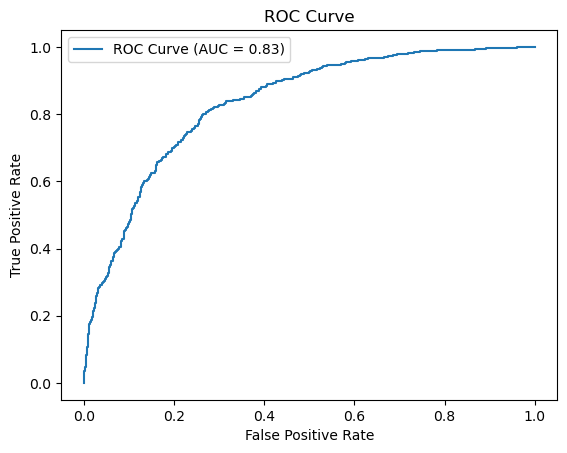

AUC Score: 0.8330783410138247


In [74]:
# CHECK THE AUC SCORE

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_probs = pipeline.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
auc_score = roc_auc_score(y_test, y_probs[:,1])

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

print("AUC Score:", auc_score)

In [75]:
# CHECK IFFECT OF DIFFERENT THRESOLD
thresold = 0.50
adjusted_ypred = (y_probs[:,1]>=thresold).astype('int')
print(accuracy_score(y_test,adjusted_ypred))
print(confusion_matrix(y_test,adjusted_ypred))

0.7741398446170921
[[1231   71]
 [ 336  164]]


In [25]:
thresold = 0.46
adjusted_ypred = (y_probs[:,1]>=thresold).astype('int')
print(accuracy_score(y_test,adjusted_ypred))
print(confusion_matrix(y_test,adjusted_ypred))

0.7785793562708102
[[1203   99]
 [ 300  200]]


# MODEL FOR CLASSIFICATION : CT2,PIPELINE

# NOW , WE SOLVE THE REGRESSION PROBLEM AND THEN COMBINE BOTH CLASSIFICATION AND REGRESSION PROBLEM FOR MAKING THE PREDICTION

In [14]:
# IMPORT LIBRIES
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [15]:
# PREPARE INPUT AND OUTPUT FOR REGRESSION
input_r = data_copy.drop(columns=['CLM_AMT','CLAIM_FLAG'])
output_r = data_copy['CLM_AMT']
# CREATE TRAINING AND TESTING DATASET 
x_train2,x_test2,y_train2,y_test2 = train_test_split(input_r,output_r,random_state=42,test_size=0.2)

In [16]:
# CREATE THE PIPELINE FOR REGRESSION
reg_pipe = Pipeline([
    ('columntransform',ct2),
    ('regressor',LinearRegression())
])

In [17]:
reg_pipe.fit(x_train2,y_train2)
y_pred = reg_pipe.predict(x_test2)

In [20]:
print(f"regressor r2score independently : {r2_score(y_test2,y_pred)}")
reg_y_pred = (y_pred * pipeline.predict_proba(x_test)[:,1])
print(f"regressor r2score dependently : {r2_score(y_test2,reg_y_pred)}")

regressor r2score independently : 0.09827509565845471


CatBoostError: There is no trained model to use predict_proba(). Use fit() to train model. Then use this method.

In [31]:
print(f"independently error : {mean_absolute_error(y_test2,y_pred)}")
print(f"dependently error : {mean_absolute_error(y_test2,reg_y_pred)}")

independently error : 1673.925135631547
dependently error : 1329.7974265585422


# NOW , WE TRY EVERY ALGORITHMS AND SELECT WHICH ONE IS BEST

In [52]:
# DEFINE FUNCTION FOR CHECK SCORE 
def score_checker(model_name,model):

   # CREATE A PIPELINE
    pipeline = Pipeline([
    ('column_transform',ct2),
    ('model training',model)
    ]) 
    # KFOLD CROSS VALIDATION
    kfold = KFold(n_splits=10,shuffle=True,random_state=1)
    score = -cross_val_score(pipeline,input_r,output_r,cv=kfold,scoring='neg_mean_squared_error') 
    
    return score.mean()

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [44]:
regression_algorithms = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "DecisionTreeRegressor": DecisionTreeRegressor(criterion='squared_error', max_depth=None),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, criterion='squared_error'),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    "AdaBoostRegressor": AdaBoostRegressor(n_estimators=50, learning_rate=1.0),
    "XGBoostRegressor": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror'),
    "LightGBMRegressor": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1),
    "CatBoostRegressor": cb.CatBoostRegressor(iterations=1000, learning_rate=0.03, depth=6, verbose=0),
    "SVR": SVR(kernel='rbf', C=1.0),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, metric='minkowski')
}

In [45]:
output = {}
for model_name,model in regression_algorithms.items():
    output[model_name] = score_checker(model_name,model)

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yogesh\anaconda3\Lib\site-packages

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1280.319522
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1265.048218


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1276.011222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1288.215810


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1264.254285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1288
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1272.146874


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1263.419164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1279.517820


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1265.468492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 8109, number of used features: 19
[LightGBM] [Info] Start training from score 1273.419904


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [47]:
pd.set_option('display.float_format', '{:.0f}'.format)
pd.DataFrame(output.items(),columns=['model','score'])

model    score
0            LinearRegression  8279618
1                       Ridge  8285865
2                       Lasso  8289299
3                  ElasticNet  8627010
4       DecisionTreeRegressor 17834688
5       RandomForestRegressor  8700264
6   GradientBoostingRegressor  8230279
7           AdaBoostRegressor 12944205
8            XGBoostRegressor      NaN
9           LightGBMRegressor  8314501
10          CatBoostRegressor  8168742
11                        SVR 10817581
12        KNeighborsRegressor  9956095

# SO THE BEST ALGORITHMS ARE CATBOOSTREGRESSOR,GRADIENTBOOSTINGREGRESSOR, AND RIDGE REGRESSION

# HYPERPARAMETER TUNNING FOR REGRESSORS

In [80]:
import optuna
# DEFINE THE OBJECTIVE FUNCTION
def objective(trial):
    # # CHOOSE THE ALGORITHM TO CHOOSE
    # regressor = trial.suggest_categorical('regressor',['CatBoostRegressor','GradientBoostingRegressor'])
    # # TUNE GRADIENTBOOSTINGCLASSIFIER PARAMETERS
    # if regressor=='GradientBoostingRegressor':
    #     # SUGGEST VALUES FOR THE HYPERPARAMETERS
    #     n_estimators = trial.suggest_int('n_estimators',100,300)
    #     learning_rate = trial.suggest_float('learning_rate',0.15,0.20)
    #     max_depth = trial.suggest_int('max_depth',2,15)
    #     min_impurity_decrease = trial.suggest_float('min_impurity_decrease',0.0,0.9)
    #     criterion = trial.suggest_categorical('criterion',['friedman_mse','squared_error'])
    #     # CREATE THE RANDOM FOREST CLASSIFIER WITH SUGGESTED PARAMETERS
    #     model = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,min_impurity_decrease=min_impurity_decrease,random_state=42)

    # # TUNE CATBOOSTCLASSIFIER
    # elif regressor == 'CatBoostRegressor':
        # SUGGEST VALUES FOR THE HYPERPARAMETERS
    iterations = trial.suggest_int('iterations',100,200)
    learning_rate = trial.suggest_float('learning_rate',0.15,0.20)
    depth = trial.suggest_int('depth',2,11)
    #l2_leaf_reg = trial.suggest_int('l2_leaf_reg',1,10)
    #eval_metric = trial.suggest_categorical('eval_metric',['Accuracy'])
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds',10,60)

        # CREATE THE CATBOOSTCLASSIFIER WITH SUGGESTED PARAMETERS
    model = CatBoostRegressor(iterations=iterations,depth=depth,learning_rate=learning_rate,
                        early_stopping_rounds=early_stopping_rounds,thread_count=-1)

        
    # PERFORM 3-FOLD CROSS-VALIDATION AND CALCULATE ACCURACY
    skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,ct2.fit_transform(input_r),output_r,cv=skfold,scoring='neg_mean_squared_error').mean()
    # RETURN ACCURACY_SCORE FOR OPTUNA TO MAXIMIZE
    return score

In [81]:
# CREATE A STUDY OBJECT AND OPTIMIZE THE OBJECTIVE  FUNCTION
from sklearn.model_selection import StratifiedKFold
study = optuna.create_study(direction='maximize') # WE AIM TO MAXIMIZE THE ACCURACY SCORE
study.optimize(objective,n_trials=50) # RUN 50 TRIALS TO FIND THE BEST PARAMETERS

[I 2025-03-07 13:43:50,422] A new study created in memory with name: no-name-dce87add-d73c-433a-8a38-3ef581b27555
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.9610694	total: 2.42ms	remaining: 452ms
1:	learn: 2958.5298125	total: 4.41ms	remaining: 410ms
2:	learn: 2949.2346036	total: 6.39ms	remaining: 394ms
3:	learn: 2939.1805611	total: 8.36ms	remaining: 385ms
4:	learn: 2926.2475040	total: 10.3ms	remaining: 378ms
5:	learn: 2917.2196855	total: 12.1ms	remaining: 368ms
6:	learn: 2907.9369881	total: 14.1ms	remaining: 365ms
7:	learn: 2899.0655154	total: 16.3ms	remaining: 367ms
8:	learn: 2893.2614577	total: 18.1ms	remaining: 361ms
9:	learn: 2888.7925348	total: 20.1ms	remaining: 359ms
10:	learn: 2883.7717914	total: 22.1ms	remaining: 356ms
11:	learn: 2878.6809379	total: 24ms	remaining: 352ms
12:	learn: 2875.4897709	total: 25.9ms	remaining: 349ms
13:	learn: 2870.4928430	total: 27.7ms	remaining: 345ms
14:	learn: 2866.1455600	total: 29.7ms	remaining: 342ms
15:	learn: 2862.4925738	total: 31.6ms	remaining: 340ms
16:	learn: 2860.4036045	total: 33.5ms	remaining: 337ms
17:	learn: 2858.6890241	total: 35.5ms	remaining: 336ms
18:	learn: 2856.013583

[I 2025-03-07 13:43:53,439] Trial 0 finished with value: -8233736.526045321 and parameters: {'iterations': 188, 'learning_rate': 0.18103620819688557, 'depth': 2, 'early_stopping_rounds': 51}. Best is trial 0 with value: -8233736.526045321.


105:	learn: 2796.8415251	total: 192ms	remaining: 149ms
106:	learn: 2796.3960678	total: 194ms	remaining: 147ms
107:	learn: 2795.3745117	total: 196ms	remaining: 145ms
108:	learn: 2794.0260907	total: 198ms	remaining: 143ms
109:	learn: 2793.0909163	total: 200ms	remaining: 142ms
110:	learn: 2792.1813366	total: 201ms	remaining: 140ms
111:	learn: 2791.8648622	total: 203ms	remaining: 138ms
112:	learn: 2790.6939096	total: 205ms	remaining: 136ms
113:	learn: 2790.1831143	total: 206ms	remaining: 134ms
114:	learn: 2789.8227284	total: 208ms	remaining: 132ms
115:	learn: 2789.1558701	total: 210ms	remaining: 130ms
116:	learn: 2788.7143686	total: 211ms	remaining: 128ms
117:	learn: 2787.7968997	total: 213ms	remaining: 126ms
118:	learn: 2787.6203577	total: 215ms	remaining: 125ms
119:	learn: 2787.1370990	total: 217ms	remaining: 123ms
120:	learn: 2786.2004728	total: 218ms	remaining: 121ms
121:	learn: 2785.3113718	total: 220ms	remaining: 119ms
122:	learn: 2784.4997186	total: 222ms	remaining: 117ms
123:	learn

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2975.0082211	total: 2.67ms	remaining: 488ms
1:	learn: 2958.0294435	total: 5.34ms	remaining: 486ms
2:	learn: 2941.3486296	total: 7.86ms	remaining: 475ms
3:	learn: 2927.0971056	total: 10.2ms	remaining: 459ms
4:	learn: 2911.8673676	total: 12.4ms	remaining: 444ms
5:	learn: 2903.4039613	total: 14.7ms	remaining: 436ms
6:	learn: 2892.3314198	total: 17.1ms	remaining: 432ms
7:	learn: 2885.5995702	total: 19.3ms	remaining: 425ms
8:	learn: 2879.0375619	total: 21.9ms	remaining: 426ms
9:	learn: 2873.0853186	total: 31.4ms	remaining: 546ms
10:	learn: 2868.6090928	total: 33.8ms	remaining: 531ms
11:	learn: 2861.4171738	total: 36.2ms	remaining: 519ms
12:	learn: 2855.3070016	total: 38.5ms	remaining: 507ms
13:	learn: 2848.6021762	total: 40.8ms	remaining: 495ms
14:	learn: 2846.0603114	total: 43.2ms	remaining: 486ms
15:	learn: 2841.7822066	total: 45.4ms	remaining: 476ms
16:	learn: 2838.0897383	total: 47.6ms	remaining: 467ms
17:	learn: 2834.8850475	total: 50.1ms	remaining: 462ms
18:	learn: 2832.2291

[I 2025-03-07 13:43:56,629] Trial 1 finished with value: -8263816.791649679 and parameters: {'iterations': 184, 'learning_rate': 0.16128337472315563, 'depth': 3, 'early_stopping_rounds': 60}. Best is trial 0 with value: -8233736.526045321.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2972.1924498	total: 3.09ms	remaining: 365ms
1:	learn: 2948.5263697	total: 5.95ms	remaining: 348ms
2:	learn: 2929.4338210	total: 8.75ms	remaining: 338ms
3:	learn: 2910.4512005	total: 11.4ms	remaining: 328ms
4:	learn: 2899.2039879	total: 14.1ms	remaining: 322ms
5:	learn: 2890.3709947	total: 16.8ms	remaining: 317ms
6:	learn: 2876.9630533	total: 19.6ms	remaining: 313ms
7:	learn: 2869.8970233	total: 22.3ms	remaining: 309ms
8:	learn: 2862.0130288	total: 24.9ms	remaining: 304ms
9:	learn: 2855.8214776	total: 27.9ms	remaining: 304ms
10:	learn: 2848.9005315	total: 30.4ms	remaining: 299ms
11:	learn: 2841.5138180	total: 33.2ms	remaining: 296ms
12:	learn: 2835.3231392	total: 35.9ms	remaining: 292ms
13:	learn: 2829.9792262	total: 38.6ms	remaining: 290ms
14:	learn: 2825.5544976	total: 41.3ms	remaining: 287ms
15:	learn: 2822.8324840	total: 44.2ms	remaining: 285ms
16:	learn: 2820.1646015	total: 46.9ms	remaining: 282ms
17:	learn: 2815.6824372	total: 49.6ms	remaining: 278ms
18:	learn: 2811.8242

[I 2025-03-07 13:43:59,312] Trial 2 finished with value: -8229792.404903082 and parameters: {'iterations': 119, 'learning_rate': 0.1646084787869246, 'depth': 4, 'early_stopping_rounds': 48}. Best is trial 2 with value: -8229792.404903082.


72:	learn: 2706.6275539	total: 207ms	remaining: 131ms
73:	learn: 2705.2473252	total: 210ms	remaining: 128ms
74:	learn: 2701.6464650	total: 212ms	remaining: 125ms
75:	learn: 2698.9488570	total: 215ms	remaining: 121ms
76:	learn: 2695.1699850	total: 217ms	remaining: 118ms
77:	learn: 2693.5236866	total: 220ms	remaining: 116ms
78:	learn: 2690.1556917	total: 223ms	remaining: 113ms
79:	learn: 2688.7114309	total: 225ms	remaining: 110ms
80:	learn: 2686.9594028	total: 228ms	remaining: 107ms
81:	learn: 2685.7735129	total: 230ms	remaining: 104ms
82:	learn: 2682.9451746	total: 233ms	remaining: 101ms
83:	learn: 2680.6657445	total: 236ms	remaining: 98.1ms
84:	learn: 2678.9782855	total: 238ms	remaining: 95.3ms
85:	learn: 2677.8364569	total: 241ms	remaining: 92.4ms
86:	learn: 2675.3925887	total: 243ms	remaining: 89.5ms
87:	learn: 2672.8016010	total: 246ms	remaining: 86.6ms
88:	learn: 2671.6821130	total: 248ms	remaining: 83.7ms
89:	learn: 2669.2153745	total: 251ms	remaining: 80.8ms
90:	learn: 2667.29061

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2950.0802081	total: 7.35ms	remaining: 956ms
1:	learn: 2908.1817830	total: 13ms	remaining: 841ms
2:	learn: 2880.0538518	total: 18.8ms	remaining: 801ms
3:	learn: 2856.8858132	total: 25.8ms	remaining: 818ms
4:	learn: 2841.1719630	total: 31.3ms	remaining: 790ms
5:	learn: 2817.7428210	total: 38.6ms	remaining: 805ms
6:	learn: 2801.7036936	total: 44.2ms	remaining: 782ms
7:	learn: 2789.3808803	total: 49.4ms	remaining: 760ms
8:	learn: 2773.5320122	total: 54.8ms	remaining: 743ms
9:	learn: 2757.1309657	total: 60.2ms	remaining: 728ms
10:	learn: 2743.4543418	total: 65.3ms	remaining: 713ms
11:	learn: 2731.3360365	total: 71.5ms	remaining: 709ms
12:	learn: 2722.2398083	total: 76.9ms	remaining: 698ms
13:	learn: 2712.5405045	total: 82.4ms	remaining: 689ms
14:	learn: 2706.2988708	total: 87.6ms	remaining: 678ms
15:	learn: 2698.3585197	total: 92.8ms	remaining: 667ms
16:	learn: 2687.4130015	total: 98.3ms	remaining: 659ms
17:	learn: 2675.9638377	total: 104ms	remaining: 652ms
18:	learn: 2665.3012095

[I 2025-03-07 13:44:03,734] Trial 3 finished with value: -8499104.072770508 and parameters: {'iterations': 131, 'learning_rate': 0.19495400298509102, 'depth': 7, 'early_stopping_rounds': 46}. Best is trial 2 with value: -8229792.404903082.


122:	learn: 2125.4453104	total: 622ms	remaining: 40.5ms
123:	learn: 2119.7440630	total: 627ms	remaining: 35.4ms
124:	learn: 2117.0735827	total: 632ms	remaining: 30.3ms
125:	learn: 2111.5712934	total: 638ms	remaining: 25.3ms
126:	learn: 2110.0460224	total: 642ms	remaining: 20.2ms
127:	learn: 2100.9850746	total: 647ms	remaining: 15.2ms
128:	learn: 2094.9874340	total: 653ms	remaining: 10.1ms
129:	learn: 2093.7269760	total: 658ms	remaining: 5.06ms
130:	learn: 2089.1897161	total: 663ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2948.1444463	total: 14.7ms	remaining: 1.47s
1:	learn: 2906.9586062	total: 27.9ms	remaining: 1.38s
2:	learn: 2873.8890820	total: 41.4ms	remaining: 1.35s
3:	learn: 2846.5784689	total: 54.6ms	remaining: 1.32s
4:	learn: 2816.8447758	total: 68ms	remaining: 1.3s
5:	learn: 2791.2979181	total: 81.3ms	remaining: 1.29s
6:	learn: 2771.9030779	total: 94ms	remaining: 1.26s
7:	learn: 2755.8572854	total: 107ms	remaining: 1.24s
8:	learn: 2735.6061057	total: 119ms	remaining: 1.22s
9:	learn: 2712.7122395	total: 131ms	remaining: 1.19s
10:	learn: 2696.9357873	total: 143ms	remaining: 1.17s
11:	learn: 2684.5435220	total: 155ms	remaining: 1.15s
12:	learn: 2668.9121893	total: 167ms	remaining: 1.13s
13:	learn: 2659.9763787	total: 178ms	remaining: 1.11s
14:	learn: 2644.6206681	total: 190ms	remaining: 1.09s
15:	learn: 2632.4300988	total: 201ms	remaining: 1.07s
16:	learn: 2617.2966343	total: 213ms	remaining: 1.05s
17:	learn: 2605.4180815	total: 225ms	remaining: 1.04s
18:	learn: 2594.3457101	total: 238ms

[I 2025-03-07 13:44:11,055] Trial 4 finished with value: -8414782.160235329 and parameters: {'iterations': 101, 'learning_rate': 0.15874685930427473, 'depth': 9, 'early_stopping_rounds': 43}. Best is trial 2 with value: -8229792.404903082.


90:	learn: 2058.5183792	total: 1.09s	remaining: 120ms
91:	learn: 2052.1703142	total: 1.11s	remaining: 108ms
92:	learn: 2039.2159224	total: 1.12s	remaining: 96.2ms
93:	learn: 2033.9080894	total: 1.13s	remaining: 84.3ms
94:	learn: 2028.1706412	total: 1.14s	remaining: 72.3ms
95:	learn: 2022.8647205	total: 1.16s	remaining: 60.2ms
96:	learn: 2016.6653425	total: 1.17s	remaining: 48.2ms
97:	learn: 2011.9911891	total: 1.18s	remaining: 36.1ms
98:	learn: 2007.4793182	total: 1.19s	remaining: 24.1ms
99:	learn: 2003.1001358	total: 1.21s	remaining: 12.1ms
100:	learn: 2000.4120119	total: 1.22s	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2937.1740616	total: 55.3ms	remaining: 7.08s
1:	learn: 2887.2109841	total: 94.3ms	remaining: 5.99s
2:	learn: 2839.6244480	total: 129ms	remaining: 5.42s
3:	learn: 2797.2174467	total: 163ms	remaining: 5.11s
4:	learn: 2768.6644531	total: 197ms	remaining: 4.87s
5:	learn: 2738.9070841	total: 231ms	remaining: 4.73s
6:	learn: 2712.6894353	total: 263ms	remaining: 4.59s
7:	learn: 2692.7073489	total: 319ms	remaining: 4.83s
8:	learn: 2671.9532272	total: 370ms	remaining: 4.94s
9:	learn: 2648.5911131	total: 422ms	remaining: 5.02s
10:	learn: 2633.3471428	total: 473ms	remaining: 5.08s
11:	learn: 2623.3258352	total: 522ms	remaining: 5.09s
12:	learn: 2604.5014090	total: 578ms	remaining: 5.16s
13:	learn: 2583.7641126	total: 629ms	remaining: 5.17s
14:	learn: 2566.1351376	total: 678ms	remaining: 5.15s
15:	learn: 2554.1524631	total: 728ms	remaining: 5.14s
16:	learn: 2539.5704691	total: 779ms	remaining: 5.13s
17:	learn: 2522.8673306	total: 837ms	remaining: 5.16s
18:	learn: 2504.5598026	total: 888ms

[I 2025-03-07 13:44:45,103] Trial 5 finished with value: -8612806.773843337 and parameters: {'iterations': 129, 'learning_rate': 0.16759587076046326, 'depth': 10, 'early_stopping_rounds': 58}. Best is trial 2 with value: -8229792.404903082.


126:	learn: 1559.6492927	total: 6.54s	remaining: 103ms
127:	learn: 1550.9691371	total: 6.59s	remaining: 51.5ms
128:	learn: 1540.4557590	total: 6.64s	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2946.9664709	total: 13.8ms	remaining: 2.44s
1:	learn: 2905.0130456	total: 26.1ms	remaining: 2.3s
2:	learn: 2871.4836022	total: 38.2ms	remaining: 2.23s
3:	learn: 2843.7889667	total: 50.1ms	remaining: 2.18s
4:	learn: 2813.7177635	total: 62.1ms	remaining: 2.15s
5:	learn: 2787.9368760	total: 74.1ms	remaining: 2.12s
6:	learn: 2768.2819001	total: 86.3ms	remaining: 2.11s
7:	learn: 2752.0447737	total: 98.2ms	remaining: 2.09s
8:	learn: 2730.7623287	total: 110ms	remaining: 2.06s
9:	learn: 2707.6733275	total: 121ms	remaining: 2.03s
10:	learn: 2691.7489005	total: 131ms	remaining: 1.99s
11:	learn: 2680.5781017	total: 142ms	remaining: 1.96s
12:	learn: 2664.7460025	total: 152ms	remaining: 1.93s
13:	learn: 2656.9944703	total: 162ms	remaining: 1.9s
14:	learn: 2640.7528854	total: 172ms	remaining: 1.87s
15:	learn: 2630.1642557	total: 183ms	remaining: 1.85s
16:	learn: 2609.2060075	total: 194ms	remaining: 1.84s
17:	learn: 2594.1426950	total: 205ms	remaining: 1.82s
18:	learn: 2581.5259645	total: 2

[I 2025-03-07 13:44:56,788] Trial 6 finished with value: -8532443.917746728 and parameters: {'iterations': 178, 'learning_rate': 0.16260984300056866, 'depth': 9, 'early_stopping_rounds': 11}. Best is trial 2 with value: -8229792.404903082.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2949.8670388	total: 14.1ms	remaining: 1.45s
1:	learn: 2909.8174114	total: 26.8ms	remaining: 1.37s
2:	learn: 2877.4410196	total: 38.8ms	remaining: 1.31s
3:	learn: 2850.7056175	total: 50.9ms	remaining: 1.27s
4:	learn: 2821.4827016	total: 63.3ms	remaining: 1.25s
5:	learn: 2799.9234343	total: 75.6ms	remaining: 1.24s
6:	learn: 2780.7269100	total: 87.8ms	remaining: 1.22s
7:	learn: 2764.8644204	total: 99.3ms	remaining: 1.19s
8:	learn: 2744.1344547	total: 110ms	remaining: 1.16s
9:	learn: 2721.6536733	total: 122ms	remaining: 1.15s
10:	learn: 2705.8666839	total: 133ms	remaining: 1.12s
11:	learn: 2693.6517120	total: 144ms	remaining: 1.1s
12:	learn: 2677.8007256	total: 155ms	remaining: 1.09s
13:	learn: 2662.4701629	total: 166ms	remaining: 1.07s
14:	learn: 2647.0960274	total: 177ms	remaining: 1.05s
15:	learn: 2638.4495569	total: 188ms	remaining: 1.03s
16:	learn: 2624.4382308	total: 199ms	remaining: 1.02s
17:	learn: 2612.4632778	total: 210ms	remaining: 1s
18:	learn: 2601.9822524	total: 220

[I 2025-03-07 13:45:04,062] Trial 7 finished with value: -8385812.172018888 and parameters: {'iterations': 104, 'learning_rate': 0.1531210087960978, 'depth': 9, 'early_stopping_rounds': 28}. Best is trial 2 with value: -8229792.404903082.


92:	learn: 2068.8592126	total: 1.09s	remaining: 129ms
93:	learn: 2060.4583724	total: 1.1s	remaining: 117ms
94:	learn: 2051.9192865	total: 1.11s	remaining: 105ms
95:	learn: 2041.0559849	total: 1.12s	remaining: 93.7ms
96:	learn: 2035.0756407	total: 1.14s	remaining: 82.1ms
97:	learn: 2029.0405154	total: 1.15s	remaining: 70.4ms
98:	learn: 2025.9448221	total: 1.16s	remaining: 58.7ms
99:	learn: 2022.3642322	total: 1.17s	remaining: 47ms
100:	learn: 2017.8037363	total: 1.19s	remaining: 35.2ms
101:	learn: 2013.3760217	total: 1.2s	remaining: 23.5ms
102:	learn: 2008.3959391	total: 1.21s	remaining: 11.8ms
103:	learn: 2004.2465574	total: 1.22s	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2959.3722212	total: 5.2ms	remaining: 785ms
1:	learn: 2926.8544997	total: 9.56ms	remaining: 717ms
2:	learn: 2902.3990372	total: 13.6ms	remaining: 678ms
3:	learn: 2881.6760294	total: 18ms	remaining: 665ms
4:	learn: 2865.4803720	total: 22.5ms	remaining: 662ms
5:	learn: 2848.5819744	total: 26.7ms	remaining: 649ms
6:	learn: 2837.9747133	total: 31.3ms	remaining: 648ms
7:	learn: 2825.3773153	total: 35.5ms	remaining: 639ms
8:	learn: 2816.4214348	total: 39.6ms	remaining: 629ms
9:	learn: 2809.3568983	total: 43.9ms	remaining: 623ms
10:	learn: 2802.4356699	total: 48.3ms	remaining: 619ms
11:	learn: 2793.4324539	total: 52.4ms	remaining: 612ms
12:	learn: 2785.1810727	total: 56.5ms	remaining: 604ms
13:	learn: 2778.5688620	total: 60.3ms	remaining: 594ms
14:	learn: 2771.8885219	total: 64.6ms	remaining: 590ms
15:	learn: 2764.6080532	total: 68.6ms	remaining: 583ms
16:	learn: 2758.3499408	total: 72.6ms	remaining: 577ms
17:	learn: 2755.1833111	total: 76.4ms	remaining: 569ms
18:	learn: 2748.1317087

[I 2025-03-07 13:45:08,118] Trial 8 finished with value: -8348788.957161829 and parameters: {'iterations': 152, 'learning_rate': 0.16426769664403826, 'depth': 6, 'early_stopping_rounds': 51}. Best is trial 2 with value: -8229792.404903082.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2920.9371909	total: 128ms	remaining: 15.6s
1:	learn: 2855.8946948	total: 251ms	remaining: 15.2s
2:	learn: 2794.4655766	total: 380ms	remaining: 15.2s
3:	learn: 2747.8767755	total: 504ms	remaining: 15s
4:	learn: 2702.3240398	total: 629ms	remaining: 14.8s
5:	learn: 2666.7712460	total: 756ms	remaining: 14.7s
6:	learn: 2630.5187977	total: 883ms	remaining: 14.6s
7:	learn: 2612.9519462	total: 1s	remaining: 14.4s
8:	learn: 2578.7147444	total: 1.13s	remaining: 14.3s
9:	learn: 2553.1562155	total: 1.25s	remaining: 14.2s
10:	learn: 2526.5268362	total: 1.38s	remaining: 14.1s
11:	learn: 2508.8802948	total: 1.51s	remaining: 14s
12:	learn: 2487.8680337	total: 1.64s	remaining: 13.8s
13:	learn: 2459.5615268	total: 1.76s	remaining: 13.7s
14:	learn: 2444.1416180	total: 1.89s	remaining: 13.6s
15:	learn: 2419.1527371	total: 2.01s	remaining: 13.4s
16:	learn: 2388.8941854	total: 2.13s	remaining: 13.3s
17:	learn: 2372.3995552	total: 2.26s	remaining: 13.2s
18:	learn: 2345.4930787	total: 2.38s	remainin

[I 2025-03-07 13:46:24,002] Trial 9 finished with value: -8693474.370563274 and parameters: {'iterations': 123, 'learning_rate': 0.18418962528493157, 'depth': 11, 'early_stopping_rounds': 34}. Best is trial 2 with value: -8229792.404903082.


122:	learn: 1285.3774490	total: 14.6s	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2970.9655799	total: 3.83ms	remaining: 594ms
1:	learn: 2946.4760894	total: 6.66ms	remaining: 513ms
2:	learn: 2926.9974279	total: 9.62ms	remaining: 491ms
3:	learn: 2907.6514184	total: 12.4ms	remaining: 471ms
4:	learn: 2894.3641092	total: 15.5ms	remaining: 469ms
5:	learn: 2885.1502653	total: 18.3ms	remaining: 458ms
6:	learn: 2871.9356845	total: 21.3ms	remaining: 453ms
7:	learn: 2866.4851245	total: 24.1ms	remaining: 445ms
8:	learn: 2857.6405330	total: 26.9ms	remaining: 439ms
9:	learn: 2851.5880297	total: 29.8ms	remaining: 435ms
10:	learn: 2845.5385248	total: 32.7ms	remaining: 432ms
11:	learn: 2840.6992376	total: 35.4ms	remaining: 425ms
12:	learn: 2833.0058299	total: 38.3ms	remaining: 421ms
13:	learn: 2828.0245731	total: 41.6ms	remaining: 422ms
14:	learn: 2824.5805369	total: 44.5ms	remaining: 418ms
15:	learn: 2820.7700860	total: 47.4ms	remaining: 415ms
16:	learn: 2817.4190557	total: 50.6ms	remaining: 414ms
17:	learn: 2813.2585044	total: 53.4ms	remaining: 409ms
18:	learn: 2809.6454

[I 2025-03-07 13:46:27,362] Trial 10 finished with value: -8310777.325378114 and parameters: {'iterations': 156, 'learning_rate': 0.172606870718447, 'depth': 4, 'early_stopping_rounds': 19}. Best is trial 2 with value: -8229792.404903082.


116:	learn: 2607.0860158	total: 396ms	remaining: 132ms
117:	learn: 2606.1124902	total: 399ms	remaining: 128ms
118:	learn: 2604.9998850	total: 402ms	remaining: 125ms
119:	learn: 2602.4105942	total: 405ms	remaining: 121ms
120:	learn: 2600.2794469	total: 408ms	remaining: 118ms
121:	learn: 2598.0696068	total: 412ms	remaining: 115ms
122:	learn: 2597.2931332	total: 415ms	remaining: 111ms
123:	learn: 2594.9541693	total: 418ms	remaining: 108ms
124:	learn: 2592.7179936	total: 421ms	remaining: 104ms
125:	learn: 2591.2356060	total: 424ms	remaining: 101ms
126:	learn: 2589.8250682	total: 427ms	remaining: 97.6ms
127:	learn: 2588.5717542	total: 431ms	remaining: 94.3ms
128:	learn: 2585.6128142	total: 434ms	remaining: 90.8ms
129:	learn: 2584.0372949	total: 436ms	remaining: 87.3ms
130:	learn: 2581.3917955	total: 439ms	remaining: 83.8ms
131:	learn: 2579.4238510	total: 442ms	remaining: 80.3ms
132:	learn: 2578.2691844	total: 444ms	remaining: 76.9ms
133:	learn: 2574.6414435	total: 448ms	remaining: 73.6ms
13

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.9531080	total: 2.22ms	remaining: 437ms
1:	learn: 2958.5172693	total: 4.2ms	remaining: 412ms
2:	learn: 2949.2211045	total: 6.31ms	remaining: 410ms
3:	learn: 2939.1668078	total: 8.25ms	remaining: 400ms
4:	learn: 2926.2318159	total: 10.1ms	remaining: 389ms
5:	learn: 2917.2018061	total: 12.2ms	remaining: 389ms
6:	learn: 2907.9183673	total: 14ms	remaining: 382ms
7:	learn: 2899.0464053	total: 15.9ms	remaining: 378ms
8:	learn: 2893.2420717	total: 17.8ms	remaining: 374ms
9:	learn: 2888.7721508	total: 19.6ms	remaining: 369ms
10:	learn: 2883.7519756	total: 21.5ms	remaining: 365ms
11:	learn: 2878.6615882	total: 23.3ms	remaining: 361ms
12:	learn: 2875.4698465	total: 25.1ms	remaining: 357ms
13:	learn: 2870.4739605	total: 26.9ms	remaining: 353ms
14:	learn: 2866.1272925	total: 28.7ms	remaining: 350ms
15:	learn: 2862.4737174	total: 30.5ms	remaining: 347ms
16:	learn: 2860.3858353	total: 32.4ms	remaining: 345ms
17:	learn: 2858.6718938	total: 34.1ms	remaining: 341ms
18:	learn: 2855.9968975

[I 2025-03-07 13:46:30,305] Trial 11 finished with value: -8229652.336655666 and parameters: {'iterations': 198, 'learning_rate': 0.18110567114173381, 'depth': 2, 'early_stopping_rounds': 42}. Best is trial 11 with value: -8229652.336655666.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2961.6172870	total: 3.75ms	remaining: 630ms
1:	learn: 2932.6489275	total: 7.01ms	remaining: 585ms
2:	learn: 2909.4527600	total: 10.3ms	remaining: 570ms
3:	learn: 2896.0245769	total: 13.9ms	remaining: 575ms
4:	learn: 2876.3288395	total: 17.2ms	remaining: 565ms
5:	learn: 2862.3004690	total: 20.5ms	remaining: 557ms
6:	learn: 2848.2580098	total: 24.1ms	remaining: 557ms
7:	learn: 2837.3335826	total: 27.2ms	remaining: 548ms
8:	learn: 2828.5574873	total: 30.8ms	remaining: 548ms
9:	learn: 2817.6191333	total: 34.2ms	remaining: 544ms
10:	learn: 2809.9662677	total: 37.6ms	remaining: 540ms
11:	learn: 2802.6120518	total: 40.9ms	remaining: 535ms
12:	learn: 2793.1420100	total: 44.6ms	remaining: 535ms
13:	learn: 2788.9644779	total: 47.8ms	remaining: 529ms
14:	learn: 2782.7377151	total: 51ms	remaining: 523ms
15:	learn: 2777.8513669	total: 54.7ms	remaining: 523ms
16:	learn: 2774.7674376	total: 58.3ms	remaining: 521ms
17:	learn: 2770.2956674	total: 61.7ms	remaining: 518ms
18:	learn: 2763.101342

[I 2025-03-07 13:46:34,162] Trial 12 finished with value: -8379644.777995056 and parameters: {'iterations': 169, 'learning_rate': 0.18136597125602016, 'depth': 5, 'early_stopping_rounds': 39}. Best is trial 11 with value: -8229652.336655666.


134:	learn: 2429.7339260	total: 422ms	remaining: 106ms
135:	learn: 2428.7593699	total: 425ms	remaining: 103ms
136:	learn: 2426.8247953	total: 428ms	remaining: 100ms
137:	learn: 2423.9141943	total: 431ms	remaining: 96.8ms
138:	learn: 2419.8877191	total: 434ms	remaining: 93.7ms
139:	learn: 2417.7728355	total: 437ms	remaining: 90.6ms
140:	learn: 2415.7192213	total: 441ms	remaining: 87.5ms
141:	learn: 2414.4819623	total: 444ms	remaining: 84.4ms
142:	learn: 2411.6265133	total: 447ms	remaining: 81.3ms
143:	learn: 2409.6977804	total: 450ms	remaining: 78.1ms
144:	learn: 2406.9125355	total: 453ms	remaining: 75ms
145:	learn: 2404.1213803	total: 456ms	remaining: 71.9ms
146:	learn: 2402.4461162	total: 459ms	remaining: 68.7ms
147:	learn: 2400.2205588	total: 462ms	remaining: 65.6ms
148:	learn: 2399.5792238	total: 465ms	remaining: 62.4ms
149:	learn: 2396.8199308	total: 468ms	remaining: 59.3ms
150:	learn: 2394.1488164	total: 472ms	remaining: 56.2ms
151:	learn: 2393.1784453	total: 475ms	remaining: 53.1

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2975.6523246	total: 2.16ms	remaining: 303ms
1:	learn: 2956.4848050	total: 4.19ms	remaining: 291ms
2:	learn: 2947.0484606	total: 6.14ms	remaining: 283ms
3:	learn: 2936.9716485	total: 8.05ms	remaining: 276ms
4:	learn: 2923.7369421	total: 10ms	remaining: 272ms
5:	learn: 2914.3557162	total: 12ms	remaining: 269ms
6:	learn: 2904.9678538	total: 13.9ms	remaining: 265ms
7:	learn: 2896.0285535	total: 16.2ms	remaining: 269ms
8:	learn: 2890.1909709	total: 18.2ms	remaining: 267ms
9:	learn: 2885.5626466	total: 20.2ms	remaining: 265ms
10:	learn: 2880.6422654	total: 22.2ms	remaining: 262ms
11:	learn: 2875.6379820	total: 24.3ms	remaining: 261ms
12:	learn: 2872.3554021	total: 26.2ms	remaining: 258ms
13:	learn: 2867.5363616	total: 28ms	remaining: 254ms
14:	learn: 2863.2976568	total: 30ms	remaining: 252ms
15:	learn: 2859.5495040	total: 32.1ms	remaining: 251ms
16:	learn: 2857.6393194	total: 34.1ms	remaining: 249ms
17:	learn: 2856.0304193	total: 36.2ms	remaining: 247ms
18:	learn: 2853.3737199	tota

[I 2025-03-07 13:46:36,581] Trial 13 finished with value: -8219745.479947108 and parameters: {'iterations': 141, 'learning_rate': 0.19253354908023979, 'depth': 2, 'early_stopping_rounds': 33}. Best is trial 13 with value: -8219745.479947108.


110:	learn: 2785.7147372	total: 204ms	remaining: 55ms
111:	learn: 2785.2990146	total: 206ms	remaining: 53.3ms
112:	learn: 2784.9877585	total: 208ms	remaining: 51.5ms
113:	learn: 2784.1962177	total: 209ms	remaining: 49.6ms
114:	learn: 2783.5271719	total: 211ms	remaining: 47.8ms
115:	learn: 2783.0468694	total: 213ms	remaining: 45.9ms
116:	learn: 2782.1399181	total: 215ms	remaining: 44.1ms
117:	learn: 2781.6124919	total: 217ms	remaining: 42.3ms
118:	learn: 2780.8365115	total: 219ms	remaining: 40.5ms
119:	learn: 2779.9896952	total: 221ms	remaining: 38.7ms
120:	learn: 2779.6181046	total: 223ms	remaining: 36.9ms
121:	learn: 2779.2602669	total: 225ms	remaining: 35ms
122:	learn: 2778.5793543	total: 227ms	remaining: 33.2ms
123:	learn: 2777.6965198	total: 229ms	remaining: 31.4ms
124:	learn: 2776.9809515	total: 231ms	remaining: 29.5ms
125:	learn: 2776.6884427	total: 232ms	remaining: 27.7ms
126:	learn: 2776.1945992	total: 234ms	remaining: 25.8ms
127:	learn: 2775.7773235	total: 236ms	remaining: 24m

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2974.8409969	total: 2ms	remaining: 397ms
1:	learn: 2955.2341514	total: 3.97ms	remaining: 391ms
2:	learn: 2945.7260177	total: 6.84ms	remaining: 447ms
3:	learn: 2935.6534891	total: 8.85ms	remaining: 432ms
4:	learn: 2922.2477928	total: 10.6ms	remaining: 412ms
5:	learn: 2912.6542029	total: 12.6ms	remaining: 404ms
6:	learn: 2903.2175575	total: 14.5ms	remaining: 399ms
7:	learn: 2894.2482082	total: 16.4ms	remaining: 391ms
8:	learn: 2889.1505291	total: 18.3ms	remaining: 387ms
9:	learn: 2884.1579067	total: 20.4ms	remaining: 386ms
10:	learn: 2878.1872861	total: 22.5ms	remaining: 384ms
11:	learn: 2873.1350442	total: 24.4ms	remaining: 380ms
12:	learn: 2869.7380873	total: 26.3ms	remaining: 376ms
13:	learn: 2865.9940465	total: 28.3ms	remaining: 374ms
14:	learn: 2862.7651902	total: 30.2ms	remaining: 370ms
15:	learn: 2859.4327240	total: 31.9ms	remaining: 365ms
16:	learn: 2857.4970590	total: 33.8ms	remaining: 362ms
17:	learn: 2855.1653239	total: 36ms	remaining: 362ms
18:	learn: 2852.4269366	t

[I 2025-03-07 13:46:39,581] Trial 14 finished with value: -8254707.451431751 and parameters: {'iterations': 199, 'learning_rate': 0.19974125342442417, 'depth': 2, 'early_stopping_rounds': 30}. Best is trial 13 with value: -8219745.479947108.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2975.9713739	total: 2.37ms	remaining: 330ms
1:	learn: 2956.9802027	total: 4.91ms	remaining: 339ms
2:	learn: 2947.5753366	total: 7.06ms	remaining: 322ms
3:	learn: 2937.5006169	total: 9.4ms	remaining: 320ms
4:	learn: 2924.3364529	total: 11.4ms	remaining: 308ms
5:	learn: 2915.0401337	total: 13.5ms	remaining: 300ms
6:	learn: 2905.6748500	total: 15.2ms	remaining: 289ms
7:	learn: 2896.7498110	total: 17.3ms	remaining: 286ms
8:	learn: 2890.9182345	total: 19ms	remaining: 277ms
9:	learn: 2886.3279138	total: 20.9ms	remaining: 272ms
10:	learn: 2881.3818402	total: 22.8ms	remaining: 267ms
11:	learn: 2876.3546667	total: 24.6ms	remaining: 262ms
12:	learn: 2873.0938176	total: 26.5ms	remaining: 259ms
13:	learn: 2868.2302657	total: 28.3ms	remaining: 254ms
14:	learn: 2863.9637633	total: 30.2ms	remaining: 252ms
15:	learn: 2860.2385342	total: 32ms	remaining: 248ms
16:	learn: 2858.2848162	total: 34ms	remaining: 246ms
17:	learn: 2856.6500804	total: 35.8ms	remaining: 243ms
18:	learn: 2853.9751104	tot

[I 2025-03-07 13:46:41,949] Trial 15 finished with value: -8239096.193890305 and parameters: {'iterations': 140, 'learning_rate': 0.1897161618031156, 'depth': 2, 'early_stopping_rounds': 24}. Best is trial 13 with value: -8219745.479947108.


108:	learn: 2785.7989347	total: 199ms	remaining: 56.6ms
109:	learn: 2785.0403179	total: 201ms	remaining: 54.8ms
110:	learn: 2784.2493833	total: 202ms	remaining: 52.9ms
111:	learn: 2783.9331485	total: 204ms	remaining: 51ms
112:	learn: 2783.7591906	total: 206ms	remaining: 49.2ms
113:	learn: 2783.2876209	total: 208ms	remaining: 47.4ms
114:	learn: 2782.8896635	total: 209ms	remaining: 45.5ms
115:	learn: 2782.0021110	total: 211ms	remaining: 43.6ms
116:	learn: 2781.4130893	total: 213ms	remaining: 41.8ms
117:	learn: 2780.7809387	total: 214ms	remaining: 40ms
118:	learn: 2780.1026455	total: 216ms	remaining: 38.1ms
119:	learn: 2779.6880040	total: 218ms	remaining: 36.3ms
120:	learn: 2778.7948057	total: 220ms	remaining: 34.5ms
121:	learn: 2778.2860376	total: 222ms	remaining: 32.7ms
122:	learn: 2777.8686328	total: 224ms	remaining: 30.9ms
123:	learn: 2777.2382648	total: 225ms	remaining: 29.1ms
124:	learn: 2776.6541662	total: 227ms	remaining: 27.3ms
125:	learn: 2776.4106547	total: 229ms	remaining: 25.

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2951.3725209	total: 5.58ms	remaining: 864ms
1:	learn: 2910.2753328	total: 11ms	remaining: 844ms
2:	learn: 2882.4019529	total: 16.8ms	remaining: 855ms
3:	learn: 2859.5542654	total: 22.9ms	remaining: 871ms
4:	learn: 2843.9347626	total: 28.3ms	remaining: 856ms
5:	learn: 2820.8444416	total: 33.6ms	remaining: 840ms
6:	learn: 2803.2988405	total: 39.1ms	remaining: 831ms
7:	learn: 2787.2105955	total: 44.2ms	remaining: 818ms
8:	learn: 2775.0100743	total: 49.6ms	remaining: 810ms
9:	learn: 2762.5234004	total: 55.5ms	remaining: 811ms
10:	learn: 2750.1574096	total: 61ms	remaining: 804ms
11:	learn: 2740.3159900	total: 66.2ms	remaining: 794ms
12:	learn: 2731.7308258	total: 71.2ms	remaining: 784ms
13:	learn: 2721.8434987	total: 76.4ms	remaining: 775ms
14:	learn: 2710.8918678	total: 81.5ms	remaining: 766ms
15:	learn: 2702.8962151	total: 87.8ms	remaining: 768ms
16:	learn: 2692.1424246	total: 92.9ms	remaining: 760ms
17:	learn: 2682.3803063	total: 98.2ms	remaining: 753ms
18:	learn: 2673.2937802	

[I 2025-03-07 13:46:47,151] Trial 16 finished with value: -8502301.829107324 and parameters: {'iterations': 156, 'learning_rate': 0.18938116848392286, 'depth': 7, 'early_stopping_rounds': 37}. Best is trial 13 with value: -8219745.479947108.


125:	learn: 2132.8949874	total: 642ms	remaining: 153ms
126:	learn: 2130.4179852	total: 647ms	remaining: 148ms
127:	learn: 2123.9242676	total: 652ms	remaining: 143ms
128:	learn: 2120.8381476	total: 657ms	remaining: 138ms
129:	learn: 2116.7653503	total: 662ms	remaining: 132ms
130:	learn: 2111.1523121	total: 667ms	remaining: 127ms
131:	learn: 2108.0023836	total: 672ms	remaining: 122ms
132:	learn: 2105.2488285	total: 677ms	remaining: 117ms
133:	learn: 2104.3470799	total: 682ms	remaining: 112ms
134:	learn: 2102.0091432	total: 687ms	remaining: 107ms
135:	learn: 2101.6626245	total: 692ms	remaining: 102ms
136:	learn: 2099.9490581	total: 697ms	remaining: 96.7ms
137:	learn: 2096.4799695	total: 702ms	remaining: 91.6ms
138:	learn: 2092.4013599	total: 707ms	remaining: 86.5ms
139:	learn: 2088.4312378	total: 712ms	remaining: 81.4ms
140:	learn: 2084.0675424	total: 717ms	remaining: 76.3ms
141:	learn: 2078.7702550	total: 722ms	remaining: 71.2ms
142:	learn: 2076.7625795	total: 727ms	remaining: 66ms
143:	

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2970.6434951	total: 3.58ms	remaining: 599ms
1:	learn: 2945.9410775	total: 6.42ms	remaining: 533ms
2:	learn: 2926.3667300	total: 9.33ms	remaining: 513ms
3:	learn: 2906.9308602	total: 12.1ms	remaining: 498ms
4:	learn: 2893.6096104	total: 15.1ms	remaining: 492ms
5:	learn: 2884.3762814	total: 18.2ms	remaining: 491ms
6:	learn: 2871.1758786	total: 21.8ms	remaining: 502ms
7:	learn: 2865.7583969	total: 24.8ms	remaining: 496ms
8:	learn: 2856.9386901	total: 27.6ms	remaining: 487ms
9:	learn: 2850.9143984	total: 30.4ms	remaining: 481ms
10:	learn: 2844.8374670	total: 33.2ms	remaining: 474ms
11:	learn: 2839.9912120	total: 36.1ms	remaining: 469ms
12:	learn: 2832.2660134	total: 38.9ms	remaining: 464ms
13:	learn: 2826.8162086	total: 42ms	remaining: 461ms
14:	learn: 2823.1929157	total: 44.9ms	remaining: 458ms
15:	learn: 2819.4283774	total: 47.6ms	remaining: 452ms
16:	learn: 2816.1683057	total: 50.3ms	remaining: 447ms
17:	learn: 2811.9333480	total: 53.1ms	remaining: 442ms
18:	learn: 2809.816541

[I 2025-03-07 13:46:50,584] Trial 17 finished with value: -8348686.815976565 and parameters: {'iterations': 168, 'learning_rate': 0.17471885460931333, 'depth': 4, 'early_stopping_rounds': 41}. Best is trial 13 with value: -8219745.479947108.


148:	learn: 2543.6698579	total: 400ms	remaining: 51ms
149:	learn: 2543.2632944	total: 403ms	remaining: 48.4ms
150:	learn: 2537.6285916	total: 405ms	remaining: 45.7ms
151:	learn: 2537.2033412	total: 408ms	remaining: 42.9ms
152:	learn: 2534.8163557	total: 411ms	remaining: 40.3ms
153:	learn: 2533.6711166	total: 413ms	remaining: 37.6ms
154:	learn: 2531.7798400	total: 416ms	remaining: 34.9ms
155:	learn: 2530.2042409	total: 419ms	remaining: 32.2ms
156:	learn: 2529.2790111	total: 421ms	remaining: 29.5ms
157:	learn: 2528.6419599	total: 424ms	remaining: 26.8ms
158:	learn: 2527.6044742	total: 427ms	remaining: 24.2ms
159:	learn: 2526.6720402	total: 429ms	remaining: 21.5ms
160:	learn: 2526.5585918	total: 432ms	remaining: 18.8ms
161:	learn: 2525.0810798	total: 434ms	remaining: 16.1ms
162:	learn: 2523.5761037	total: 437ms	remaining: 13.4ms
163:	learn: 2522.4852791	total: 439ms	remaining: 10.7ms
164:	learn: 2522.0090888	total: 442ms	remaining: 8.03ms
165:	learn: 2520.7229609	total: 444ms	remaining: 5

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2971.3038708	total: 2.6ms	remaining: 363ms
1:	learn: 2955.3099951	total: 5.18ms	remaining: 360ms
2:	learn: 2937.7939082	total: 7.48ms	remaining: 344ms
3:	learn: 2917.5114322	total: 9.78ms	remaining: 335ms
4:	learn: 2901.2364187	total: 12.1ms	remaining: 329ms
5:	learn: 2888.5617691	total: 14.4ms	remaining: 324ms
6:	learn: 2881.2939495	total: 16.7ms	remaining: 319ms
7:	learn: 2873.6129746	total: 19.3ms	remaining: 321ms
8:	learn: 2867.6537824	total: 21.6ms	remaining: 317ms
9:	learn: 2863.9050399	total: 23.8ms	remaining: 312ms
10:	learn: 2855.4808610	total: 26.1ms	remaining: 308ms
11:	learn: 2852.9274175	total: 28.4ms	remaining: 305ms
12:	learn: 2846.9077013	total: 30.7ms	remaining: 302ms
13:	learn: 2843.8010996	total: 33.2ms	remaining: 301ms
14:	learn: 2840.4882019	total: 35.4ms	remaining: 297ms
15:	learn: 2835.9851252	total: 38.2ms	remaining: 299ms
16:	learn: 2831.9822502	total: 40.6ms	remaining: 296ms
17:	learn: 2829.3629008	total: 42.9ms	remaining: 293ms
18:	learn: 2826.79654

[I 2025-03-07 13:46:53,254] Trial 18 finished with value: -8258306.5446368605 and parameters: {'iterations': 141, 'learning_rate': 0.18786934233950683, 'depth': 3, 'early_stopping_rounds': 20}. Best is trial 13 with value: -8219745.479947108.


87:	learn: 2734.3830022	total: 203ms	remaining: 122ms
88:	learn: 2734.1584139	total: 206ms	remaining: 120ms
89:	learn: 2733.0536720	total: 209ms	remaining: 118ms
90:	learn: 2730.9524036	total: 211ms	remaining: 116ms
91:	learn: 2728.6699729	total: 214ms	remaining: 114ms
92:	learn: 2727.1986958	total: 216ms	remaining: 112ms
93:	learn: 2727.0173694	total: 219ms	remaining: 109ms
94:	learn: 2725.3222774	total: 221ms	remaining: 107ms
95:	learn: 2724.2250444	total: 224ms	remaining: 105ms
96:	learn: 2723.1798822	total: 227ms	remaining: 103ms
97:	learn: 2719.9840307	total: 229ms	remaining: 101ms
98:	learn: 2718.9099810	total: 231ms	remaining: 98.2ms
99:	learn: 2718.1848747	total: 234ms	remaining: 95.7ms
100:	learn: 2717.1499824	total: 236ms	remaining: 93.4ms
101:	learn: 2716.8726628	total: 238ms	remaining: 91ms
102:	learn: 2715.2939705	total: 240ms	remaining: 88.5ms
103:	learn: 2712.8031400	total: 242ms	remaining: 86.1ms
104:	learn: 2711.1852655	total: 244ms	remaining: 83.8ms
105:	learn: 2710.3

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2951.8595349	total: 5.94ms	remaining: 1.18s
1:	learn: 2915.2427366	total: 11ms	remaining: 1.08s
2:	learn: 2889.2377235	total: 16.2ms	remaining: 1.05s
3:	learn: 2866.8844895	total: 20.5ms	remaining: 999ms
4:	learn: 2850.7244404	total: 25.3ms	remaining: 982ms
5:	learn: 2833.5287374	total: 29.6ms	remaining: 953ms
6:	learn: 2821.3887931	total: 35.2ms	remaining: 965ms
7:	learn: 2810.6533939	total: 39.9ms	remaining: 953ms
8:	learn: 2803.2387371	total: 44.7ms	remaining: 943ms
9:	learn: 2792.2648276	total: 49.1ms	remaining: 928ms
10:	learn: 2783.1817924	total: 54ms	remaining: 922ms
11:	learn: 2773.1547408	total: 58.4ms	remaining: 910ms
12:	learn: 2763.4130697	total: 62.9ms	remaining: 899ms
13:	learn: 2757.4152545	total: 67.1ms	remaining: 886ms
14:	learn: 2750.9095240	total: 71.5ms	remaining: 877ms
15:	learn: 2744.0781752	total: 75.8ms	remaining: 867ms
16:	learn: 2737.3335947	total: 80.3ms	remaining: 859ms
17:	learn: 2733.9090381	total: 84.6ms	remaining: 851ms
18:	learn: 2726.4865770	

[I 2025-03-07 13:46:58,302] Trial 19 finished with value: -8515968.885881085 and parameters: {'iterations': 199, 'learning_rate': 0.1980131906529859, 'depth': 6, 'early_stopping_rounds': 34}. Best is trial 13 with value: -8219745.479947108.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2970.4883970	total: 2.82ms	remaining: 457ms
1:	learn: 2954.2174415	total: 5.59ms	remaining: 450ms
2:	learn: 2936.4411373	total: 8.03ms	remaining: 428ms
3:	learn: 2913.5908518	total: 10.3ms	remaining: 411ms
4:	learn: 2898.1211358	total: 13ms	remaining: 410ms
5:	learn: 2889.2892469	total: 15.4ms	remaining: 403ms
6:	learn: 2878.2053938	total: 17.8ms	remaining: 396ms
7:	learn: 2870.6008924	total: 20ms	remaining: 387ms
8:	learn: 2864.0158930	total: 22.3ms	remaining: 382ms
9:	learn: 2861.5339624	total: 24.8ms	remaining: 379ms
10:	learn: 2857.2352337	total: 27.4ms	remaining: 378ms
11:	learn: 2854.1331063	total: 29.8ms	remaining: 375ms
12:	learn: 2846.9444641	total: 32.1ms	remaining: 370ms
13:	learn: 2841.3341119	total: 34.3ms	remaining: 365ms
14:	learn: 2838.8614209	total: 36.8ms	remaining: 363ms
15:	learn: 2834.6466989	total: 39.3ms	remaining: 361ms
16:	learn: 2831.7322128	total: 41.8ms	remaining: 359ms
17:	learn: 2828.6818223	total: 44.2ms	remaining: 356ms
18:	learn: 2826.2630640	

[I 2025-03-07 13:47:01,201] Trial 20 finished with value: -8291744.699803417 and parameters: {'iterations': 163, 'learning_rate': 0.19383472808905855, 'depth': 3, 'early_stopping_rounds': 30}. Best is trial 13 with value: -8219745.479947108.


91:	learn: 2729.7957787	total: 202ms	remaining: 156ms
92:	learn: 2729.0750658	total: 204ms	remaining: 154ms
93:	learn: 2727.2685006	total: 206ms	remaining: 151ms
94:	learn: 2725.8828203	total: 208ms	remaining: 149ms
95:	learn: 2725.2173873	total: 211ms	remaining: 147ms
96:	learn: 2722.7395121	total: 213ms	remaining: 145ms
97:	learn: 2720.8879344	total: 215ms	remaining: 143ms
98:	learn: 2719.0995328	total: 217ms	remaining: 140ms
99:	learn: 2718.2088393	total: 219ms	remaining: 138ms
100:	learn: 2716.8060381	total: 221ms	remaining: 136ms
101:	learn: 2714.3832840	total: 224ms	remaining: 134ms
102:	learn: 2712.7940510	total: 226ms	remaining: 131ms
103:	learn: 2710.6061841	total: 228ms	remaining: 129ms
104:	learn: 2709.9212773	total: 230ms	remaining: 127ms
105:	learn: 2708.3721336	total: 232ms	remaining: 125ms
106:	learn: 2706.4702313	total: 234ms	remaining: 122ms
107:	learn: 2704.6397484	total: 236ms	remaining: 120ms
108:	learn: 2703.9738172	total: 238ms	remaining: 118ms
109:	learn: 2701.31

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2971.2698259	total: 2.94ms	remaining: 338ms
1:	learn: 2946.9827079	total: 5.74ms	remaining: 327ms
2:	learn: 2927.5965922	total: 8.71ms	remaining: 328ms
3:	learn: 2908.3375675	total: 11.5ms	remaining: 322ms
4:	learn: 2895.0837049	total: 14.4ms	remaining: 320ms
5:	learn: 2885.8888046	total: 17.4ms	remaining: 318ms
6:	learn: 2873.2240101	total: 20.1ms	remaining: 313ms
7:	learn: 2867.7401881	total: 22.9ms	remaining: 310ms
8:	learn: 2858.8685551	total: 25.6ms	remaining: 304ms
9:	learn: 2852.7770911	total: 28.2ms	remaining: 299ms
10:	learn: 2846.7587782	total: 30.9ms	remaining: 295ms
11:	learn: 2841.9237367	total: 33.6ms	remaining: 291ms
12:	learn: 2834.2560859	total: 36.4ms	remaining: 289ms
13:	learn: 2829.2935747	total: 39.2ms	remaining: 286ms
14:	learn: 2825.8597482	total: 42ms	remaining: 283ms
15:	learn: 2822.0514341	total: 44.8ms	remaining: 280ms
16:	learn: 2818.7129847	total: 47.5ms	remaining: 277ms
17:	learn: 2814.4999901	total: 50.2ms	remaining: 273ms
18:	learn: 2810.851285

[I 2025-03-07 13:47:03,829] Trial 21 finished with value: -8266219.196860531 and parameters: {'iterations': 116, 'learning_rate': 0.17061654504849005, 'depth': 4, 'early_stopping_rounds': 47}. Best is trial 13 with value: -8219745.479947108.


73:	learn: 2693.4337026	total: 196ms	remaining: 111ms
74:	learn: 2692.3696834	total: 199ms	remaining: 109ms
75:	learn: 2689.7785054	total: 202ms	remaining: 106ms
76:	learn: 2687.9020304	total: 205ms	remaining: 104ms
77:	learn: 2686.3858022	total: 207ms	remaining: 101ms
78:	learn: 2684.6656130	total: 209ms	remaining: 98.1ms
79:	learn: 2682.3535741	total: 212ms	remaining: 95.4ms
80:	learn: 2680.9106765	total: 215ms	remaining: 92.9ms
81:	learn: 2679.4699734	total: 217ms	remaining: 90.1ms
82:	learn: 2678.3443199	total: 220ms	remaining: 87.4ms
83:	learn: 2674.3146417	total: 223ms	remaining: 84.8ms
84:	learn: 2671.7594162	total: 225ms	remaining: 82ms
85:	learn: 2670.7325766	total: 227ms	remaining: 79.3ms
86:	learn: 2667.2783724	total: 230ms	remaining: 76.5ms
87:	learn: 2665.1912494	total: 232ms	remaining: 73.8ms
88:	learn: 2664.0879384	total: 234ms	remaining: 71.1ms
89:	learn: 2662.7412810	total: 237ms	remaining: 68.4ms
90:	learn: 2660.6573774	total: 239ms	remaining: 65.7ms
91:	learn: 2658.6

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2977.3411463	total: 1.85ms	remaining: 205ms
1:	learn: 2959.1300919	total: 3.72ms	remaining: 205ms
2:	learn: 2949.8819342	total: 5.67ms	remaining: 206ms
3:	learn: 2939.8417373	total: 7.5ms	remaining: 202ms
4:	learn: 2927.0025088	total: 9.53ms	remaining: 204ms
5:	learn: 2918.0798957	total: 11.5ms	remaining: 202ms
6:	learn: 2908.8340727	total: 13.3ms	remaining: 199ms
7:	learn: 2899.9871015	total: 15.3ms	remaining: 199ms
8:	learn: 2894.1972750	total: 17ms	remaining: 195ms
9:	learn: 2889.7763958	total: 19ms	remaining: 193ms
10:	learn: 2884.7291898	total: 20.8ms	remaining: 191ms
11:	learn: 2879.6169963	total: 22.6ms	remaining: 188ms
12:	learn: 2874.9149466	total: 24.5ms	remaining: 187ms
13:	learn: 2871.5967397	total: 26.4ms	remaining: 185ms
14:	learn: 2867.4156181	total: 28.3ms	remaining: 183ms
15:	learn: 2864.3559237	total: 30.2ms	remaining: 181ms
16:	learn: 2862.3642279	total: 32.1ms	remaining: 179ms
17:	learn: 2860.6807319	total: 33.9ms	remaining: 177ms
18:	learn: 2857.9599804	t

[I 2025-03-07 13:47:05,930] Trial 22 finished with value: -8223135.001812753 and parameters: {'iterations': 112, 'learning_rate': 0.17772634057887643, 'depth': 2, 'early_stopping_rounds': 55}. Best is trial 13 with value: -8219745.479947108.


106:	learn: 2791.2112863	total: 193ms	remaining: 9ms
107:	learn: 2790.1807246	total: 195ms	remaining: 7.21ms
108:	learn: 2789.7155672	total: 196ms	remaining: 5.4ms
109:	learn: 2788.9323994	total: 198ms	remaining: 3.6ms
110:	learn: 2788.3286348	total: 199ms	remaining: 1.79ms
111:	learn: 2787.8252067	total: 201ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2977.1105853	total: 2.38ms	remaining: 334ms
1:	learn: 2958.7656096	total: 5.78ms	remaining: 402ms
2:	learn: 2949.4885778	total: 8.04ms	remaining: 370ms
3:	learn: 2939.4395819	total: 10.7ms	remaining: 366ms
4:	learn: 2926.5430931	total: 13.3ms	remaining: 361ms
5:	learn: 2917.5565205	total: 15.4ms	remaining: 347ms
6:	learn: 2908.2879821	total: 17.6ms	remaining: 337ms
7:	learn: 2899.4258793	total: 19.8ms	remaining: 330ms
8:	learn: 2893.6271734	total: 22.2ms	remaining: 325ms
9:	learn: 2889.1770553	total: 25.2ms	remaining: 330ms
10:	learn: 2884.1457466	total: 27.7ms	remaining: 327ms
11:	learn: 2879.0462843	total: 30.4ms	remaining: 326ms
12:	learn: 2874.3386719	total: 32.9ms	remaining: 324ms
13:	learn: 2871.0275985	total: 35.6ms	remaining: 323ms
14:	learn: 2866.8647765	total: 38.4ms	remaining: 323ms
15:	learn: 2863.8108042	total: 40.9ms	remaining: 319ms
16:	learn: 2861.8504723	total: 43ms	remaining: 314ms
17:	learn: 2860.1843749	total: 45.5ms	remaining: 311ms
18:	learn: 2857.476613

[I 2025-03-07 13:47:08,355] Trial 23 finished with value: -8225076.789444109 and parameters: {'iterations': 141, 'learning_rate': 0.17973261753865905, 'depth': 2, 'early_stopping_rounds': 55}. Best is trial 13 with value: -8219745.479947108.


103:	learn: 2793.9051249	total: 198ms	remaining: 70.5ms
104:	learn: 2793.1947751	total: 200ms	remaining: 68.6ms
105:	learn: 2792.7119266	total: 202ms	remaining: 66.7ms
106:	learn: 2792.2760447	total: 204ms	remaining: 64.7ms
107:	learn: 2791.8357970	total: 205ms	remaining: 62.8ms
108:	learn: 2790.9367758	total: 207ms	remaining: 60.8ms
109:	learn: 2790.3241534	total: 209ms	remaining: 58.9ms
110:	learn: 2788.9146729	total: 211ms	remaining: 57ms
111:	learn: 2788.3138908	total: 213ms	remaining: 55.1ms
112:	learn: 2787.6533124	total: 215ms	remaining: 53.2ms
113:	learn: 2787.0704025	total: 217ms	remaining: 51.3ms
114:	learn: 2786.6303663	total: 218ms	remaining: 49.4ms
115:	learn: 2785.7756240	total: 220ms	remaining: 47.4ms
116:	learn: 2785.0160724	total: 222ms	remaining: 45.5ms
117:	learn: 2784.5009451	total: 224ms	remaining: 43.6ms
118:	learn: 2784.0041144	total: 226ms	remaining: 41.7ms
119:	learn: 2783.6013635	total: 228ms	remaining: 39.8ms
120:	learn: 2783.0981498	total: 229ms	remaining: 3

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2972.8298090	total: 4.22ms	remaining: 591ms
1:	learn: 2954.9453189	total: 7.28ms	remaining: 506ms
2:	learn: 2937.3758517	total: 10.3ms	remaining: 476ms
3:	learn: 2922.5832758	total: 13.1ms	remaining: 449ms
4:	learn: 2906.9225562	total: 15.8ms	remaining: 430ms
5:	learn: 2898.3916890	total: 18.3ms	remaining: 412ms
6:	learn: 2887.1089260	total: 21ms	remaining: 401ms
7:	learn: 2880.1603267	total: 23.5ms	remaining: 391ms
8:	learn: 2873.6726740	total: 26.3ms	remaining: 386ms
9:	learn: 2867.8727546	total: 29ms	remaining: 380ms
10:	learn: 2863.3495822	total: 31.6ms	remaining: 374ms
11:	learn: 2860.3786683	total: 34.2ms	remaining: 368ms
12:	learn: 2853.6822951	total: 36.9ms	remaining: 363ms
13:	learn: 2847.1467066	total: 40.1ms	remaining: 364ms
14:	learn: 2839.5527576	total: 42.7ms	remaining: 358ms
15:	learn: 2835.4561836	total: 45.4ms	remaining: 354ms
16:	learn: 2831.2158218	total: 48ms	remaining: 350ms
17:	learn: 2829.5324547	total: 50.5ms	remaining: 345ms
18:	learn: 2826.5081138	to

[I 2025-03-07 13:47:11,131] Trial 24 finished with value: -8241121.353602116 and parameters: {'iterations': 141, 'learning_rate': 0.17681813600792065, 'depth': 3, 'early_stopping_rounds': 57}. Best is trial 13 with value: -8219745.479947108.


84:	learn: 2744.8683122	total: 197ms	remaining: 130ms
85:	learn: 2743.2616717	total: 199ms	remaining: 127ms
86:	learn: 2742.5217627	total: 201ms	remaining: 125ms
87:	learn: 2741.7147909	total: 203ms	remaining: 122ms
88:	learn: 2740.6786979	total: 205ms	remaining: 120ms
89:	learn: 2738.9197902	total: 208ms	remaining: 118ms
90:	learn: 2737.4963533	total: 210ms	remaining: 115ms
91:	learn: 2736.6863150	total: 212ms	remaining: 113ms
92:	learn: 2735.4366575	total: 214ms	remaining: 110ms
93:	learn: 2733.7814196	total: 216ms	remaining: 108ms
94:	learn: 2733.0129740	total: 218ms	remaining: 106ms
95:	learn: 2731.8505490	total: 220ms	remaining: 103ms
96:	learn: 2730.3593541	total: 222ms	remaining: 101ms
97:	learn: 2728.9938633	total: 224ms	remaining: 98.5ms
98:	learn: 2728.7696428	total: 227ms	remaining: 96.2ms
99:	learn: 2726.9343528	total: 229ms	remaining: 93.8ms
100:	learn: 2724.8094061	total: 231ms	remaining: 91.4ms
101:	learn: 2722.9890890	total: 233ms	remaining: 89.1ms
102:	learn: 2722.1504

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2960.8011338	total: 3.88ms	remaining: 517ms
1:	learn: 2931.4210257	total: 7.36ms	remaining: 486ms
2:	learn: 2907.9661546	total: 10.9ms	remaining: 477ms
3:	learn: 2894.4094435	total: 14.3ms	remaining: 464ms
4:	learn: 2874.6138132	total: 17.6ms	remaining: 454ms
5:	learn: 2860.5354257	total: 21ms	remaining: 447ms
6:	learn: 2846.4542296	total: 24.5ms	remaining: 445ms
7:	learn: 2835.5239995	total: 28.4ms	remaining: 447ms
8:	learn: 2825.5756799	total: 31.8ms	remaining: 442ms
9:	learn: 2815.2871682	total: 35.4ms	remaining: 439ms
10:	learn: 2807.5242740	total: 38.5ms	remaining: 430ms
11:	learn: 2799.7476311	total: 41.9ms	remaining: 426ms
12:	learn: 2794.2322693	total: 45.2ms	remaining: 421ms
13:	learn: 2788.6297245	total: 48.5ms	remaining: 416ms
14:	learn: 2782.4634461	total: 51.9ms	remaining: 412ms
15:	learn: 2779.0685284	total: 56.3ms	remaining: 415ms
16:	learn: 2769.4097045	total: 59.8ms	remaining: 412ms
17:	learn: 2765.5028671	total: 63ms	remaining: 406ms
18:	learn: 2758.2523604	

[I 2025-03-07 13:47:14,454] Trial 25 finished with value: -8303124.324964829 and parameters: {'iterations': 134, 'learning_rate': 0.18563658157471458, 'depth': 5, 'early_stopping_rounds': 52}. Best is trial 13 with value: -8219745.479947108.


132:	learn: 2431.5667020	total: 420ms	remaining: 3.16ms
133:	learn: 2429.2496786	total: 423ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2977.2752492	total: 1.94ms	remaining: 223ms
1:	learn: 2959.0258107	total: 3.74ms	remaining: 213ms
2:	learn: 2949.7692955	total: 5.74ms	remaining: 216ms
3:	learn: 2939.7264570	total: 7.71ms	remaining: 216ms
4:	learn: 2926.8707545	total: 9.67ms	remaining: 215ms
5:	learn: 2917.9298168	total: 11.6ms	remaining: 213ms
6:	learn: 2908.6773918	total: 13.5ms	remaining: 211ms
7:	learn: 2899.8260106	total: 15.5ms	remaining: 209ms
8:	learn: 2894.0335683	total: 17.3ms	remaining: 206ms
9:	learn: 2889.6043024	total: 19.4ms	remaining: 205ms
10:	learn: 2884.5615903	total: 21.5ms	remaining: 205ms
11:	learn: 2879.4529675	total: 23.3ms	remaining: 202ms
12:	learn: 2874.7492782	total: 25.3ms	remaining: 200ms
13:	learn: 2871.4331090	total: 27.4ms	remaining: 199ms
14:	learn: 2867.2571703	total: 29.2ms	remaining: 196ms
15:	learn: 2864.1990686	total: 31ms	remaining: 194ms
16:	learn: 2862.2163368	total: 32.9ms	remaining: 191ms
17:	learn: 2860.5378094	total: 34.8ms	remaining: 189ms
18:	learn: 2857.820769

[I 2025-03-07 13:47:16,618] Trial 26 finished with value: -8216717.635813715 and parameters: {'iterations': 116, 'learning_rate': 0.17829928471613105, 'depth': 2, 'early_stopping_rounds': 54}. Best is trial 26 with value: -8216717.635813715.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2970.6454041	total: 2.92ms	remaining: 318ms
1:	learn: 2954.4270157	total: 5.39ms	remaining: 291ms
2:	learn: 2936.7000156	total: 7.87ms	remaining: 281ms
3:	learn: 2913.9148983	total: 10.2ms	remaining: 272ms
4:	learn: 2898.4588924	total: 12.8ms	remaining: 269ms
5:	learn: 2889.6380961	total: 15.4ms	remaining: 267ms
6:	learn: 2878.5589447	total: 18ms	remaining: 264ms
7:	learn: 2870.9691323	total: 20.3ms	remaining: 259ms
8:	learn: 2864.3732539	total: 22.8ms	remaining: 256ms
9:	learn: 2861.8940144	total: 25.3ms	remaining: 253ms
10:	learn: 2857.5936437	total: 27.7ms	remaining: 249ms
11:	learn: 2854.4949182	total: 30.5ms	remaining: 249ms
12:	learn: 2847.2979226	total: 33ms	remaining: 246ms
13:	learn: 2841.6528776	total: 35.4ms	remaining: 243ms
14:	learn: 2839.1797317	total: 37.6ms	remaining: 238ms
15:	learn: 2834.9586423	total: 40ms	remaining: 235ms
16:	learn: 2832.0452202	total: 42.5ms	remaining: 233ms
17:	learn: 2828.9975204	total: 45.2ms	remaining: 231ms
18:	learn: 2826.5673310	to

[I 2025-03-07 13:47:18,978] Trial 27 finished with value: -8245656.05807846 and parameters: {'iterations': 110, 'learning_rate': 0.19268289081510628, 'depth': 3, 'early_stopping_rounds': 55}. Best is trial 26 with value: -8216717.635813715.


92:	learn: 2724.2456371	total: 204ms	remaining: 37.2ms
93:	learn: 2722.8372896	total: 206ms	remaining: 35.1ms
94:	learn: 2721.1596570	total: 208ms	remaining: 32.8ms
95:	learn: 2720.0671574	total: 210ms	remaining: 30.6ms
96:	learn: 2719.3068937	total: 212ms	remaining: 28.4ms
97:	learn: 2718.0837991	total: 214ms	remaining: 26.2ms
98:	learn: 2716.8669165	total: 216ms	remaining: 24ms
99:	learn: 2715.1702784	total: 219ms	remaining: 21.9ms
100:	learn: 2712.9907000	total: 221ms	remaining: 19.7ms
101:	learn: 2710.7247022	total: 223ms	remaining: 17.5ms
102:	learn: 2708.8488523	total: 225ms	remaining: 15.3ms
103:	learn: 2708.6773435	total: 227ms	remaining: 13.1ms
104:	learn: 2706.5910960	total: 229ms	remaining: 10.9ms
105:	learn: 2705.2513496	total: 231ms	remaining: 8.72ms
106:	learn: 2704.5575893	total: 233ms	remaining: 6.54ms
107:	learn: 2703.2397733	total: 236ms	remaining: 4.36ms
108:	learn: 2702.1156377	total: 238ms	remaining: 2.18ms
109:	learn: 2700.3101850	total: 240ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2962.4203201	total: 3.74ms	remaining: 415ms
1:	learn: 2933.8656753	total: 7.02ms	remaining: 386ms
2:	learn: 2910.9321820	total: 10.5ms	remaining: 382ms
3:	learn: 2895.4753271	total: 13.8ms	remaining: 372ms
4:	learn: 2880.0175838	total: 17.2ms	remaining: 367ms
5:	learn: 2863.7660816	total: 20.4ms	remaining: 361ms
6:	learn: 2852.4573537	total: 23.9ms	remaining: 359ms
7:	learn: 2842.7666504	total: 27.2ms	remaining: 353ms
8:	learn: 2833.8140116	total: 30.5ms	remaining: 350ms
9:	learn: 2826.4412761	total: 33.8ms	remaining: 345ms
10:	learn: 2819.3376654	total: 37.3ms	remaining: 342ms
11:	learn: 2812.3292545	total: 40.6ms	remaining: 339ms
12:	learn: 2804.9889931	total: 44.1ms	remaining: 336ms
13:	learn: 2798.9625001	total: 47.5ms	remaining: 333ms
14:	learn: 2792.9886035	total: 51ms	remaining: 330ms
15:	learn: 2783.7649797	total: 54.2ms	remaining: 325ms
16:	learn: 2779.8492574	total: 57.6ms	remaining: 322ms
17:	learn: 2775.6420360	total: 60.9ms	remaining: 318ms
18:	learn: 2771.384072

[I 2025-03-07 13:47:21,920] Trial 28 finished with value: -8306334.476294947 and parameters: {'iterations': 112, 'learning_rate': 0.17718418801182365, 'depth': 5, 'early_stopping_rounds': 45}. Best is trial 26 with value: -8216717.635813715.


59:	learn: 2663.5726736	total: 202ms	remaining: 175ms
60:	learn: 2660.3725309	total: 205ms	remaining: 172ms
61:	learn: 2656.2078654	total: 209ms	remaining: 168ms
62:	learn: 2654.1190835	total: 212ms	remaining: 165ms
63:	learn: 2650.6787909	total: 215ms	remaining: 161ms
64:	learn: 2647.9560775	total: 218ms	remaining: 158ms
65:	learn: 2643.9389982	total: 222ms	remaining: 154ms
66:	learn: 2640.8932126	total: 224ms	remaining: 151ms
67:	learn: 2634.9912271	total: 228ms	remaining: 147ms
68:	learn: 2630.0796804	total: 231ms	remaining: 144ms
69:	learn: 2627.4749465	total: 234ms	remaining: 140ms
70:	learn: 2623.3797024	total: 237ms	remaining: 137ms
71:	learn: 2620.3636788	total: 240ms	remaining: 133ms
72:	learn: 2615.4911135	total: 243ms	remaining: 130ms
73:	learn: 2611.7464851	total: 246ms	remaining: 126ms
74:	learn: 2608.0647337	total: 250ms	remaining: 123ms
75:	learn: 2605.3218900	total: 253ms	remaining: 120ms
76:	learn: 2601.7226421	total: 256ms	remaining: 116ms
77:	learn: 2598.1957290	tota

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2978.2038563	total: 2.06ms	remaining: 257ms
1:	learn: 2963.1572754	total: 4.03ms	remaining: 250ms
2:	learn: 2948.9611390	total: 5.91ms	remaining: 242ms
3:	learn: 2938.7215012	total: 7.8ms	remaining: 238ms
4:	learn: 2926.0097889	total: 9.64ms	remaining: 233ms
5:	learn: 2917.1026361	total: 11.5ms	remaining: 230ms
6:	learn: 2908.4721516	total: 13.3ms	remaining: 227ms
7:	learn: 2901.0819118	total: 15.2ms	remaining: 224ms
8:	learn: 2895.5168966	total: 17ms	remaining: 221ms
9:	learn: 2891.2048059	total: 18.9ms	remaining: 220ms
10:	learn: 2886.0660079	total: 20.9ms	remaining: 218ms
11:	learn: 2881.1945623	total: 22.8ms	remaining: 216ms
12:	learn: 2877.7996223	total: 24.8ms	remaining: 215ms
13:	learn: 2872.8085116	total: 26.5ms	remaining: 212ms
14:	learn: 2868.5429223	total: 28.3ms	remaining: 210ms
15:	learn: 2865.7117859	total: 30.3ms	remaining: 209ms
16:	learn: 2863.7190974	total: 32.1ms	remaining: 206ms
17:	learn: 2861.9873429	total: 33.9ms	remaining: 203ms
18:	learn: 2859.3000598

[I 2025-03-07 13:47:24,166] Trial 29 finished with value: -8224649.604058556 and parameters: {'iterations': 126, 'learning_rate': 0.1702608580368186, 'depth': 2, 'early_stopping_rounds': 50}. Best is trial 26 with value: -8216717.635813715.


114:	learn: 2787.0105509	total: 199ms	remaining: 19.1ms
115:	learn: 2786.6262720	total: 201ms	remaining: 17.3ms
116:	learn: 2785.8618204	total: 203ms	remaining: 15.6ms
117:	learn: 2785.4773821	total: 204ms	remaining: 13.8ms
118:	learn: 2784.5539555	total: 206ms	remaining: 12.1ms
119:	learn: 2783.8457228	total: 208ms	remaining: 10.4ms
120:	learn: 2783.3532348	total: 209ms	remaining: 8.65ms
121:	learn: 2782.5051693	total: 211ms	remaining: 6.91ms
122:	learn: 2781.8364476	total: 213ms	remaining: 5.19ms
123:	learn: 2781.5615548	total: 215ms	remaining: 3.46ms
124:	learn: 2780.9626425	total: 216ms	remaining: 1.73ms
125:	learn: 2780.3685248	total: 218ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.4332044	total: 2.21ms	remaining: 237ms
1:	learn: 2957.7008870	total: 4.65ms	remaining: 246ms
2:	learn: 2948.3449064	total: 6.86ms	remaining: 240ms
3:	learn: 2938.2771219	total: 8.93ms	remaining: 232ms
4:	learn: 2925.2184597	total: 11.1ms	remaining: 229ms
5:	learn: 2916.0464625	total: 13.1ms	remaining: 223ms
6:	learn: 2906.7173304	total: 15.1ms	remaining: 218ms
7:	learn: 2897.8154933	total: 17.2ms	remaining: 215ms
8:	learn: 2891.9950658	total: 19ms	remaining: 209ms
9:	learn: 2887.4607308	total: 21ms	remaining: 206ms
10:	learn: 2882.4788262	total: 23ms	remaining: 202ms
11:	learn: 2877.4205218	total: 25.2ms	remaining: 202ms
12:	learn: 2874.1917540	total: 27.3ms	remaining: 199ms
13:	learn: 2869.2650310	total: 29.3ms	remaining: 197ms
14:	learn: 2864.9597704	total: 31.3ms	remaining: 194ms
15:	learn: 2861.2680242	total: 33.5ms	remaining: 192ms
16:	learn: 2859.2511926	total: 35.4ms	remaining: 190ms
17:	learn: 2857.5791137	total: 38.4ms	remaining: 192ms
18:	learn: 2854.9330664	to

[I 2025-03-07 13:47:26,250] Trial 30 finished with value: -8236629.66903506 and parameters: {'iterations': 108, 'learning_rate': 0.1856546179554113, 'depth': 2, 'early_stopping_rounds': 54}. Best is trial 26 with value: -8216717.635813715.


102:	learn: 2792.5785708	total: 198ms	remaining: 9.63ms
103:	learn: 2791.1099600	total: 200ms	remaining: 7.71ms
104:	learn: 2790.2062211	total: 202ms	remaining: 5.77ms
105:	learn: 2789.7967608	total: 204ms	remaining: 3.85ms
106:	learn: 2788.8951922	total: 206ms	remaining: 1.92ms
107:	learn: 2788.4621859	total: 208ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2978.2817224	total: 2.2ms	remaining: 271ms
1:	learn: 2963.2651999	total: 4.13ms	remaining: 252ms
2:	learn: 2949.0989407	total: 6.38ms	remaining: 257ms
3:	learn: 2938.8642143	total: 8.45ms	remaining: 254ms
4:	learn: 2926.1736235	total: 10.6ms	remaining: 253ms
5:	learn: 2917.2845814	total: 12.5ms	remaining: 246ms
6:	learn: 2908.6585955	total: 14.4ms	remaining: 241ms
7:	learn: 2901.2802043	total: 16.6ms	remaining: 240ms
8:	learn: 2895.7181902	total: 18.5ms	remaining: 236ms
9:	learn: 2891.4164628	total: 20.5ms	remaining: 234ms
10:	learn: 2886.2733902	total: 22.5ms	remaining: 231ms
11:	learn: 2881.3977310	total: 24.3ms	remaining: 227ms
12:	learn: 2878.0080851	total: 26.2ms	remaining: 224ms
13:	learn: 2873.0074176	total: 28ms	remaining: 220ms
14:	learn: 2868.7363783	total: 29.9ms	remaining: 217ms
15:	learn: 2865.9032393	total: 32.1ms	remaining: 217ms
16:	learn: 2863.8999065	total: 34.1ms	remaining: 214ms
17:	learn: 2862.1630085	total: 36ms	remaining: 212ms
18:	learn: 2859.4711337	t

[I 2025-03-07 13:47:28,483] Trial 31 finished with value: -8218985.719384722 and parameters: {'iterations': 124, 'learning_rate': 0.16959023745763332, 'depth': 2, 'early_stopping_rounds': 50}. Best is trial 26 with value: -8216717.635813715.


106:	learn: 2797.4179766	total: 198ms	remaining: 31.4ms
107:	learn: 2797.1117231	total: 200ms	remaining: 29.6ms
108:	learn: 2796.9039895	total: 202ms	remaining: 27.7ms
109:	learn: 2795.9761982	total: 203ms	remaining: 25.9ms
110:	learn: 2795.3521462	total: 205ms	remaining: 24ms
111:	learn: 2794.8770614	total: 207ms	remaining: 22.2ms
112:	learn: 2794.4494922	total: 209ms	remaining: 20.3ms
113:	learn: 2793.9745212	total: 211ms	remaining: 18.5ms
114:	learn: 2793.5556218	total: 212ms	remaining: 16.6ms
115:	learn: 2792.8723109	total: 214ms	remaining: 14.8ms
116:	learn: 2792.1303747	total: 216ms	remaining: 12.9ms
117:	learn: 2791.7120064	total: 218ms	remaining: 11.1ms
118:	learn: 2791.0433851	total: 219ms	remaining: 9.21ms
119:	learn: 2790.7204800	total: 221ms	remaining: 7.36ms
120:	learn: 2789.8139711	total: 223ms	remaining: 5.52ms
121:	learn: 2788.6490397	total: 224ms	remaining: 3.68ms
122:	learn: 2786.9011710	total: 226ms	remaining: 1.84ms
123:	learn: 2786.7113050	total: 228ms	remaining: 0

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2975.5793553	total: 2.99ms	remaining: 358ms
1:	learn: 2958.8535725	total: 5.64ms	remaining: 335ms
2:	learn: 2942.4180326	total: 8.2ms	remaining: 322ms
3:	learn: 2928.3215961	total: 10.6ms	remaining: 309ms
4:	learn: 2913.2228566	total: 12.9ms	remaining: 299ms
5:	learn: 2904.7840171	total: 15.4ms	remaining: 295ms
6:	learn: 2893.7791450	total: 17.8ms	remaining: 289ms
7:	learn: 2887.1113059	total: 20.2ms	remaining: 286ms
8:	learn: 2880.5394410	total: 22.6ms	remaining: 282ms
9:	learn: 2874.5540431	total: 24.8ms	remaining: 276ms
10:	learn: 2870.0965825	total: 27.1ms	remaining: 272ms
11:	learn: 2863.0089180	total: 29.8ms	remaining: 270ms
12:	learn: 2856.8714970	total: 32.3ms	remaining: 268ms
13:	learn: 2850.0836179	total: 34.9ms	remaining: 267ms
14:	learn: 2847.5703097	total: 37.2ms	remaining: 263ms
15:	learn: 2843.3189069	total: 39.4ms	remaining: 259ms
16:	learn: 2841.0154987	total: 42.4ms	remaining: 259ms
17:	learn: 2837.8346315	total: 45.2ms	remaining: 259ms
18:	learn: 2834.94535

[I 2025-03-07 13:47:30,961] Trial 32 finished with value: -8226022.5037067365 and parameters: {'iterations': 121, 'learning_rate': 0.1572558417787782, 'depth': 3, 'early_stopping_rounds': 59}. Best is trial 26 with value: -8216717.635813715.


90:	learn: 2746.5534690	total: 200ms	remaining: 65.9ms
91:	learn: 2745.7608670	total: 202ms	remaining: 63.7ms
92:	learn: 2743.6510629	total: 204ms	remaining: 61.5ms
93:	learn: 2742.9375108	total: 206ms	remaining: 59.2ms
94:	learn: 2741.2470431	total: 208ms	remaining: 57.1ms
95:	learn: 2740.7566275	total: 211ms	remaining: 54.9ms
96:	learn: 2739.2205056	total: 213ms	remaining: 52.7ms
97:	learn: 2738.3694495	total: 215ms	remaining: 50.5ms
98:	learn: 2736.7010261	total: 217ms	remaining: 48.3ms
99:	learn: 2734.9721629	total: 219ms	remaining: 46.1ms
100:	learn: 2734.1313952	total: 222ms	remaining: 43.9ms
101:	learn: 2733.3999262	total: 224ms	remaining: 41.7ms
102:	learn: 2732.7190128	total: 226ms	remaining: 39.5ms
103:	learn: 2731.9077053	total: 228ms	remaining: 37.3ms
104:	learn: 2730.7182106	total: 230ms	remaining: 35.1ms
105:	learn: 2729.7275410	total: 233ms	remaining: 32.9ms
106:	learn: 2728.6523463	total: 234ms	remaining: 30.7ms
107:	learn: 2727.7819277	total: 236ms	remaining: 28.5ms
10

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2978.4976266	total: 2.08ms	remaining: 239ms
1:	learn: 2963.5653530	total: 4.12ms	remaining: 235ms
2:	learn: 2949.4825652	total: 5.95ms	remaining: 224ms
3:	learn: 2939.2622872	total: 8ms	remaining: 224ms
4:	learn: 2926.6309129	total: 10.7ms	remaining: 238ms
5:	learn: 2917.7925038	total: 12.9ms	remaining: 237ms
6:	learn: 2909.1795611	total: 15.2ms	remaining: 236ms
7:	learn: 2901.8343877	total: 17.2ms	remaining: 233ms
8:	learn: 2896.2811780	total: 19.1ms	remaining: 227ms
9:	learn: 2892.0083607	total: 21.4ms	remaining: 227ms
10:	learn: 2886.8537674	total: 23.3ms	remaining: 222ms
11:	learn: 2881.9668356	total: 25.6ms	remaining: 222ms
12:	learn: 2878.5920457	total: 27.8ms	remaining: 221ms
13:	learn: 2873.5651924	total: 29.7ms	remaining: 217ms
14:	learn: 2869.2793742	total: 31.6ms	remaining: 213ms
15:	learn: 2866.4409234	total: 33.6ms	remaining: 210ms
16:	learn: 2864.4081029	total: 35.9ms	remaining: 209ms
17:	learn: 2862.6569698	total: 38ms	remaining: 207ms
18:	learn: 2859.9524027	t

[I 2025-03-07 13:47:33,154] Trial 33 finished with value: -8229816.415444866 and parameters: {'iterations': 116, 'learning_rate': 0.16773347588257095, 'depth': 2, 'early_stopping_rounds': 60}. Best is trial 26 with value: -8216717.635813715.


111:	learn: 2795.4645036	total: 206ms	remaining: 7.34ms
112:	learn: 2794.8042133	total: 208ms	remaining: 5.51ms
113:	learn: 2794.1434378	total: 210ms	remaining: 3.67ms
114:	learn: 2793.7496021	total: 212ms	remaining: 1.84ms
115:	learn: 2792.9374164	total: 213ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2970.6373421	total: 3.66ms	remaining: 487ms
1:	learn: 2945.9308699	total: 7.29ms	remaining: 482ms
2:	learn: 2926.3547172	total: 10.5ms	remaining: 460ms
3:	learn: 2906.9171529	total: 13.4ms	remaining: 435ms
4:	learn: 2893.5952692	total: 16.3ms	remaining: 421ms
5:	learn: 2884.3615735	total: 19.2ms	remaining: 411ms
6:	learn: 2871.1614594	total: 22.2ms	remaining: 403ms
7:	learn: 2865.7446129	total: 26.1ms	remaining: 411ms
8:	learn: 2856.9253892	total: 29.1ms	remaining: 404ms
9:	learn: 2850.9016398	total: 32ms	remaining: 397ms
10:	learn: 2844.8241862	total: 34.8ms	remaining: 389ms
11:	learn: 2839.9778000	total: 37.5ms	remaining: 381ms
12:	learn: 2832.2519964	total: 40.6ms	remaining: 378ms
13:	learn: 2826.8014979	total: 43.2ms	remaining: 370ms
14:	learn: 2823.1780773	total: 46.1ms	remaining: 365ms
15:	learn: 2819.4134264	total: 48.8ms	remaining: 360ms
16:	learn: 2816.1537474	total: 51.5ms	remaining: 355ms
17:	learn: 2811.9186981	total: 54.2ms	remaining: 349ms
18:	learn: 2809.801946

[I 2025-03-07 13:47:36,074] Trial 34 finished with value: -8290492.761156398 and parameters: {'iterations': 134, 'learning_rate': 0.17475925321027022, 'depth': 4, 'early_stopping_rounds': 49}. Best is trial 26 with value: -8216717.635813715.


77:	learn: 2683.5057033	total: 197ms	remaining: 141ms
78:	learn: 2680.5057776	total: 199ms	remaining: 139ms
79:	learn: 2676.9462525	total: 202ms	remaining: 136ms
80:	learn: 2674.1221349	total: 204ms	remaining: 134ms
81:	learn: 2672.1874739	total: 207ms	remaining: 131ms
82:	learn: 2668.7996338	total: 209ms	remaining: 129ms
83:	learn: 2666.1598387	total: 212ms	remaining: 126ms
84:	learn: 2664.4513710	total: 215ms	remaining: 124ms
85:	learn: 2663.1534940	total: 217ms	remaining: 121ms
86:	learn: 2661.8758337	total: 220ms	remaining: 119ms
87:	learn: 2659.7568364	total: 222ms	remaining: 116ms
88:	learn: 2656.3695176	total: 225ms	remaining: 114ms
89:	learn: 2655.0129276	total: 228ms	remaining: 112ms
90:	learn: 2652.5928950	total: 231ms	remaining: 109ms
91:	learn: 2650.1259156	total: 233ms	remaining: 106ms
92:	learn: 2648.6370457	total: 236ms	remaining: 104ms
93:	learn: 2645.6563130	total: 239ms	remaining: 102ms
94:	learn: 2643.7054694	total: 242ms	remaining: 99.2ms
95:	learn: 2639.9965550	tot

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2972.5163952	total: 2.28ms	remaining: 333ms
1:	learn: 2956.9530552	total: 4.58ms	remaining: 332ms
2:	learn: 2939.8431942	total: 7ms	remaining: 336ms
3:	learn: 2919.9741699	total: 9.41ms	remaining: 336ms
4:	learn: 2903.9036590	total: 11.7ms	remaining: 333ms
5:	learn: 2891.4678509	total: 14.5ms	remaining: 340ms
6:	learn: 2884.6314454	total: 16.7ms	remaining: 334ms
7:	learn: 2876.9018959	total: 18.8ms	remaining: 327ms
8:	learn: 2869.6102218	total: 21.1ms	remaining: 324ms
9:	learn: 2863.5346024	total: 23.3ms	remaining: 320ms
10:	learn: 2859.0480566	total: 25.5ms	remaining: 315ms
11:	learn: 2855.7838835	total: 27.9ms	remaining: 314ms
12:	learn: 2849.4084563	total: 30.1ms	remaining: 310ms
13:	learn: 2847.3871076	total: 32.4ms	remaining: 308ms
14:	learn: 2845.0401925	total: 34.6ms	remaining: 304ms
15:	learn: 2840.9019171	total: 36.8ms	remaining: 302ms
16:	learn: 2837.1612553	total: 39.4ms	remaining: 301ms
17:	learn: 2834.0711453	total: 41.8ms	remaining: 300ms
18:	learn: 2831.0670582

[I 2025-03-07 13:47:38,846] Trial 35 finished with value: -8249135.211288618 and parameters: {'iterations': 147, 'learning_rate': 0.1790763153505828, 'depth': 3, 'early_stopping_rounds': 52}. Best is trial 26 with value: -8216717.635813715.


87:	learn: 2743.5595225	total: 201ms	remaining: 135ms
88:	learn: 2742.2737175	total: 203ms	remaining: 132ms
89:	learn: 2740.9654673	total: 205ms	remaining: 130ms
90:	learn: 2738.1715578	total: 207ms	remaining: 128ms
91:	learn: 2736.1564139	total: 210ms	remaining: 125ms
92:	learn: 2735.4698916	total: 212ms	remaining: 123ms
93:	learn: 2734.3840889	total: 214ms	remaining: 121ms
94:	learn: 2733.3222648	total: 216ms	remaining: 118ms
95:	learn: 2731.5508027	total: 218ms	remaining: 116ms
96:	learn: 2730.4859282	total: 221ms	remaining: 114ms
97:	learn: 2728.8187125	total: 223ms	remaining: 111ms
98:	learn: 2728.1492057	total: 225ms	remaining: 109ms
99:	learn: 2727.4147797	total: 227ms	remaining: 107ms
100:	learn: 2725.6697034	total: 229ms	remaining: 104ms
101:	learn: 2724.3317830	total: 232ms	remaining: 102ms
102:	learn: 2722.4418126	total: 234ms	remaining: 99.9ms
103:	learn: 2721.4334089	total: 236ms	remaining: 97.5ms
104:	learn: 2719.8878981	total: 238ms	remaining: 95.1ms
105:	learn: 2719.233

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2974.1858581	total: 2.29ms	remaining: 232ms
1:	learn: 2956.8541324	total: 4.59ms	remaining: 229ms
2:	learn: 2939.8292403	total: 6.95ms	remaining: 229ms
3:	learn: 2925.3642618	total: 9.14ms	remaining: 224ms
4:	learn: 2909.9592586	total: 11.5ms	remaining: 223ms
5:	learn: 2901.4658183	total: 13.9ms	remaining: 222ms
6:	learn: 2890.3052437	total: 16.1ms	remaining: 219ms
7:	learn: 2883.4865713	total: 18.3ms	remaining: 215ms
8:	learn: 2876.9460230	total: 20.5ms	remaining: 212ms
9:	learn: 2871.0467690	total: 22.7ms	remaining: 209ms
10:	learn: 2866.5483323	total: 25.1ms	remaining: 208ms
11:	learn: 2854.7314450	total: 27.6ms	remaining: 207ms
12:	learn: 2849.0321688	total: 29.8ms	remaining: 204ms
13:	learn: 2842.2373986	total: 32.1ms	remaining: 202ms
14:	learn: 2839.8141020	total: 34.2ms	remaining: 198ms
15:	learn: 2835.6139696	total: 36.5ms	remaining: 196ms
16:	learn: 2831.8923737	total: 38.8ms	remaining: 194ms
17:	learn: 2828.7485360	total: 41ms	remaining: 191ms
18:	learn: 2826.048640

[I 2025-03-07 13:47:41,039] Trial 36 finished with value: -8241410.169913476 and parameters: {'iterations': 102, 'learning_rate': 0.16711524589129204, 'depth': 3, 'early_stopping_rounds': 46}. Best is trial 26 with value: -8216717.635813715.


90:	learn: 2747.3622438	total: 200ms	remaining: 24.1ms
91:	learn: 2746.2817905	total: 202ms	remaining: 21.9ms
92:	learn: 2744.2633852	total: 204ms	remaining: 19.7ms
93:	learn: 2743.5390182	total: 206ms	remaining: 17.5ms
94:	learn: 2742.5823423	total: 208ms	remaining: 15.3ms
95:	learn: 2741.1832736	total: 210ms	remaining: 13.1ms
96:	learn: 2738.1141738	total: 212ms	remaining: 10.9ms
97:	learn: 2737.3996509	total: 214ms	remaining: 8.75ms
98:	learn: 2736.1260007	total: 216ms	remaining: 6.56ms
99:	learn: 2735.4688310	total: 218ms	remaining: 4.37ms
100:	learn: 2734.2778000	total: 221ms	remaining: 2.18ms
101:	learn: 2732.9331698	total: 223ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.6748790	total: 2.64ms	remaining: 335ms
1:	learn: 2958.0797096	total: 5.4ms	remaining: 340ms
2:	learn: 2948.7508980	total: 7.61ms	remaining: 317ms
3:	learn: 2938.6886239	total: 9.87ms	remaining: 306ms
4:	learn: 2925.6867959	total: 12.2ms	remaining: 301ms
5:	learn: 2916.5805313	total: 14.3ms	remaining: 290ms
6:	learn: 2907.2719752	total: 16.4ms	remaining: 283ms
7:	learn: 2898.3835208	total: 18.4ms	remaining: 277ms
8:	learn: 2892.5701028	total: 21ms	remaining: 277ms
9:	learn: 2888.0655268	total: 23.1ms	remaining: 272ms
10:	learn: 2883.0655498	total: 25.2ms	remaining: 268ms
11:	learn: 2877.9919323	total: 27.2ms	remaining: 263ms
12:	learn: 2874.7802541	total: 29.5ms	remaining: 261ms
13:	learn: 2869.8211117	total: 31.5ms	remaining: 256ms
14:	learn: 2865.4963005	total: 33.5ms	remaining: 252ms
15:	learn: 2861.8222311	total: 35.6ms	remaining: 249ms
16:	learn: 2859.7723620	total: 37.6ms	remaining: 245ms
17:	learn: 2858.0807931	total: 39.3ms	remaining: 240ms
18:	learn: 2855.4213032

[I 2025-03-07 13:47:43,309] Trial 37 finished with value: -8224327.970221346 and parameters: {'iterations': 128, 'learning_rate': 0.18353702197047755, 'depth': 2, 'early_stopping_rounds': 37}. Best is trial 26 with value: -8216717.635813715.


106:	learn: 2790.0723440	total: 193ms	remaining: 37.8ms
107:	learn: 2789.6159513	total: 195ms	remaining: 36ms
108:	learn: 2788.6560466	total: 196ms	remaining: 34.2ms
109:	learn: 2787.9937589	total: 198ms	remaining: 32.4ms
110:	learn: 2787.2299656	total: 200ms	remaining: 30.6ms
111:	learn: 2786.7814514	total: 201ms	remaining: 28.7ms
112:	learn: 2786.3416861	total: 203ms	remaining: 27ms
113:	learn: 2785.2228551	total: 205ms	remaining: 25.2ms
114:	learn: 2784.6462232	total: 206ms	remaining: 23.3ms
115:	learn: 2783.9820156	total: 208ms	remaining: 21.5ms
116:	learn: 2783.0529204	total: 210ms	remaining: 19.7ms
117:	learn: 2782.1582767	total: 212ms	remaining: 17.9ms
118:	learn: 2781.9693762	total: 214ms	remaining: 16.1ms
119:	learn: 2781.6244129	total: 215ms	remaining: 14.3ms
120:	learn: 2780.8453590	total: 217ms	remaining: 12.5ms
121:	learn: 2780.4647859	total: 219ms	remaining: 10.8ms
122:	learn: 2780.0980909	total: 221ms	remaining: 8.96ms
123:	learn: 2779.6906468	total: 222ms	remaining: 7.1

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2950.2133148	total: 8.88ms	remaining: 1.04s
1:	learn: 2916.1116548	total: 18.8ms	remaining: 1.09s
2:	learn: 2886.1034226	total: 27.9ms	remaining: 1.07s
3:	learn: 2856.9122978	total: 35.7ms	remaining: 1.02s
4:	learn: 2832.9091702	total: 44.2ms	remaining: 998ms
5:	learn: 2801.1890676	total: 52.2ms	remaining: 975ms
6:	learn: 2781.8234934	total: 60ms	remaining: 952ms
7:	learn: 2763.7028641	total: 67.8ms	remaining: 932ms
8:	learn: 2751.8464661	total: 76.2ms	remaining: 922ms
9:	learn: 2735.6581101	total: 84.7ms	remaining: 915ms
10:	learn: 2719.9209961	total: 92.9ms	remaining: 903ms
11:	learn: 2699.6242056	total: 100ms	remaining: 886ms
12:	learn: 2689.8097573	total: 108ms	remaining: 869ms
13:	learn: 2677.8163560	total: 115ms	remaining: 856ms
14:	learn: 2665.0683070	total: 123ms	remaining: 843ms
15:	learn: 2656.0647370	total: 130ms	remaining: 830ms
16:	learn: 2645.1017173	total: 137ms	remaining: 816ms
17:	learn: 2639.8373706	total: 144ms	remaining: 802ms
18:	learn: 2628.0130835	total

[I 2025-03-07 13:47:48,698] Trial 38 finished with value: -8408464.608674916 and parameters: {'iterations': 118, 'learning_rate': 0.17270765203420307, 'depth': 8, 'early_stopping_rounds': 56}. Best is trial 26 with value: -8216717.635813715.


115:	learn: 2030.2919109	total: 842ms	remaining: 14.5ms
116:	learn: 2028.1316427	total: 849ms	remaining: 7.25ms
117:	learn: 2024.6224132	total: 855ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2973.1003863	total: 3.33ms	remaining: 443ms
1:	learn: 2950.0562172	total: 6.38ms	remaining: 421ms
2:	learn: 2931.2717299	total: 9.26ms	remaining: 405ms
3:	learn: 2912.5799319	total: 11.8ms	remaining: 385ms
4:	learn: 2901.3957275	total: 14.6ms	remaining: 376ms
5:	learn: 2892.6124173	total: 17.3ms	remaining: 369ms
6:	learn: 2879.2048500	total: 20.4ms	remaining: 369ms
7:	learn: 2872.1194034	total: 23.6ms	remaining: 372ms
8:	learn: 2864.1441774	total: 26.1ms	remaining: 363ms
9:	learn: 2857.8799701	total: 28.9ms	remaining: 359ms
10:	learn: 2852.0444305	total: 31.5ms	remaining: 352ms
11:	learn: 2844.9885647	total: 34.7ms	remaining: 353ms
12:	learn: 2838.7924292	total: 37.3ms	remaining: 347ms
13:	learn: 2834.8495564	total: 39.9ms	remaining: 342ms
14:	learn: 2830.5024390	total: 42.6ms	remaining: 338ms
15:	learn: 2828.0614081	total: 45.5ms	remaining: 336ms
16:	learn: 2824.9252660	total: 48ms	remaining: 331ms
17:	learn: 2820.9414858	total: 50.8ms	remaining: 327ms
18:	learn: 2816.346976

[I 2025-03-07 13:47:51,545] Trial 39 finished with value: -8260615.393562253 and parameters: {'iterations': 134, 'learning_rate': 0.15873584222468298, 'depth': 4, 'early_stopping_rounds': 44}. Best is trial 26 with value: -8216717.635813715.


83:	learn: 2686.7658181	total: 204ms	remaining: 121ms
84:	learn: 2683.3329232	total: 206ms	remaining: 119ms
85:	learn: 2682.1765160	total: 209ms	remaining: 117ms
86:	learn: 2679.2385385	total: 211ms	remaining: 114ms
87:	learn: 2675.1195220	total: 214ms	remaining: 112ms
88:	learn: 2673.3004352	total: 216ms	remaining: 109ms
89:	learn: 2669.8436397	total: 219ms	remaining: 107ms
90:	learn: 2668.8916775	total: 221ms	remaining: 104ms
91:	learn: 2667.5176270	total: 224ms	remaining: 102ms
92:	learn: 2666.2146159	total: 226ms	remaining: 99.7ms
93:	learn: 2663.8698217	total: 229ms	remaining: 97.3ms
94:	learn: 2661.8814305	total: 231ms	remaining: 94.9ms
95:	learn: 2656.3267469	total: 234ms	remaining: 92.5ms
96:	learn: 2653.8284414	total: 236ms	remaining: 90.2ms
97:	learn: 2651.2198522	total: 239ms	remaining: 87.8ms
98:	learn: 2649.4870071	total: 241ms	remaining: 85.4ms
99:	learn: 2648.9162603	total: 244ms	remaining: 83ms
100:	learn: 2645.9256568	total: 247ms	remaining: 80.6ms
101:	learn: 2644.915

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.2139147	total: 2.47ms	remaining: 262ms
1:	learn: 2959.7767844	total: 5.04ms	remaining: 265ms
2:	learn: 2943.6199422	total: 7.47ms	remaining: 259ms
3:	learn: 2929.7025919	total: 9.88ms	remaining: 254ms
4:	learn: 2914.7585373	total: 12.3ms	remaining: 251ms
5:	learn: 2906.3508913	total: 14.7ms	remaining: 247ms
6:	learn: 2895.4277299	total: 17ms	remaining: 242ms
7:	learn: 2888.8346819	total: 19.4ms	remaining: 240ms
8:	learn: 2882.2569609	total: 21.9ms	remaining: 239ms
9:	learn: 2876.2385505	total: 24.2ms	remaining: 235ms
10:	learn: 2871.8052480	total: 26.9ms	remaining: 234ms
11:	learn: 2864.8346733	total: 29.1ms	remaining: 231ms
12:	learn: 2858.6692728	total: 31.4ms	remaining: 227ms
13:	learn: 2851.7926230	total: 33.8ms	remaining: 225ms
14:	learn: 2848.7329746	total: 36.3ms	remaining: 222ms
15:	learn: 2844.5102569	total: 38.7ms	remaining: 220ms
16:	learn: 2842.2046830	total: 41ms	remaining: 217ms
17:	learn: 2838.9602093	total: 43.4ms	remaining: 215ms
18:	learn: 2836.3131949	

[I 2025-03-07 13:47:53,825] Trial 40 finished with value: -8213899.861262923 and parameters: {'iterations': 107, 'learning_rate': 0.15280252786323525, 'depth': 3, 'early_stopping_rounds': 49}. Best is trial 40 with value: -8213899.861262923.


92:	learn: 2748.6450339	total: 214ms	remaining: 32.3ms
93:	learn: 2747.1285496	total: 217ms	remaining: 30ms
94:	learn: 2746.1331141	total: 219ms	remaining: 27.7ms
95:	learn: 2745.1236775	total: 221ms	remaining: 25.3ms
96:	learn: 2743.8840625	total: 223ms	remaining: 23ms
97:	learn: 2743.0998880	total: 226ms	remaining: 20.7ms
98:	learn: 2742.4870787	total: 228ms	remaining: 18.4ms
99:	learn: 2741.6960022	total: 230ms	remaining: 16.1ms
100:	learn: 2740.8959533	total: 232ms	remaining: 13.8ms
101:	learn: 2740.0270586	total: 234ms	remaining: 11.5ms
102:	learn: 2738.6953754	total: 236ms	remaining: 9.18ms
103:	learn: 2738.5214295	total: 238ms	remaining: 6.88ms
104:	learn: 2737.8490357	total: 241ms	remaining: 4.58ms
105:	learn: 2734.6120051	total: 243ms	remaining: 2.29ms
106:	learn: 2732.4584170	total: 245ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2980.5752844	total: 1.89ms	remaining: 199ms
1:	learn: 2966.5216683	total: 3.66ms	remaining: 191ms
2:	learn: 2953.2907732	total: 5.25ms	remaining: 180ms
3:	learn: 2943.2746214	total: 6.82ms	remaining: 174ms
4:	learn: 2931.7159192	total: 8.52ms	remaining: 172ms
5:	learn: 2923.4722009	total: 10.3ms	remaining: 171ms
6:	learn: 2915.7891602	total: 12ms	remaining: 169ms
7:	learn: 2907.7081221	total: 13.7ms	remaining: 167ms
8:	learn: 2901.7250594	total: 15.2ms	remaining: 164ms
9:	learn: 2897.7778179	total: 16.9ms	remaining: 162ms
10:	learn: 2892.3779400	total: 18.5ms	remaining: 160ms
11:	learn: 2887.1974068	total: 20.2ms	remaining: 158ms
12:	learn: 2882.9440120	total: 21.9ms	remaining: 156ms
13:	learn: 2879.8121853	total: 23.5ms	remaining: 154ms
14:	learn: 2876.2666302	total: 25.2ms	remaining: 153ms
15:	learn: 2872.9589371	total: 26.8ms	remaining: 151ms
16:	learn: 2870.4407683	total: 28.7ms	remaining: 150ms
17:	learn: 2868.3510173	total: 30.4ms	remaining: 149ms
18:	learn: 2865.336950

[I 2025-03-07 13:47:55,828] Trial 41 finished with value: -8215831.827018233 and parameters: {'iterations': 106, 'learning_rate': 0.1500659233488088, 'depth': 2, 'early_stopping_rounds': 49}. Best is trial 40 with value: -8213899.861262923.


23:	learn: 2893.6507401	total: 41ms	remaining: 140ms
24:	learn: 2891.5623782	total: 42.7ms	remaining: 138ms
25:	learn: 2889.8888883	total: 44.5ms	remaining: 137ms
26:	learn: 2887.5393975	total: 46.1ms	remaining: 135ms
27:	learn: 2885.6373827	total: 47.6ms	remaining: 133ms
28:	learn: 2884.3885869	total: 49.3ms	remaining: 131ms
29:	learn: 2881.9321703	total: 51.1ms	remaining: 129ms
30:	learn: 2879.4469946	total: 53ms	remaining: 128ms
31:	learn: 2877.8457413	total: 54.9ms	remaining: 127ms
32:	learn: 2876.3791662	total: 56.6ms	remaining: 125ms
33:	learn: 2874.5153111	total: 58.2ms	remaining: 123ms
34:	learn: 2873.3728437	total: 60ms	remaining: 122ms
35:	learn: 2871.8888827	total: 61.8ms	remaining: 120ms
36:	learn: 2870.8694279	total: 63.4ms	remaining: 118ms
37:	learn: 2869.8684193	total: 65ms	remaining: 116ms
38:	learn: 2868.8791311	total: 66.7ms	remaining: 115ms
39:	learn: 2867.9851245	total: 68.3ms	remaining: 113ms
40:	learn: 2866.2050219	total: 70.2ms	remaining: 111ms
41:	learn: 2865.59

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.4895169	total: 3.1ms	remaining: 323ms
1:	learn: 2960.1802329	total: 5.4ms	remaining: 278ms
2:	learn: 2944.1464913	total: 8.03ms	remaining: 273ms
3:	learn: 2930.3091918	total: 10.2ms	remaining: 257ms
4:	learn: 2915.4353698	total: 12.6ms	remaining: 252ms
5:	learn: 2907.0426326	total: 15.1ms	remaining: 248ms
6:	learn: 2896.1571607	total: 17.4ms	remaining: 243ms
7:	learn: 2889.5978250	total: 19.6ms	remaining: 238ms
8:	learn: 2883.0192909	total: 22.1ms	remaining: 236ms
9:	learn: 2876.9878752	total: 24.6ms	remaining: 234ms
10:	learn: 2872.5661738	total: 27ms	remaining: 231ms
11:	learn: 2865.6468998	total: 29.3ms	remaining: 227ms
12:	learn: 2859.4701817	total: 32.4ms	remaining: 230ms
13:	learn: 2852.5562407	total: 34.9ms	remaining: 227ms
14:	learn: 2849.4911831	total: 37.3ms	remaining: 224ms
15:	learn: 2845.2627240	total: 39.5ms	remaining: 220ms
16:	learn: 2842.9154583	total: 42.1ms	remaining: 218ms
17:	learn: 2839.6409566	total: 44.4ms	remaining: 214ms
18:	learn: 2836.9756428	

[I 2025-03-07 13:47:58,072] Trial 42 finished with value: -8214705.532674471 and parameters: {'iterations': 105, 'learning_rate': 0.15087531646946162, 'depth': 3, 'early_stopping_rounds': 48}. Best is trial 40 with value: -8213899.861262923.


99:	learn: 2742.2383723	total: 216ms	remaining: 10.8ms
100:	learn: 2741.4078897	total: 218ms	remaining: 8.62ms
101:	learn: 2740.3080227	total: 220ms	remaining: 6.47ms
102:	learn: 2739.5172312	total: 222ms	remaining: 4.31ms
103:	learn: 2738.7433854	total: 224ms	remaining: 2.15ms
104:	learn: 2737.0971991	total: 226ms	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.5218997	total: 3.01ms	remaining: 313ms
1:	learn: 2960.2277360	total: 7ms	remaining: 360ms
2:	learn: 2944.2085410	total: 10.3ms	remaining: 349ms
3:	learn: 2930.3807388	total: 13.5ms	remaining: 341ms
4:	learn: 2915.5152916	total: 16.6ms	remaining: 333ms
5:	learn: 2902.1482158	total: 19.8ms	remaining: 326ms
6:	learn: 2893.6111854	total: 24.2ms	remaining: 339ms
7:	learn: 2886.7735420	total: 26.9ms	remaining: 326ms
8:	learn: 2879.4762527	total: 30.4ms	remaining: 324ms
9:	learn: 2874.4154526	total: 33ms	remaining: 313ms
10:	learn: 2869.8596219	total: 35.4ms	remaining: 302ms
11:	learn: 2864.9236851	total: 37.7ms	remaining: 292ms
12:	learn: 2859.0596347	total: 40.2ms	remaining: 284ms
13:	learn: 2853.3355381	total: 42.4ms	remaining: 275ms
14:	learn: 2846.1065284	total: 44.8ms	remaining: 269ms
15:	learn: 2842.1264281	total: 47.2ms	remaining: 263ms
16:	learn: 2838.6238053	total: 49.6ms	remaining: 257ms
17:	learn: 2836.1554303	total: 52.2ms	remaining: 252ms
18:	learn: 2833.8194915	t

[I 2025-03-07 13:48:00,414] Trial 43 finished with value: -8231028.966572878 and parameters: {'iterations': 105, 'learning_rate': 0.15064915091735656, 'depth': 3, 'early_stopping_rounds': 48}. Best is trial 40 with value: -8213899.861262923.


58:	learn: 2799.2944034	total: 209ms	remaining: 163ms
59:	learn: 2797.6829095	total: 211ms	remaining: 158ms
60:	learn: 2796.3794159	total: 213ms	remaining: 154ms
61:	learn: 2794.8818086	total: 216ms	remaining: 150ms
62:	learn: 2794.1314892	total: 218ms	remaining: 145ms
63:	learn: 2791.1166583	total: 221ms	remaining: 142ms
64:	learn: 2790.1795509	total: 223ms	remaining: 137ms
65:	learn: 2788.9111781	total: 226ms	remaining: 133ms
66:	learn: 2788.0350116	total: 228ms	remaining: 129ms
67:	learn: 2787.0573954	total: 230ms	remaining: 125ms
68:	learn: 2785.6826727	total: 234ms	remaining: 122ms
69:	learn: 2783.8371876	total: 236ms	remaining: 118ms
70:	learn: 2782.2049178	total: 238ms	remaining: 114ms
71:	learn: 2781.2212047	total: 241ms	remaining: 110ms
72:	learn: 2780.0878949	total: 243ms	remaining: 107ms
73:	learn: 2778.3467908	total: 248ms	remaining: 104ms
74:	learn: 2777.0992139	total: 250ms	remaining: 99.9ms
75:	learn: 2775.9160854	total: 252ms	remaining: 96.2ms
76:	learn: 2775.1524978	to

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2973.6507896	total: 3.22ms	remaining: 319ms
1:	learn: 2950.9888144	total: 6.26ms	remaining: 307ms
2:	learn: 2932.4004392	total: 9.04ms	remaining: 292ms
3:	learn: 2913.8941828	total: 11.8ms	remaining: 284ms
4:	learn: 2902.7546222	total: 14.3ms	remaining: 272ms
5:	learn: 2894.0045345	total: 17.1ms	remaining: 267ms
6:	learn: 2880.6054532	total: 19.6ms	remaining: 261ms
7:	learn: 2873.5102083	total: 22.4ms	remaining: 257ms
8:	learn: 2865.4840093	total: 24.8ms	remaining: 251ms
9:	learn: 2859.1780178	total: 27.5ms	remaining: 247ms
10:	learn: 2853.2875239	total: 30ms	remaining: 243ms
11:	learn: 2846.3003208	total: 32.6ms	remaining: 239ms
12:	learn: 2840.1482095	total: 35.3ms	remaining: 236ms
13:	learn: 2836.2011632	total: 38ms	remaining: 234ms
14:	learn: 2831.8619326	total: 40.6ms	remaining: 230ms
15:	learn: 2829.5184272	total: 43.3ms	remaining: 227ms
16:	learn: 2826.4096117	total: 45.9ms	remaining: 224ms
17:	learn: 2822.4575681	total: 48.5ms	remaining: 221ms
18:	learn: 2817.9343298	

[I 2025-03-07 13:48:02,838] Trial 44 finished with value: -8229933.482025142 and parameters: {'iterations': 100, 'learning_rate': 0.15519463395209088, 'depth': 4, 'early_stopping_rounds': 52}. Best is trial 40 with value: -8213899.861262923.


78:	learn: 2690.8557185	total: 197ms	remaining: 52.4ms
79:	learn: 2689.5497302	total: 200ms	remaining: 49.9ms
80:	learn: 2687.6820546	total: 202ms	remaining: 47.5ms
81:	learn: 2686.4572543	total: 205ms	remaining: 45ms
82:	learn: 2684.4471133	total: 208ms	remaining: 42.5ms
83:	learn: 2682.0594223	total: 210ms	remaining: 40ms
84:	learn: 2680.0873007	total: 213ms	remaining: 37.5ms
85:	learn: 2676.6517349	total: 215ms	remaining: 35ms
86:	learn: 2675.1938227	total: 218ms	remaining: 32.5ms
87:	learn: 2671.6284348	total: 220ms	remaining: 30ms
88:	learn: 2670.2018494	total: 223ms	remaining: 27.5ms
89:	learn: 2668.5877680	total: 225ms	remaining: 25ms
90:	learn: 2666.1196715	total: 228ms	remaining: 22.6ms
91:	learn: 2663.5043257	total: 231ms	remaining: 20.1ms
92:	learn: 2661.4084947	total: 233ms	remaining: 17.6ms
93:	learn: 2659.6254631	total: 236ms	remaining: 15.1ms
94:	learn: 2658.0847378	total: 238ms	remaining: 12.5ms
95:	learn: 2656.5145522	total: 241ms	remaining: 10ms
96:	learn: 2655.020729

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2976.5576375	total: 2.43ms	remaining: 275ms
1:	learn: 2960.2801845	total: 4.71ms	remaining: 264ms
2:	learn: 2944.2770634	total: 7.07ms	remaining: 261ms
3:	learn: 2930.4597649	total: 9.53ms	remaining: 262ms
4:	learn: 2915.6035903	total: 11.8ms	remaining: 258ms
5:	learn: 2902.2418229	total: 14.3ms	remaining: 258ms
6:	learn: 2893.7045674	total: 16.7ms	remaining: 255ms
7:	learn: 2886.8704349	total: 19ms	remaining: 252ms
8:	learn: 2879.5718490	total: 21.5ms	remaining: 251ms
9:	learn: 2874.5083156	total: 23.9ms	remaining: 249ms
10:	learn: 2869.9530652	total: 26.3ms	remaining: 246ms
11:	learn: 2865.0179771	total: 28.6ms	remaining: 243ms
12:	learn: 2859.1524853	total: 31ms	remaining: 241ms
13:	learn: 2853.4230569	total: 33.6ms	remaining: 240ms
14:	learn: 2846.2014047	total: 35.9ms	remaining: 237ms
15:	learn: 2842.2199807	total: 38.4ms	remaining: 235ms
16:	learn: 2838.7190164	total: 40.8ms	remaining: 233ms
17:	learn: 2836.2461930	total: 43.3ms	remaining: 231ms
18:	learn: 2833.9088128	

[I 2025-03-07 13:48:05,192] Trial 45 finished with value: -8224670.83887215 and parameters: {'iterations': 114, 'learning_rate': 0.15039961354970946, 'depth': 3, 'early_stopping_rounds': 42}. Best is trial 40 with value: -8213899.861262923.


85:	learn: 2762.2121946	total: 197ms	remaining: 64.2ms
86:	learn: 2760.1059544	total: 199ms	remaining: 61.9ms
87:	learn: 2758.1431135	total: 202ms	remaining: 59.6ms
88:	learn: 2756.4116838	total: 204ms	remaining: 57.2ms
89:	learn: 2755.3868134	total: 206ms	remaining: 54.9ms
90:	learn: 2754.5214972	total: 208ms	remaining: 52.5ms
91:	learn: 2753.2896855	total: 210ms	remaining: 50.2ms
92:	learn: 2752.1556131	total: 212ms	remaining: 47.9ms
93:	learn: 2750.7414509	total: 214ms	remaining: 45.6ms
94:	learn: 2748.7633753	total: 216ms	remaining: 43.3ms
95:	learn: 2747.7522365	total: 218ms	remaining: 41ms
96:	learn: 2745.7917298	total: 221ms	remaining: 38.7ms
97:	learn: 2744.8791748	total: 223ms	remaining: 36.4ms
98:	learn: 2743.1346174	total: 225ms	remaining: 34.1ms
99:	learn: 2742.3385685	total: 227ms	remaining: 31.8ms
100:	learn: 2739.5800858	total: 229ms	remaining: 29.5ms
101:	learn: 2738.8296315	total: 231ms	remaining: 27.2ms
102:	learn: 2737.9153637	total: 233ms	remaining: 24.9ms
103:	lear

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2967.0799920	total: 3.38ms	remaining: 359ms
1:	learn: 2941.0932991	total: 6.97ms	remaining: 366ms
2:	learn: 2920.1954634	total: 10.3ms	remaining: 357ms
3:	learn: 2905.5012717	total: 13.8ms	remaining: 357ms
4:	learn: 2890.1076254	total: 17ms	remaining: 346ms
5:	learn: 2875.7189580	total: 20.2ms	remaining: 339ms
6:	learn: 2867.0915388	total: 23.3ms	remaining: 333ms
7:	learn: 2856.8475206	total: 26.5ms	remaining: 328ms
8:	learn: 2846.2221753	total: 29.8ms	remaining: 325ms
9:	learn: 2835.9494062	total: 33ms	remaining: 320ms
10:	learn: 2829.4006818	total: 36.1ms	remaining: 315ms
11:	learn: 2821.8580346	total: 39.2ms	remaining: 311ms
12:	learn: 2815.3328725	total: 42.4ms	remaining: 306ms
13:	learn: 2809.7870024	total: 45.5ms	remaining: 302ms
14:	learn: 2804.2281000	total: 48.5ms	remaining: 297ms
15:	learn: 2798.1707009	total: 51.6ms	remaining: 293ms
16:	learn: 2793.3856456	total: 54.7ms	remaining: 290ms
17:	learn: 2789.6838980	total: 57.7ms	remaining: 285ms
18:	learn: 2783.3581005	

[I 2025-03-07 13:48:08,000] Trial 46 finished with value: -8239876.810694573 and parameters: {'iterations': 107, 'learning_rate': 0.1532993127483766, 'depth': 5, 'early_stopping_rounds': 48}. Best is trial 40 with value: -8213899.861262923.


66:	learn: 2665.9017345	total: 203ms	remaining: 121ms
67:	learn: 2662.8179297	total: 207ms	remaining: 118ms
68:	learn: 2659.5642910	total: 210ms	remaining: 115ms
69:	learn: 2656.3600058	total: 213ms	remaining: 112ms
70:	learn: 2653.0737472	total: 216ms	remaining: 109ms
71:	learn: 2649.3870058	total: 219ms	remaining: 106ms
72:	learn: 2646.2789015	total: 222ms	remaining: 103ms
73:	learn: 2640.8766443	total: 225ms	remaining: 100ms
74:	learn: 2639.8076880	total: 228ms	remaining: 97.4ms
75:	learn: 2637.0657595	total: 231ms	remaining: 94.4ms
76:	learn: 2635.0250299	total: 235ms	remaining: 91.4ms
77:	learn: 2633.6625645	total: 238ms	remaining: 88.5ms
78:	learn: 2630.5274550	total: 241ms	remaining: 85.5ms
79:	learn: 2627.9250266	total: 244ms	remaining: 82.5ms
80:	learn: 2625.5311246	total: 248ms	remaining: 79.4ms
81:	learn: 2622.8335860	total: 251ms	remaining: 76.4ms
82:	learn: 2618.5334349	total: 253ms	remaining: 73.3ms
83:	learn: 2615.8290873	total: 257ms	remaining: 70.3ms
84:	learn: 2613.20

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2930.6822964	total: 126ms	remaining: 15.5s
1:	learn: 2872.6976325	total: 250ms	remaining: 15.2s
2:	learn: 2817.2470322	total: 373ms	remaining: 15s
3:	learn: 2774.2234312	total: 491ms	remaining: 14.7s
4:	learn: 2731.8244503	total: 610ms	remaining: 14.5s
5:	learn: 2700.9781630	total: 726ms	remaining: 14.3s
6:	learn: 2671.3824512	total: 844ms	remaining: 14.1s
7:	learn: 2646.2612090	total: 963ms	remaining: 14s
8:	learn: 2608.5001558	total: 1.08s	remaining: 13.8s
9:	learn: 2579.4570402	total: 1.21s	remaining: 13.8s
10:	learn: 2555.0452381	total: 1.33s	remaining: 13.7s
11:	learn: 2530.6874565	total: 1.45s	remaining: 13.6s
12:	learn: 2510.9850239	total: 1.57s	remaining: 13.4s
13:	learn: 2490.9394718	total: 1.7s	remaining: 13.3s
14:	learn: 2477.4045003	total: 1.82s	remaining: 13.2s
15:	learn: 2458.7476179	total: 1.94s	remaining: 13.1s
16:	learn: 2425.6412181	total: 2.06s	remaining: 13s
17:	learn: 2411.0955128	total: 2.19s	remaining: 12.9s
18:	learn: 2397.0093836	total: 2.31s	remainin

[I 2025-03-07 13:49:24,056] Trial 47 finished with value: -8610583.383606803 and parameters: {'iterations': 124, 'learning_rate': 0.16039383656080172, 'depth': 11, 'early_stopping_rounds': 50}. Best is trial 40 with value: -8213899.861262923.


123:	learn: 1341.2191787	total: 15.4s	remaining: 0us


C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2980.1641036	total: 2.29ms	remaining: 238ms
1:	learn: 2965.9268313	total: 4.18ms	remaining: 216ms
2:	learn: 2952.5201891	total: 6.31ms	remaining: 214ms
3:	learn: 2942.4539638	total: 8.11ms	remaining: 205ms
4:	learn: 2930.7787715	total: 10ms	remaining: 201ms
5:	learn: 2922.3975913	total: 12ms	remaining: 198ms
6:	learn: 2914.6984097	total: 14ms	remaining: 196ms
7:	learn: 2906.5629138	total: 16.2ms	remaining: 197ms
8:	learn: 2900.5333497	total: 18.1ms	remaining: 193ms
9:	learn: 2896.5456459	total: 20.2ms	remaining: 192ms
10:	learn: 2891.1457269	total: 22.1ms	remaining: 189ms
11:	learn: 2885.9753336	total: 24.2ms	remaining: 188ms
12:	learn: 2881.6824146	total: 26.3ms	remaining: 186ms
13:	learn: 2878.5191219	total: 28.3ms	remaining: 184ms
14:	learn: 2874.9690341	total: 30.4ms	remaining: 182ms
15:	learn: 2871.6552842	total: 32.5ms	remaining: 181ms
16:	learn: 2869.1876010	total: 34.6ms	remaining: 179ms
17:	learn: 2867.1258126	total: 36.5ms	remaining: 176ms
18:	learn: 2864.1340163	to

[I 2025-03-07 13:49:26,120] Trial 48 finished with value: -8209999.399234032 and parameters: {'iterations': 105, 'learning_rate': 0.15353419788964995, 'depth': 2, 'early_stopping_rounds': 44}. Best is trial 48 with value: -8209999.399234032.
C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 2961.9601546	total: 5.58ms	remaining: 580ms
1:	learn: 2930.9969125	total: 10ms	remaining: 516ms
2:	learn: 2907.3059440	total: 14.5ms	remaining: 495ms
3:	learn: 2884.9546750	total: 19ms	remaining: 479ms
4:	learn: 2868.8389819	total: 23.5ms	remaining: 470ms
5:	learn: 2857.3240314	total: 28.1ms	remaining: 463ms
6:	learn: 2845.3210367	total: 32.7ms	remaining: 458ms
7:	learn: 2834.1846194	total: 37.3ms	remaining: 452ms
8:	learn: 2824.5925020	total: 41.6ms	remaining: 444ms
9:	learn: 2817.9216103	total: 46ms	remaining: 437ms
10:	learn: 2808.0289981	total: 50.6ms	remaining: 432ms
11:	learn: 2799.6264395	total: 54.9ms	remaining: 426ms
12:	learn: 2792.5218708	total: 59.3ms	remaining: 419ms
13:	learn: 2781.0954215	total: 63.7ms	remaining: 414ms
14:	learn: 2774.9323751	total: 68.1ms	remaining: 409ms
15:	learn: 2766.8037745	total: 72.3ms	remaining: 402ms
16:	learn: 2760.6280276	total: 77.2ms	remaining: 400ms
17:	learn: 2756.8437982	total: 81.4ms	remaining: 393ms
18:	learn: 2750.8922974	to

[I 2025-03-07 13:49:29,508] Trial 49 finished with value: -8304625.381607127 and parameters: {'iterations': 105, 'learning_rate': 0.15292670433834404, 'depth': 6, 'early_stopping_rounds': 44}. Best is trial 48 with value: -8209999.399234032.


72:	learn: 2563.4027243	total: 405ms	remaining: 178ms
73:	learn: 2558.6796056	total: 410ms	remaining: 172ms
74:	learn: 2552.9881351	total: 415ms	remaining: 166ms
75:	learn: 2549.1170928	total: 420ms	remaining: 160ms
76:	learn: 2544.9288612	total: 425ms	remaining: 155ms
77:	learn: 2539.5249356	total: 429ms	remaining: 149ms
78:	learn: 2537.1309469	total: 434ms	remaining: 143ms
79:	learn: 2532.6062593	total: 438ms	remaining: 137ms
80:	learn: 2528.0813442	total: 443ms	remaining: 131ms
81:	learn: 2523.3550783	total: 447ms	remaining: 125ms
82:	learn: 2521.2208570	total: 453ms	remaining: 120ms
83:	learn: 2516.6891348	total: 457ms	remaining: 114ms
84:	learn: 2513.9058428	total: 461ms	remaining: 109ms
85:	learn: 2511.2290949	total: 466ms	remaining: 103ms
86:	learn: 2507.9643104	total: 470ms	remaining: 97.3ms
87:	learn: 2499.4424585	total: 475ms	remaining: 91.7ms
88:	learn: 2498.2205819	total: 480ms	remaining: 86.2ms
89:	learn: 2495.7079870	total: 484ms	remaining: 80.6ms
90:	learn: 2492.6142134	

In [59]:
print(study.best_trial.values)
print(study.best_trial.params)

[-8175643.899125981]
{'iterations': 101, 'learning_rate': 0.15146512374392807, 'depth': 4, 'early_stopping_rounds': 38}


In [82]:
print(study.best_trial.values)
print(study.best_trial.params)

[-8209999.399234032]
{'iterations': 105, 'learning_rate': 0.15353419788964995, 'depth': 2, 'early_stopping_rounds': 44}


In [28]:
ctbr = CatBoostRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
gcv = RandomizedSearchCV(ctbr,param_grid,scoring='r2',cv=kfold,verbose=2)


In [29]:
gcv.fit(ct2.fit_transform(input_r),output_r)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 2778.5301648	total: 174ms	remaining: 52.1s
1:	learn: 2660.5823795	total: 345ms	remaining: 51.5s
2:	learn: 2538.7531374	total: 516ms	remaining: 51.1s
3:	learn: 2420.8390835	total: 681ms	remaining: 50.4s
4:	learn: 2316.5911581	total: 862ms	remaining: 50.9s
5:	learn: 2235.1808144	total: 1.03s	remaining: 50.6s
6:	learn: 2166.0172052	total: 1.22s	remaining: 50.9s
7:	learn: 2137.2875145	total: 1.38s	remaining: 50.3s
8:	learn: 2077.5744297	total: 1.55s	remaining: 50.1s
9:	learn: 2048.1355222	total: 1.71s	remaining: 49.7s
10:	learn: 2015.8741172	total: 1.87s	remaining: 49.2s
11:	learn: 1865.7411141	total: 2.02s	remaining: 48.6s
12:	learn: 1793.7440642	total: 2.15s	remaining: 47.5s
13:	learn: 1715.5234618	total: 2.27s	remaining: 46.4s
14:	learn: 1672.8543029	total: 2.39s	remaining: 45.4s
15:	learn: 1646.4464079	total: 2.52s	remaining: 44.7s
16:	learn: 1603.4024791	total: 2.64s	remaining: 43.9s
17:	learn: 1566.9491562	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2910.8853301	total: 6.24ms	remaining: 3.11s
1:	learn: 2858.9452585	total: 12.2ms	remaining: 3.05s
2:	learn: 2825.1806381	total: 17.8ms	remaining: 2.94s
3:	learn: 2798.1728649	total: 23.4ms	remaining: 2.9s
4:	learn: 2775.7818535	total: 28.8ms	remaining: 2.85s
5:	learn: 2733.8691376	total: 34.2ms	remaining: 2.81s
6:	learn: 2716.0780226	total: 40ms	remaining: 2.81s
7:	learn: 2676.4404799	total: 45.4ms	remaining: 2.79s
8:	learn: 2656.0975541	total: 50.8ms	remaining: 2.77s
9:	learn: 2613.1758853	total: 56.5ms	remaining: 2.77s
10:	learn: 2568.3666489	total: 62ms	remaining: 2.76s
11:	learn: 2538.6781834	total: 67.8ms	remaining: 2.76s
12:	learn: 2517.2101667	total: 129ms	remaining: 4.84s
13:	learn: 2485.8989347	total: 148ms	remaining: 5.14s
14:	learn: 2466.6417199	total: 164ms	remaining: 5.29s
15:	learn: 2439.4418589	total: 175ms	remaining: 5.29s
16:	learn: 2427.2118735	total: 182ms	remaining: 5.16s
17:	learn: 2395.8117212	total: 188ms	remaining: 5.04s
18:	learn: 2370.5493780	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2852.7508044	total: 6.29ms	remaining: 3.14s
1:	learn: 2792.4407657	total: 12.2ms	remaining: 3.03s
2:	learn: 2768.9914856	total: 18.1ms	remaining: 3.01s
3:	learn: 2742.7935875	total: 23.8ms	remaining: 2.96s
4:	learn: 2724.5782831	total: 30ms	remaining: 2.97s
5:	learn: 2686.5473533	total: 35.5ms	remaining: 2.92s
6:	learn: 2656.4636874	total: 41.5ms	remaining: 2.92s
7:	learn: 2625.1091301	total: 47ms	remaining: 2.89s
8:	learn: 2579.3640610	total: 52.8ms	remaining: 2.88s
9:	learn: 2530.7988511	total: 58.7ms	remaining: 2.88s
10:	learn: 2490.2366511	total: 64.2ms	remaining: 2.85s
11:	learn: 2465.6344181	total: 70ms	remaining: 2.85s
12:	learn: 2438.9194177	total: 75.7ms	remaining: 2.84s
13:	learn: 2427.6037483	total: 81.1ms	remaining: 2.81s
14:	learn: 2404.5559602	total: 86.4ms	remaining: 2.79s
15:	learn: 2376.8240571	total: 91.9ms	remaining: 2.78s
16:	learn: 2360.2754092	total: 97.2ms	remaining: 2.76s
17:	learn: 2336.0571130	total: 103ms	remaining: 2.75s
18:	learn: 2308.9899205	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


15:	learn: 2368.2802262	total: 89.8ms	remaining: 2.72s
16:	learn: 2359.9969510	total: 95.5ms	remaining: 2.71s
17:	learn: 2342.2227911	total: 101ms	remaining: 2.71s
18:	learn: 2323.1734317	total: 106ms	remaining: 2.69s
19:	learn: 2303.7759607	total: 112ms	remaining: 2.68s
20:	learn: 2292.2314628	total: 117ms	remaining: 2.67s
21:	learn: 2291.5674165	total: 122ms	remaining: 2.66s
22:	learn: 2269.4847647	total: 128ms	remaining: 2.65s
23:	learn: 2256.3781392	total: 133ms	remaining: 2.65s
24:	learn: 2243.0848650	total: 139ms	remaining: 2.64s
25:	learn: 2224.7188074	total: 145ms	remaining: 2.63s
26:	learn: 2207.7968548	total: 150ms	remaining: 2.63s
27:	learn: 2185.8280340	total: 155ms	remaining: 2.62s
28:	learn: 2168.1091925	total: 161ms	remaining: 2.61s
29:	learn: 2152.3203387	total: 166ms	remaining: 2.6s
30:	learn: 2151.8117199	total: 169ms	remaining: 2.56s
31:	learn: 2126.1619889	total: 174ms	remaining: 2.54s
32:	learn: 2098.7196612	total: 180ms	remaining: 2.55s
33:	learn: 2083.0007873	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2934.0373913	total: 6.76ms	remaining: 3.37s
1:	learn: 2878.5550419	total: 13.4ms	remaining: 3.35s
2:	learn: 2844.3492664	total: 19.5ms	remaining: 3.23s
3:	learn: 2815.5448134	total: 25.6ms	remaining: 3.17s
4:	learn: 2786.5414188	total: 31.7ms	remaining: 3.14s
5:	learn: 2755.8166389	total: 37.2ms	remaining: 3.06s
6:	learn: 2740.5901588	total: 42.9ms	remaining: 3.02s
7:	learn: 2716.9272267	total: 48.6ms	remaining: 2.99s
8:	learn: 2682.9218546	total: 54.5ms	remaining: 2.97s
9:	learn: 2638.0860476	total: 60.2ms	remaining: 2.95s
10:	learn: 2611.5205384	total: 66ms	remaining: 2.93s
11:	learn: 2582.4774391	total: 71.8ms	remaining: 2.92s
12:	learn: 2552.5634986	total: 77.5ms	remaining: 2.9s
13:	learn: 2531.5251886	total: 82.7ms	remaining: 2.87s
14:	learn: 2507.1556028	total: 88.1ms	remaining: 2.85s
15:	learn: 2484.7788898	total: 94.1ms	remaining: 2.85s
16:	learn: 2479.6833413	total: 100ms	remaining: 2.84s
17:	learn: 2452.6146056	total: 106ms	remaining: 2.83s
18:	learn: 2420.8020926	t

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2828.7864184	total: 6.74ms	remaining: 3.36s
1:	learn: 2780.9828544	total: 12.5ms	remaining: 3.11s
2:	learn: 2746.8289044	total: 18.4ms	remaining: 3.05s
3:	learn: 2718.1220834	total: 23.9ms	remaining: 2.96s
4:	learn: 2682.3970591	total: 29.4ms	remaining: 2.91s
5:	learn: 2651.8053718	total: 35.3ms	remaining: 2.9s
6:	learn: 2628.7180740	total: 40.8ms	remaining: 2.87s
7:	learn: 2597.5688318	total: 46ms	remaining: 2.83s
8:	learn: 2569.4444936	total: 51.6ms	remaining: 2.81s
9:	learn: 2539.5532399	total: 57.1ms	remaining: 2.8s
10:	learn: 2523.2560689	total: 62.2ms	remaining: 2.76s
11:	learn: 2495.5382515	total: 68.2ms	remaining: 2.77s
12:	learn: 2475.0724114	total: 73.4ms	remaining: 2.75s
13:	learn: 2440.6899044	total: 78.6ms	remaining: 2.73s
14:	learn: 2410.8454391	total: 84.2ms	remaining: 2.72s
15:	learn: 2383.5342039	total: 89.6ms	remaining: 2.71s
16:	learn: 2363.5718642	total: 94.7ms	remaining: 2.69s
17:	learn: 2351.8026765	total: 99.8ms	remaining: 2.67s
18:	learn: 2351.2304959	

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


8:	learn: 2680.2204422	total: 53.8ms	remaining: 2.64s
9:	learn: 2656.2378710	total: 60ms	remaining: 2.64s
10:	learn: 2637.9859706	total: 66.7ms	remaining: 2.66s
11:	learn: 2610.6765506	total: 72.9ms	remaining: 2.66s
12:	learn: 2574.6033080	total: 78.4ms	remaining: 2.63s
13:	learn: 2553.3172140	total: 83.9ms	remaining: 2.61s
14:	learn: 2534.0766361	total: 89.5ms	remaining: 2.59s
15:	learn: 2505.8468279	total: 95.1ms	remaining: 2.58s
16:	learn: 2489.4598044	total: 101ms	remaining: 2.56s
17:	learn: 2467.4410355	total: 107ms	remaining: 2.56s
18:	learn: 2444.1939032	total: 113ms	remaining: 2.56s
19:	learn: 2429.3977577	total: 118ms	remaining: 2.53s
20:	learn: 2411.7986934	total: 123ms	remaining: 2.52s
21:	learn: 2395.5982462	total: 129ms	remaining: 2.51s
22:	learn: 2386.4351716	total: 134ms	remaining: 2.49s
23:	learn: 2363.3003415	total: 139ms	remaining: 2.47s
24:	learn: 2340.7121404	total: 145ms	remaining: 2.46s
25:	learn: 2335.6914637	total: 150ms	remaining: 2.44s
26:	learn: 2326.4868325	

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2853.2258387	total: 8.18ms	remaining: 3.67s
1:	learn: 2799.4582605	total: 15.7ms	remaining: 3.51s
2:	learn: 2781.8359146	total: 22.4ms	remaining: 3.33s
3:	learn: 2758.4399404	total: 29.2ms	remaining: 3.25s
4:	learn: 2738.9387496	total: 35.3ms	remaining: 3.14s
5:	learn: 2714.6296370	total: 41.8ms	remaining: 3.1s
6:	learn: 2697.8054146	total: 47.4ms	remaining: 3s
7:	learn: 2672.1177410	total: 53.6ms	remaining: 2.96s
8:	learn: 2640.2752595	total: 59.7ms	remaining: 2.93s
9:	learn: 2607.7396458	total: 66ms	remaining: 2.9s
10:	learn: 2586.4945490	total: 72.6ms	remaining: 2.9s
11:	learn: 2582.8355915	total: 78.3ms	remaining: 2.86s
12:	learn: 2558.4670131	total: 84ms	remaining: 2.82s
13:	learn: 2536.4037307	total: 89.5ms	remaining: 2.79s
14:	learn: 2535.0811131	total: 94.7ms	remaining: 2.75s
15:	learn: 2515.8380482	total: 100ms	remaining: 2.71s
16:	learn: 2500.0489229	total: 105ms	remaining: 2.68s
17:	learn: 2470.8651031	total: 110ms	remaining: 2.65s
18:	learn: 2457.4572337	total: 11

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


10:	learn: 2530.1943109	total: 61.5ms	remaining: 2.45s
11:	learn: 2510.5499245	total: 67.4ms	remaining: 2.46s
12:	learn: 2490.8592918	total: 73.1ms	remaining: 2.46s
13:	learn: 2479.2526157	total: 78.6ms	remaining: 2.45s
14:	learn: 2455.1576313	total: 84ms	remaining: 2.44s
15:	learn: 2439.2751013	total: 89.5ms	remaining: 2.43s
16:	learn: 2434.7981472	total: 95ms	remaining: 2.42s
17:	learn: 2433.6501664	total: 100ms	remaining: 2.4s
18:	learn: 2413.4838260	total: 106ms	remaining: 2.39s
19:	learn: 2389.6970131	total: 111ms	remaining: 2.38s
20:	learn: 2366.9337982	total: 116ms	remaining: 2.37s
21:	learn: 2348.4208487	total: 122ms	remaining: 2.36s
22:	learn: 2325.0776846	total: 127ms	remaining: 2.35s
23:	learn: 2317.6057304	total: 132ms	remaining: 2.34s
24:	learn: 2300.8759688	total: 137ms	remaining: 2.33s
25:	learn: 2272.6215392	total: 142ms	remaining: 2.32s
26:	learn: 2264.0158256	total: 147ms	remaining: 2.31s
27:	learn: 2249.7938213	total: 153ms	remaining: 2.3s
28:	learn: 2241.4327357	tot

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2933.7477957	total: 6.61ms	remaining: 2.97s
1:	learn: 2880.3460186	total: 12.9ms	remaining: 2.9s
2:	learn: 2854.4930595	total: 18.7ms	remaining: 2.79s
3:	learn: 2812.5820065	total: 24ms	remaining: 2.67s
4:	learn: 2761.5512561	total: 29.4ms	remaining: 2.62s
5:	learn: 2741.4601598	total: 34.9ms	remaining: 2.58s
6:	learn: 2726.2688451	total: 40.5ms	remaining: 2.56s
7:	learn: 2695.1131514	total: 45.9ms	remaining: 2.54s
8:	learn: 2655.4405783	total: 51.5ms	remaining: 2.52s
9:	learn: 2632.2699495	total: 57ms	remaining: 2.51s
10:	learn: 2600.6488261	total: 62.8ms	remaining: 2.5s
11:	learn: 2571.0836534	total: 68.1ms	remaining: 2.49s
12:	learn: 2554.3050767	total: 73.4ms	remaining: 2.47s
13:	learn: 2532.7836430	total: 78.7ms	remaining: 2.45s
14:	learn: 2520.3042042	total: 83.8ms	remaining: 2.43s
15:	learn: 2502.2484785	total: 88.8ms	remaining: 2.41s
16:	learn: 2479.2656072	total: 93.9ms	remaining: 2.39s
17:	learn: 2460.7373223	total: 99.2ms	remaining: 2.38s
18:	learn: 2448.6076407	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2829.8568987	total: 7.05ms	remaining: 3.16s
1:	learn: 2785.1039033	total: 13.9ms	remaining: 3.12s
2:	learn: 2756.4701834	total: 20.4ms	remaining: 3.04s
3:	learn: 2732.4990210	total: 26.2ms	remaining: 2.93s
4:	learn: 2714.1889928	total: 32.3ms	remaining: 2.87s
5:	learn: 2679.2319516	total: 38.1ms	remaining: 2.82s
6:	learn: 2647.9659861	total: 43.8ms	remaining: 2.77s
7:	learn: 2620.2809030	total: 49.6ms	remaining: 2.74s
8:	learn: 2607.9073787	total: 55.1ms	remaining: 2.7s
9:	learn: 2577.4913776	total: 60.8ms	remaining: 2.67s
10:	learn: 2550.1608485	total: 66.6ms	remaining: 2.66s
11:	learn: 2534.9700773	total: 72.2ms	remaining: 2.63s
12:	learn: 2524.1004986	total: 77.9ms	remaining: 2.62s
13:	learn: 2507.9722011	total: 83.3ms	remaining: 2.59s
14:	learn: 2484.2179775	total: 88.8ms	remaining: 2.58s
15:	learn: 2481.6076413	total: 94.3ms	remaining: 2.56s
16:	learn: 2457.7693117	total: 99.5ms	remaining: 2.53s
17:	learn: 2434.6649789	total: 105ms	remaining: 2.52s
18:	learn: 2417.138472

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


9:	learn: 2613.1758853	total: 55.4ms	remaining: 1.33s
10:	learn: 2568.3666489	total: 61.1ms	remaining: 1.33s
11:	learn: 2538.6781834	total: 66.5ms	remaining: 1.32s
12:	learn: 2517.2101667	total: 72.5ms	remaining: 1.32s
13:	learn: 2485.8989347	total: 77.8ms	remaining: 1.31s
14:	learn: 2466.6417199	total: 83.1ms	remaining: 1.3s
15:	learn: 2439.4418589	total: 88.5ms	remaining: 1.29s
16:	learn: 2427.2118735	total: 93.5ms	remaining: 1.28s
17:	learn: 2395.8117212	total: 99.1ms	remaining: 1.28s
18:	learn: 2370.5493780	total: 104ms	remaining: 1.27s
19:	learn: 2339.3920018	total: 110ms	remaining: 1.26s
20:	learn: 2322.3117808	total: 115ms	remaining: 1.25s
21:	learn: 2319.9602673	total: 121ms	remaining: 1.25s
22:	learn: 2299.2735983	total: 126ms	remaining: 1.24s
23:	learn: 2274.4909826	total: 131ms	remaining: 1.23s
24:	learn: 2259.6565907	total: 136ms	remaining: 1.23s
25:	learn: 2255.7690171	total: 141ms	remaining: 1.22s
26:	learn: 2252.9123481	total: 145ms	remaining: 1.2s
27:	learn: 2233.457634

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2852.7508044	total: 7.13ms	remaining: 1.78s
1:	learn: 2792.4407657	total: 13ms	remaining: 1.62s
2:	learn: 2768.9914856	total: 18.9ms	remaining: 1.56s
3:	learn: 2742.7935875	total: 24.4ms	remaining: 1.5s
4:	learn: 2724.5782831	total: 29.8ms	remaining: 1.46s
5:	learn: 2686.5473533	total: 35.3ms	remaining: 1.44s
6:	learn: 2656.4636874	total: 40.6ms	remaining: 1.41s
7:	learn: 2625.1091301	total: 46.4ms	remaining: 1.4s
8:	learn: 2579.3640610	total: 52.2ms	remaining: 1.4s
9:	learn: 2530.7988511	total: 58.1ms	remaining: 1.39s
10:	learn: 2490.2366511	total: 63.9ms	remaining: 1.39s
11:	learn: 2465.6344181	total: 69.5ms	remaining: 1.38s
12:	learn: 2438.9194177	total: 74.7ms	remaining: 1.36s
13:	learn: 2427.6037483	total: 80.2ms	remaining: 1.35s
14:	learn: 2404.5559602	total: 85.3ms	remaining: 1.34s
15:	learn: 2376.8240571	total: 90.7ms	remaining: 1.33s
16:	learn: 2360.2754092	total: 96ms	remaining: 1.31s
17:	learn: 2336.0571130	total: 101ms	remaining: 1.31s
18:	learn: 2308.9899205	tota

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 2817.4755248	total: 12.8ms	remaining: 1.59s
2:	learn: 2788.2532468	total: 18.6ms	remaining: 1.53s
3:	learn: 2738.7151330	total: 24.7ms	remaining: 1.52s
4:	learn: 2707.0820850	total: 30.4ms	remaining: 1.49s
5:	learn: 2655.4769524	total: 36.4ms	remaining: 1.48s
6:	learn: 2634.3341661	total: 42.3ms	remaining: 1.47s
7:	learn: 2611.3511012	total: 47.8ms	remaining: 1.45s
8:	learn: 2577.7720741	total: 53.7ms	remaining: 1.44s
9:	learn: 2534.7086777	total: 59.8ms	remaining: 1.44s
10:	learn: 2491.9861946	total: 65.4ms	remaining: 1.42s
11:	learn: 2460.9242341	total: 71.2ms	remaining: 1.41s
12:	learn: 2436.6470344	total: 76.4ms	remaining: 1.39s
13:	learn: 2415.3897221	total: 81.6ms	remaining: 1.38s
14:	learn: 2396.4565552	total: 87.3ms	remaining: 1.37s
15:	learn: 2368.2802262	total: 92.6ms	remaining: 1.35s
16:	learn: 2359.9969510	total: 97.7ms	remaining: 1.34s
17:	learn: 2342.2227911	total: 103ms	remaining: 1.33s
18:	learn: 2323.1734317	total: 108ms	remaining: 1.32s
19:	learn: 2303.77596

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2934.0373913	total: 8.68ms	remaining: 2.16s
1:	learn: 2878.5550419	total: 16.2ms	remaining: 2.01s
2:	learn: 2844.3492664	total: 22.9ms	remaining: 1.89s
3:	learn: 2815.5448134	total: 29.8ms	remaining: 1.83s
4:	learn: 2786.5414188	total: 37.2ms	remaining: 1.82s
5:	learn: 2755.8166389	total: 43.7ms	remaining: 1.78s
6:	learn: 2740.5901588	total: 51.6ms	remaining: 1.79s
7:	learn: 2716.9272267	total: 57.3ms	remaining: 1.73s
8:	learn: 2682.9218546	total: 63ms	remaining: 1.69s
9:	learn: 2638.0860476	total: 68.8ms	remaining: 1.65s
10:	learn: 2611.5205384	total: 74.4ms	remaining: 1.62s
11:	learn: 2582.4774391	total: 79.9ms	remaining: 1.58s
12:	learn: 2552.5634986	total: 85.5ms	remaining: 1.56s
13:	learn: 2531.5251886	total: 90.7ms	remaining: 1.53s
14:	learn: 2507.1556028	total: 96.2ms	remaining: 1.51s
15:	learn: 2484.7788898	total: 102ms	remaining: 1.49s
16:	learn: 2479.6833413	total: 107ms	remaining: 1.46s
17:	learn: 2452.6146056	total: 112ms	remaining: 1.44s
18:	learn: 2420.8020926	t

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 2718.1220834	total: 22.8ms	remaining: 1.4s
4:	learn: 2682.3970591	total: 28.3ms	remaining: 1.39s
5:	learn: 2651.8053718	total: 33.9ms	remaining: 1.38s
6:	learn: 2628.7180740	total: 39.5ms	remaining: 1.37s
7:	learn: 2597.5688318	total: 45.3ms	remaining: 1.37s
8:	learn: 2569.4444936	total: 51.1ms	remaining: 1.37s
9:	learn: 2539.5532399	total: 56.9ms	remaining: 1.37s
10:	learn: 2523.2560689	total: 62.4ms	remaining: 1.35s
11:	learn: 2495.5382515	total: 68.4ms	remaining: 1.35s
12:	learn: 2475.0724114	total: 73.9ms	remaining: 1.35s
13:	learn: 2440.6899044	total: 79.2ms	remaining: 1.33s
14:	learn: 2410.8454391	total: 84.8ms	remaining: 1.33s
15:	learn: 2383.5342039	total: 90.1ms	remaining: 1.32s
16:	learn: 2363.5718642	total: 95.7ms	remaining: 1.31s
17:	learn: 2351.8026765	total: 101ms	remaining: 1.3s
18:	learn: 2351.2304959	total: 106ms	remaining: 1.28s
19:	learn: 2337.8046881	total: 111ms	remaining: 1.27s
20:	learn: 2306.2985196	total: 116ms	remaining: 1.27s
21:	learn: 2287.3438729

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2942.8581355	total: 6.03ms	remaining: 3.01s
1:	learn: 2873.5955181	total: 13.2ms	remaining: 3.28s
2:	learn: 2812.3025073	total: 19ms	remaining: 3.15s
3:	learn: 2777.6763295	total: 24.5ms	remaining: 3.04s
4:	learn: 2739.3354618	total: 30ms	remaining: 2.97s
5:	learn: 2686.9485387	total: 35.3ms	remaining: 2.91s
6:	learn: 2652.1823577	total: 41ms	remaining: 2.89s
7:	learn: 2618.1811819	total: 47.5ms	remaining: 2.92s
8:	learn: 2571.5157231	total: 53.2ms	remaining: 2.9s
9:	learn: 2550.9956111	total: 60.2ms	remaining: 2.95s
10:	learn: 2488.7517686	total: 66.5ms	remaining: 2.96s
11:	learn: 2446.6768956	total: 74.3ms	remaining: 3.02s
12:	learn: 2412.9837730	total: 79.2ms	remaining: 2.97s
13:	learn: 2373.2840613	total: 84.5ms	remaining: 2.93s
14:	learn: 2348.9582931	total: 91ms	remaining: 2.94s
15:	learn: 2302.1941176	total: 96.6ms	remaining: 2.92s
16:	learn: 2276.2271030	total: 102ms	remaining: 2.9s
17:	learn: 2263.3652018	total: 108ms	remaining: 2.88s
18:	learn: 2249.6580223	total: 1

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2889.8358837	total: 8.16ms	remaining: 4.07s
1:	learn: 2795.7022128	total: 14.7ms	remaining: 3.66s
2:	learn: 2734.2872398	total: 20.6ms	remaining: 3.42s
3:	learn: 2661.6267155	total: 26ms	remaining: 3.23s
4:	learn: 2628.8140009	total: 31.7ms	remaining: 3.13s
5:	learn: 2589.3741407	total: 37ms	remaining: 3.05s
6:	learn: 2519.5952702	total: 42.8ms	remaining: 3.01s
7:	learn: 2485.9352252	total: 48.4ms	remaining: 2.98s
8:	learn: 2456.9266587	total: 54.3ms	remaining: 2.96s
9:	learn: 2426.5128702	total: 60ms	remaining: 2.94s
10:	learn: 2374.4740034	total: 66.3ms	remaining: 2.95s
11:	learn: 2335.1682374	total: 71.9ms	remaining: 2.92s
12:	learn: 2298.8133464	total: 77.4ms	remaining: 2.9s
13:	learn: 2262.3527540	total: 82.8ms	remaining: 2.87s
14:	learn: 2248.5671747	total: 87.9ms	remaining: 2.84s
15:	learn: 2221.9849452	total: 93.2ms	remaining: 2.82s
16:	learn: 2207.9658987	total: 98.5ms	remaining: 2.8s
17:	learn: 2184.6032673	total: 104ms	remaining: 2.78s
18:	learn: 2172.9787539	total

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


14:	learn: 2312.5442887	total: 81.8ms	remaining: 2.65s
15:	learn: 2275.0756997	total: 87.4ms	remaining: 2.65s
16:	learn: 2254.8389575	total: 92.8ms	remaining: 2.63s
17:	learn: 2224.5116085	total: 98.3ms	remaining: 2.63s
18:	learn: 2195.5538613	total: 104ms	remaining: 2.62s
19:	learn: 2182.0914378	total: 109ms	remaining: 2.62s
20:	learn: 2158.6555579	total: 114ms	remaining: 2.61s
21:	learn: 2126.6574025	total: 120ms	remaining: 2.6s
22:	learn: 2109.6076605	total: 125ms	remaining: 2.59s
23:	learn: 2083.4052819	total: 130ms	remaining: 2.58s
24:	learn: 2065.4208398	total: 136ms	remaining: 2.58s
25:	learn: 2040.1100299	total: 141ms	remaining: 2.58s
26:	learn: 2023.4785830	total: 147ms	remaining: 2.57s
27:	learn: 2005.3968811	total: 152ms	remaining: 2.56s
28:	learn: 1988.9376706	total: 158ms	remaining: 2.56s
29:	learn: 1970.0756226	total: 163ms	remaining: 2.55s
30:	learn: 1949.9175083	total: 168ms	remaining: 2.54s
31:	learn: 1940.2523753	total: 173ms	remaining: 2.53s
32:	learn: 1922.2525331	t

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


10:	learn: 2504.9150769	total: 60.6ms	remaining: 2.69s
11:	learn: 2468.5783354	total: 66.1ms	remaining: 2.69s
12:	learn: 2438.0944215	total: 71.8ms	remaining: 2.69s
13:	learn: 2414.9210466	total: 77.7ms	remaining: 2.7s
14:	learn: 2379.3608230	total: 83.6ms	remaining: 2.7s
15:	learn: 2354.8188891	total: 89ms	remaining: 2.69s
16:	learn: 2324.1326110	total: 94.7ms	remaining: 2.69s
17:	learn: 2297.6266900	total: 101ms	remaining: 2.69s
18:	learn: 2280.8277287	total: 106ms	remaining: 2.68s
19:	learn: 2263.8369941	total: 111ms	remaining: 2.67s
20:	learn: 2236.3683196	total: 117ms	remaining: 2.66s
21:	learn: 2211.6696493	total: 122ms	remaining: 2.65s
22:	learn: 2198.3008348	total: 127ms	remaining: 2.64s
23:	learn: 2164.7776016	total: 133ms	remaining: 2.63s
24:	learn: 2143.6408240	total: 138ms	remaining: 2.62s
25:	learn: 2114.7161716	total: 143ms	remaining: 2.61s
26:	learn: 2106.6253743	total: 149ms	remaining: 2.6s
27:	learn: 2081.6566467	total: 154ms	remaining: 2.59s
28:	learn: 2067.5835579	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2823.8911573	total: 7.58ms	remaining: 3.78s
1:	learn: 2760.8672315	total: 13.9ms	remaining: 3.47s
2:	learn: 2713.2035282	total: 19.7ms	remaining: 3.27s
3:	learn: 2682.0611514	total: 25.3ms	remaining: 3.13s
4:	learn: 2640.3537854	total: 30.7ms	remaining: 3.04s
5:	learn: 2588.7025839	total: 36.6ms	remaining: 3.02s
6:	learn: 2546.8845075	total: 42ms	remaining: 2.96s
7:	learn: 2504.6195456	total: 47.6ms	remaining: 2.93s
8:	learn: 2468.2851067	total: 52.9ms	remaining: 2.89s
9:	learn: 2427.5305608	total: 58.7ms	remaining: 2.88s
10:	learn: 2395.5117339	total: 64.6ms	remaining: 2.87s
11:	learn: 2372.5544236	total: 70.3ms	remaining: 2.86s
12:	learn: 2341.1059688	total: 75.8ms	remaining: 2.84s
13:	learn: 2280.2887028	total: 81.3ms	remaining: 2.82s
14:	learn: 2247.5613805	total: 86.7ms	remaining: 2.8s
15:	learn: 2217.1551017	total: 92ms	remaining: 2.78s
16:	learn: 2184.7930744	total: 97.3ms	remaining: 2.76s
17:	learn: 2166.8031693	total: 102ms	remaining: 2.74s
18:	learn: 2146.2310388	to

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2832.4044483	total: 13ms	remaining: 2.59s
1:	learn: 2748.8997172	total: 25.4ms	remaining: 2.52s
2:	learn: 2673.1510083	total: 37.3ms	remaining: 2.45s
3:	learn: 2593.5470100	total: 50.3ms	remaining: 2.46s
4:	learn: 2551.3141079	total: 63ms	remaining: 2.46s
5:	learn: 2500.5221909	total: 76ms	remaining: 2.46s
6:	learn: 2476.4983690	total: 87.4ms	remaining: 2.41s
7:	learn: 2389.9274785	total: 98.5ms	remaining: 2.36s
8:	learn: 2327.3527221	total: 110ms	remaining: 2.32s
9:	learn: 2265.8469783	total: 121ms	remaining: 2.29s
10:	learn: 2192.2321530	total: 131ms	remaining: 2.25s
11:	learn: 2150.6803749	total: 142ms	remaining: 2.22s
12:	learn: 2079.9537087	total: 153ms	remaining: 2.19s
13:	learn: 2042.1116047	total: 164ms	remaining: 2.17s
14:	learn: 1998.3521077	total: 174ms	remaining: 2.14s
15:	learn: 1955.9045561	total: 186ms	remaining: 2.14s
16:	learn: 1869.5742959	total: 198ms	remaining: 2.13s
17:	learn: 1841.1845066	total: 211ms	remaining: 2.13s
18:	learn: 1813.5539580	total: 224ms

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2835.7177235	total: 13.8ms	remaining: 2.74s
1:	learn: 2738.2301314	total: 25.5ms	remaining: 2.52s
2:	learn: 2632.2423429	total: 37.4ms	remaining: 2.46s
3:	learn: 2515.9448279	total: 49.5ms	remaining: 2.42s
4:	learn: 2419.6059376	total: 61.2ms	remaining: 2.39s
5:	learn: 2348.3381112	total: 72.9ms	remaining: 2.36s
6:	learn: 2260.3387546	total: 83.8ms	remaining: 2.31s
7:	learn: 2184.2509484	total: 95.4ms	remaining: 2.29s
8:	learn: 2131.8213695	total: 107ms	remaining: 2.27s
9:	learn: 2100.1291423	total: 118ms	remaining: 2.24s
10:	learn: 2028.1521075	total: 130ms	remaining: 2.24s
11:	learn: 1982.1854234	total: 142ms	remaining: 2.22s
12:	learn: 1918.1577607	total: 153ms	remaining: 2.2s
13:	learn: 1873.3238966	total: 164ms	remaining: 2.18s
14:	learn: 1834.6549697	total: 177ms	remaining: 2.18s
15:	learn: 1790.9657006	total: 188ms	remaining: 2.16s
16:	learn: 1721.2927567	total: 200ms	remaining: 2.16s
17:	learn: 1678.5524719	total: 212ms	remaining: 2.14s
18:	learn: 1633.1272730	total: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2784.4645187	total: 13.6ms	remaining: 2.71s
1:	learn: 2729.2369586	total: 27.2ms	remaining: 2.7s
2:	learn: 2650.5497470	total: 39.4ms	remaining: 2.59s
3:	learn: 2597.3031872	total: 51.9ms	remaining: 2.54s
4:	learn: 2526.8854977	total: 64.1ms	remaining: 2.5s
5:	learn: 2433.4913527	total: 76.4ms	remaining: 2.47s
6:	learn: 2397.8758508	total: 88.7ms	remaining: 2.44s
7:	learn: 2305.8243110	total: 100ms	remaining: 2.4s
8:	learn: 2257.0916125	total: 112ms	remaining: 2.37s
9:	learn: 2217.7357008	total: 124ms	remaining: 2.35s
10:	learn: 2175.2775637	total: 135ms	remaining: 2.33s
11:	learn: 2130.9501575	total: 147ms	remaining: 2.3s
12:	learn: 2091.9972175	total: 158ms	remaining: 2.28s
13:	learn: 2062.5430576	total: 169ms	remaining: 2.25s
14:	learn: 2023.0847176	total: 183ms	remaining: 2.25s
15:	learn: 1989.9781840	total: 195ms	remaining: 2.24s
16:	learn: 1933.8124224	total: 207ms	remaining: 2.23s
17:	learn: 1886.5599294	total: 219ms	remaining: 2.21s
18:	learn: 1832.5733070	total: 231m

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2896.4208159	total: 12.8ms	remaining: 2.55s
1:	learn: 2830.8205964	total: 25.1ms	remaining: 2.49s
2:	learn: 2747.3460455	total: 37.4ms	remaining: 2.46s
3:	learn: 2670.4082699	total: 49.2ms	remaining: 2.41s
4:	learn: 2587.5631348	total: 61ms	remaining: 2.38s
5:	learn: 2506.9898975	total: 72.6ms	remaining: 2.35s
6:	learn: 2467.4325660	total: 83.9ms	remaining: 2.31s
7:	learn: 2389.1479442	total: 95.1ms	remaining: 2.28s
8:	learn: 2318.0445716	total: 106ms	remaining: 2.26s
9:	learn: 2261.7463390	total: 118ms	remaining: 2.24s
10:	learn: 2198.2652521	total: 131ms	remaining: 2.25s
11:	learn: 2112.6369548	total: 144ms	remaining: 2.25s
12:	learn: 2091.9479334	total: 156ms	remaining: 2.24s
13:	learn: 2055.5147923	total: 168ms	remaining: 2.23s
14:	learn: 1977.5514892	total: 180ms	remaining: 2.21s
15:	learn: 1920.9195657	total: 192ms	remaining: 2.21s
16:	learn: 1844.9627114	total: 205ms	remaining: 2.21s
17:	learn: 1773.1428207	total: 219ms	remaining: 2.21s
18:	learn: 1756.6526366	total: 2

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 2747.4338692	total: 13.3ms	remaining: 2.65s
1:	learn: 2649.0196704	total: 25.5ms	remaining: 2.53s
2:	learn: 2573.6337027	total: 37.1ms	remaining: 2.44s
3:	learn: 2537.8336464	total: 49.2ms	remaining: 2.41s
4:	learn: 2482.3610961	total: 62.6ms	remaining: 2.44s
5:	learn: 2419.6951252	total: 74.7ms	remaining: 2.42s
6:	learn: 2379.4814048	total: 87.2ms	remaining: 2.4s
7:	learn: 2313.4640949	total: 98.7ms	remaining: 2.37s
8:	learn: 2251.2872898	total: 110ms	remaining: 2.34s
9:	learn: 2216.2064568	total: 121ms	remaining: 2.31s
10:	learn: 2129.2776421	total: 133ms	remaining: 2.28s
11:	learn: 2073.2425934	total: 144ms	remaining: 2.25s
12:	learn: 2004.8754613	total: 155ms	remaining: 2.23s
13:	learn: 1951.4490053	total: 166ms	remaining: 2.21s
14:	learn: 1905.7787875	total: 178ms	remaining: 2.2s
15:	learn: 1839.1009256	total: 191ms	remaining: 2.19s
16:	learn: 1805.7343332	total: 204ms	remaining: 2.19s
17:	learn: 1755.6653320	total: 216ms	remaining: 2.19s
18:	learn: 1721.0872003	total: 2

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001D426E43850>,
                   param_distributions={'depth': [3, 5, 7, 9, 11],
                                        'early_stopping_rounds': [10, 20, 30,
                                                                  40, 50],
                                        'iterations': [100, 150, 200, 250, 300,
                                                       350, 400, 450, 500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.3, 0.6, 0.9, 1.2,
                                                          1.5]},
                   scoring='r2', verbose=2)

In [33]:
# BEST PARAMETERS
gcv.best_params_

{'learning_rate': 0.3,
 'l2_leaf_reg': 3,
 'iterations': 450,
 'early_stopping_rounds': 10,
 'depth': 3}

In [34]:
# BEST SCORE
gcv.best_score_

0.04595841203532895

In [60]:
# CATBOOSTSCORE ON BEST PARAMETERS
score = score_checker('catboostregressor',CatBoostRegressor(iterations=101,learning_rate=0.15,early_stopping_rounds=38,depth=4))


0:	learn: 3028.1724871	total: 3.4ms	remaining: 340ms
1:	learn: 3002.1712430	total: 6.26ms	remaining: 310ms
2:	learn: 2986.5686936	total: 8.93ms	remaining: 292ms
3:	learn: 2972.9683356	total: 11.6ms	remaining: 281ms
4:	learn: 2957.9131792	total: 14.3ms	remaining: 274ms
5:	learn: 2949.9251546	total: 17.1ms	remaining: 271ms
6:	learn: 2940.2251396	total: 20.1ms	remaining: 270ms
7:	learn: 2933.5046216	total: 22.9ms	remaining: 266ms
8:	learn: 2925.7004995	total: 25.7ms	remaining: 263ms
9:	learn: 2920.0076579	total: 28.5ms	remaining: 259ms
10:	learn: 2912.8592379	total: 31.3ms	remaining: 256ms
11:	learn: 2909.1265074	total: 34ms	remaining: 252ms
12:	learn: 2904.3474910	total: 36.7ms	remaining: 249ms
13:	learn: 2901.1087300	total: 39.4ms	remaining: 245ms
14:	learn: 2896.7358165	total: 42.1ms	remaining: 241ms
15:	learn: 2893.1707615	total: 45ms	remaining: 239ms
16:	learn: 2888.8692128	total: 48.1ms	remaining: 238ms
17:	learn: 2884.6357274	total: 51ms	remaining: 235ms
18:	learn: 2881.6791806	tot

In [61]:
print('MEAN SQUARED ERROR OF  CATBOOSTREGRESSOR : ',score)

MEAN SQUARED ERROR OF  CATBOOSTREGRESSOR :  8141438.5853714915


# BEST CATBOOSTREGRESSOR PARAMETERS ARE ITERATIONS=101,LEARNING_RATE=0.15,EARLY_STOPPING_ROUNDS=38,DEPTH=4

In [64]:
# CREATE THE PIPELINE FOR REGRESSION
reg_pipe = Pipeline([
    ('columntransform',ct2),
    ('regressor',CatBoostRegressor(iterations=101,learning_rate=0.15,early_stopping_rounds=38,depth=4))
])

reg_pipe.fit(x_train2,y_train2)
y_pred = reg_pipe.predict(x_test2)

0:	learn: 2944.9823581	total: 4.05ms	remaining: 405ms
1:	learn: 2923.6444162	total: 7.38ms	remaining: 365ms
2:	learn: 2901.6043304	total: 10.8ms	remaining: 353ms
3:	learn: 2886.9343836	total: 14.1ms	remaining: 341ms
4:	learn: 2875.4217080	total: 17.6ms	remaining: 339ms
5:	learn: 2866.1890937	total: 21.1ms	remaining: 334ms
6:	learn: 2854.3057782	total: 24.4ms	remaining: 328ms
7:	learn: 2847.1114890	total: 27.7ms	remaining: 322ms
8:	learn: 2839.1886612	total: 31.1ms	remaining: 318ms
9:	learn: 2833.4589867	total: 34.3ms	remaining: 312ms
10:	learn: 2826.4434150	total: 37.4ms	remaining: 306ms
11:	learn: 2820.8232311	total: 40.3ms	remaining: 299ms
12:	learn: 2813.1989907	total: 43.2ms	remaining: 292ms
13:	learn: 2809.5643951	total: 46.1ms	remaining: 286ms
14:	learn: 2806.0222728	total: 49.1ms	remaining: 282ms
15:	learn: 2801.9273409	total: 52.1ms	remaining: 277ms
16:	learn: 2794.6133163	total: 54.9ms	remaining: 271ms
17:	learn: 2789.3118187	total: 57.9ms	remaining: 267ms
18:	learn: 2785.4769

In [76]:
reg_y_pred = (y_pred * pipeline.predict_proba(x_test)[:,1])
mean_absolute_error(y_test2, reg_y_pred)

1325.5019143156935

In [77]:
print(r2_score(y_test2,y_pred))
print(r2_score(y_test2,reg_y_pred))

0.1020705534433507
0.010268775287726628


# MODEL PREDICTION ARE NOT GOOD SO WE NEED TO AGAIN PERFORM FEATURE ENGINEERING ON DATA.
# BUT SINCE WE KNOW THE BEST ALGO AND ITS PARAMETERS SO WE USE THEM TO MEASURE THE CHANGES OF FEATURE ENGINEERING.

# NOW, WE MAKE PREDICTION MODEL AND EXPORT HIM.

In [ ]:
# COLUMN TRANSFORMER , CLASSIFICATION PIPELINE, REGRESSION PIPELINE.

In [78]:
# DEFINE COLUMN TRANSFORMER
ct2 = ColumnTransformer(transformers=[
    ('bin_cols_encoding',OrdinalEncoder(),['PARENT1','REVOKED','URBANICITY','EDUCATION','financial_status']),
    ('ohe_encoding',OneHotEncoder(drop='first'),['OCCUPATION','CAR_TYPE']),
   ('ordinal_encoding',OrdinalEncoder(categories=[['High School','Bachelors','Masters','PhD'],['Low','Medium','High']]),['EDUCATION','financial_status']),
    ('std_scaling',StandardScaler(),['INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','OLDCLAIM']),
    ('mmscaling',MinMaxScaler(),['AGE','YOJ','TIF'])
    ],remainder='passthrough')


In [ ]:
# DEFINE CATBOOSTCLASSIFIER
cbc = CatBoostClassifier(iterations=190,depth=7,l2_leaf_reg=7,early_stopping_rounds=57)

In [ ]:
# DEFINE CATBOOSTREGRESSOR
cbr = CatBoostRegressor(iterations=101,learning_rate=0.15,early_stopping_rounds=38,depth=4)